#### 模式数据预处理

In [1]:
import os
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from back_tool import processing_data


print(os.getcwd())

/Users/lyong/Desktop/elec-big-data-compete


####  1. 导入数据
注意： 本地导入的是小数据集，只包含100条训练样本，100条测试样本


In [3]:
processing_data('模式识别数据集', 'train', n=100) #n表示导入的样本数
processing_data('模式识别数据集', 'validation', n=100)


df_train = pd.read_pickle('./模式识别数据集/train_data.pkl')
df_val = pd.read_pickle('./模式识别数据集/validation_data.pkl')

100
100


##### 1. 绘制时序长度直方图
df_train的行数为样本总数，记第i行为X[i]则
'时序长度' = X[i] / 5， 如果将X[i]转换为(5, X[i]/5)，从左到右各列分别表示:TOA(ns),A,B,C,D.

Index(['X_seqs', 'y_targets', 'file_names'], dtype='object')


Text(0.5, 1.0, 'Train')

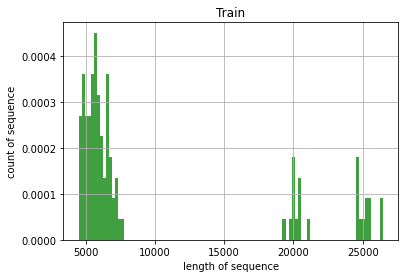

In [4]:
print(df_train.columns)
df_train['seq_length'] = df_train['X_seqs'].apply(lambda x: len(x)/5)
plt.hist(df_train['seq_length'],100, facecolor="g" ,density=True, alpha=0.75)
plt.xlabel('length of sequence')
plt.ylabel('count of sequence')
plt.grid(True)
plt.title('Train')

In [5]:
df_count_train = df_train.y_targets.value_counts()
df_count_val = df_val.y_targets.value_counts()
print('train:\n',df_count_train/sum(df_count_train))
print('\nval:\n',df_count_val/sum(df_count_val))



train:
 TWS    0.435644
TAS    0.336634
MTT    0.118812
STT    0.108911
Name: y_targets, dtype: float64

val:
 TWS    0.425743
TAS    0.336634
MTT    0.178218
STT    0.059406
Name: y_targets, dtype: float64


##### 3. 绘制波形图

target: MTT


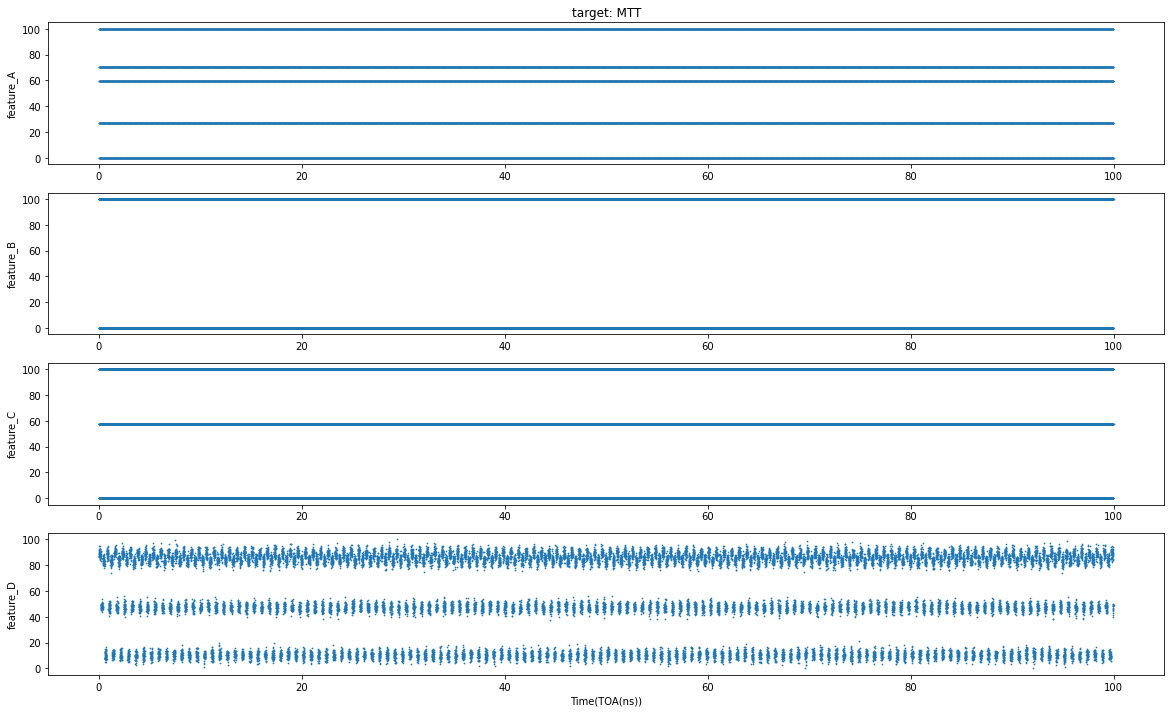

In [17]:
# i = 5
def plot_wave(df, i, is_save=False):
    # df = df_train
    X, y = df['X_seqs'][i], df['y_targets'][i]
    X = np.array(X).reshape(-1, 5)
    scaler = MinMaxScaler(feature_range=(0, 100))
    X = scaler.fit_transform(X)
    # print(X)
    y_title = ['A','B','C','D']
    fig, axs = plt.subplots(4,1)
    fig.set_size_inches(20, 12)

    # X = X[:100, :]
    # diffX = np.diff(X, axis=0)
    # print(diffX[:,0].mean(), diffX[:,0].max(), diffX[:,0].min())
    print(f'target: {y}')
    for k in range(1, X.shape[1]):
        axs[k-1].scatter(X[:,0], X[:,k], s=0.5)
        if k == 4:
            axs[k-1].set_xlabel('Time(TOA(ns))')
        axs[k-1].set_ylabel(f'feature_{y_title[k-1]}')
        if k == 1:
            axs[k-1].set_title(f'target: {y}')
    if not is_save:
        plt.show()
    else:
        file_name = df.file_names[i]
        file_name=file_name.split('/')
        file_name_ = file_name[-1].replace('csv', 'png')
        file_name = f'./images/{file_name[2]}/{file_name_}'
        plt.savefig(file_name)

# plot_wave(df_train, 5, is_save=True)

target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: MTT
target: STT
target: STT


/Users/lyong/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


target: STT
target: STT
target: STT
target: STT
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TAS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS
target: TWS


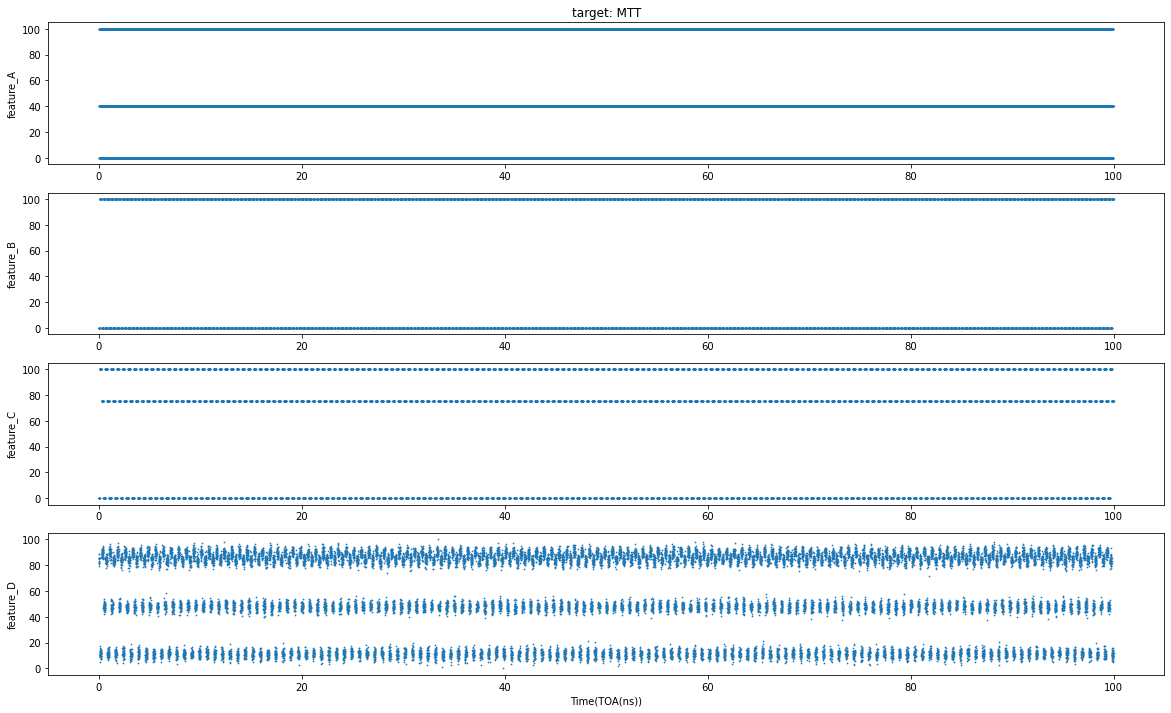

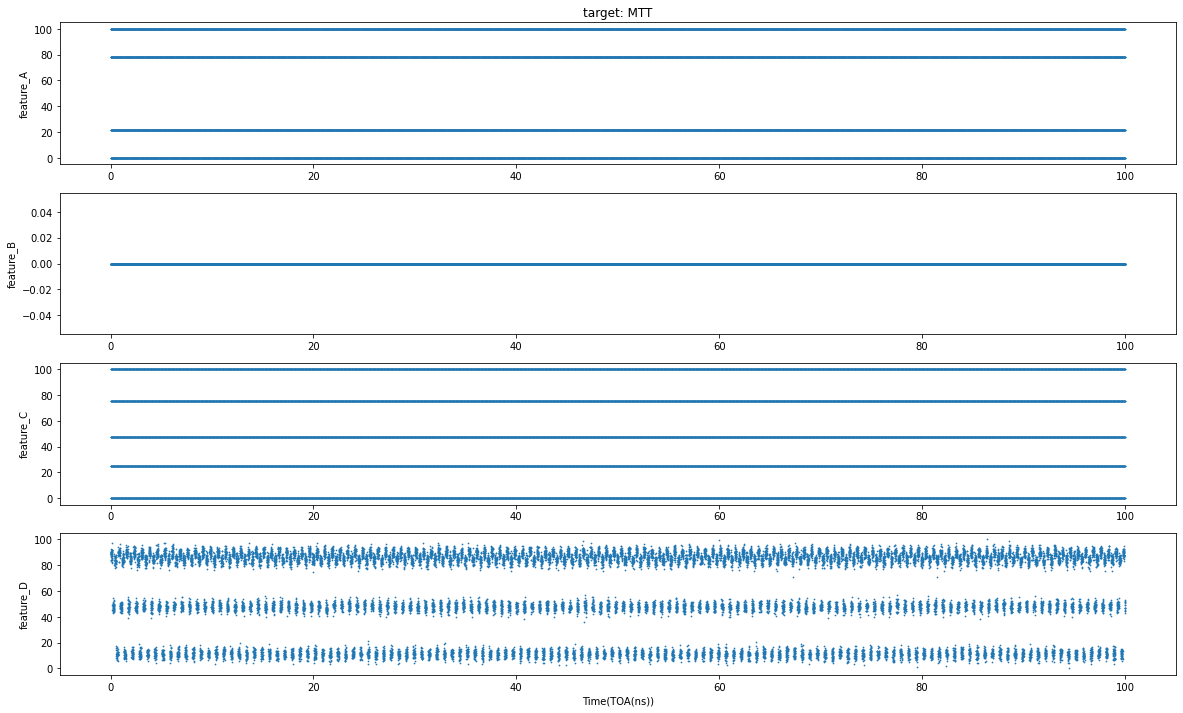

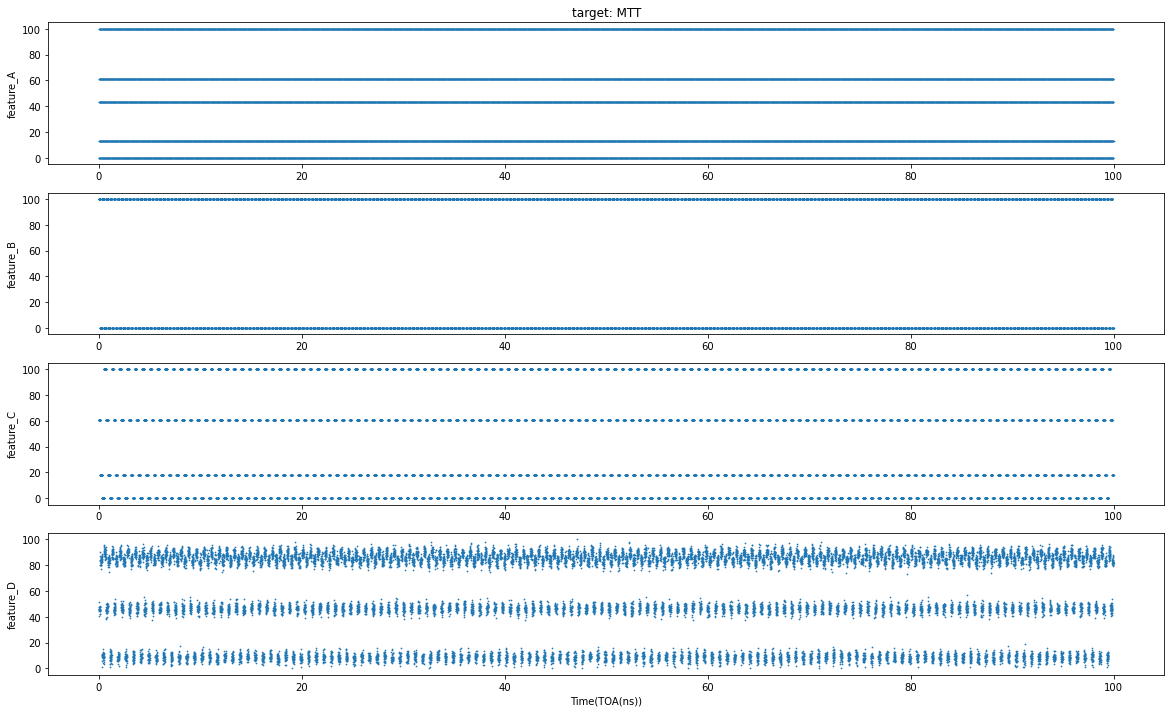

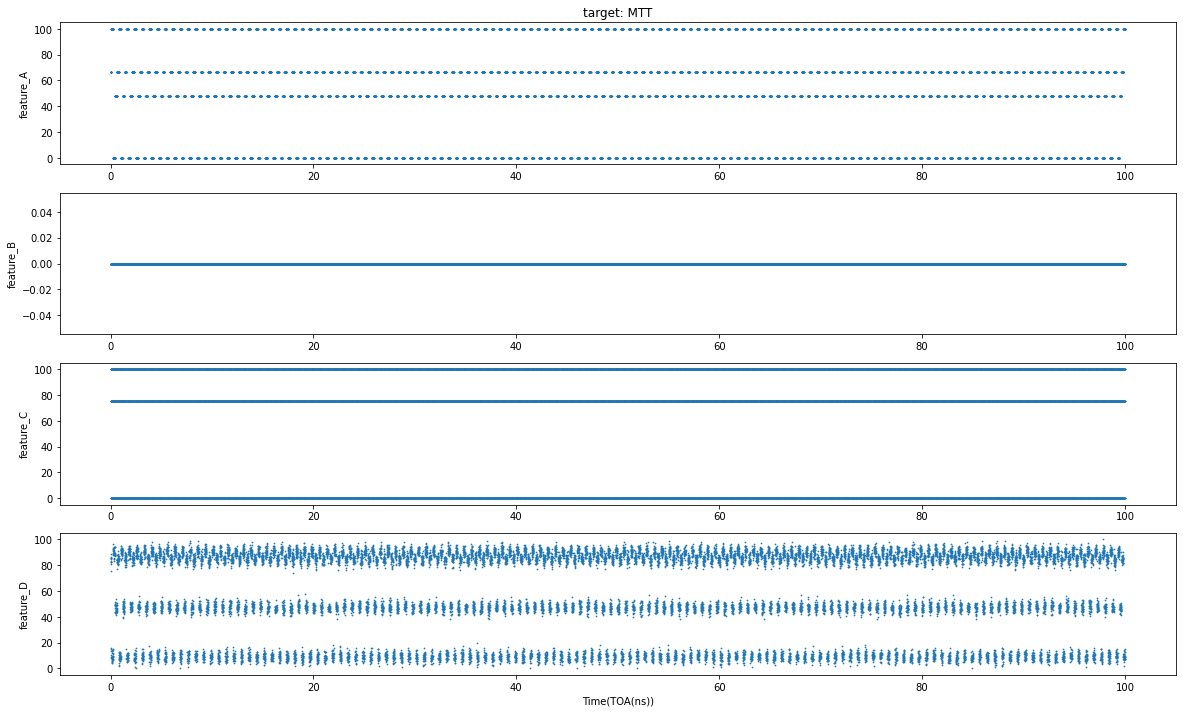

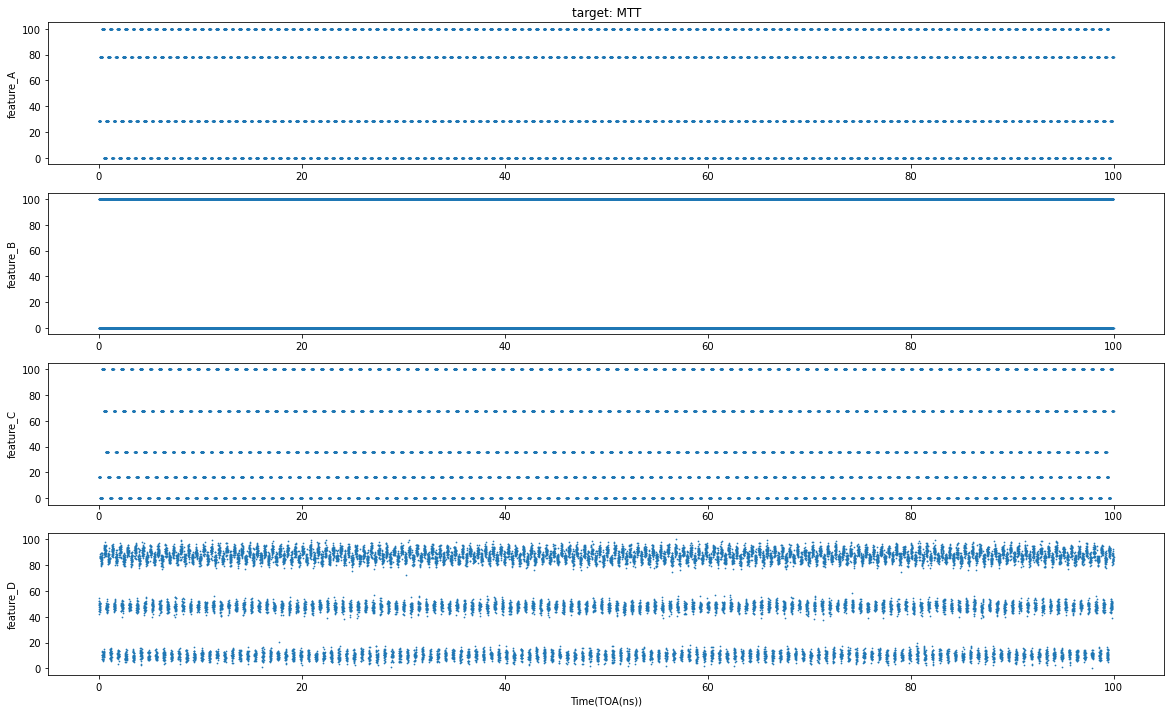

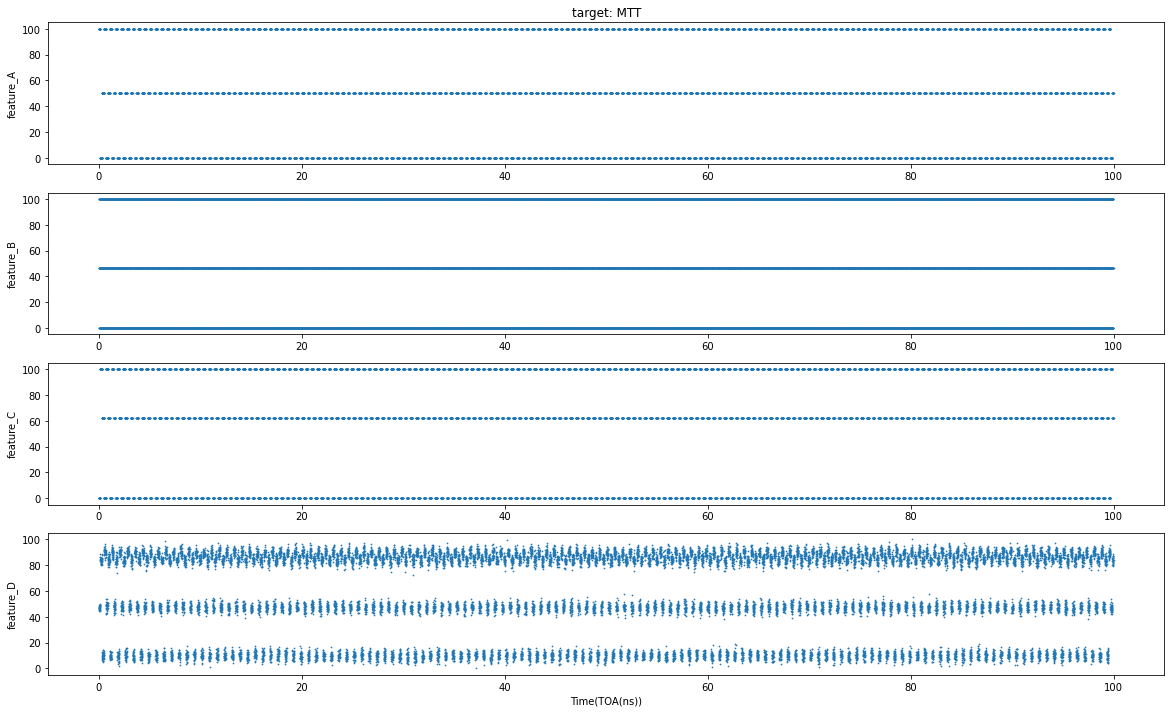

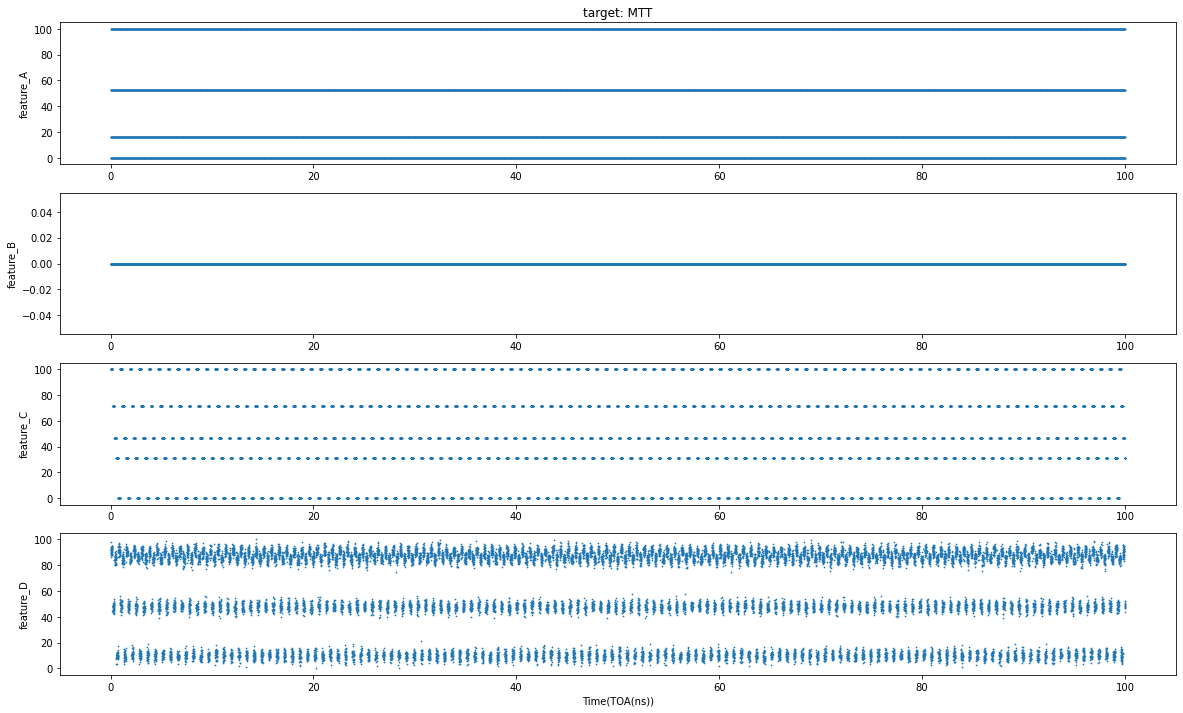

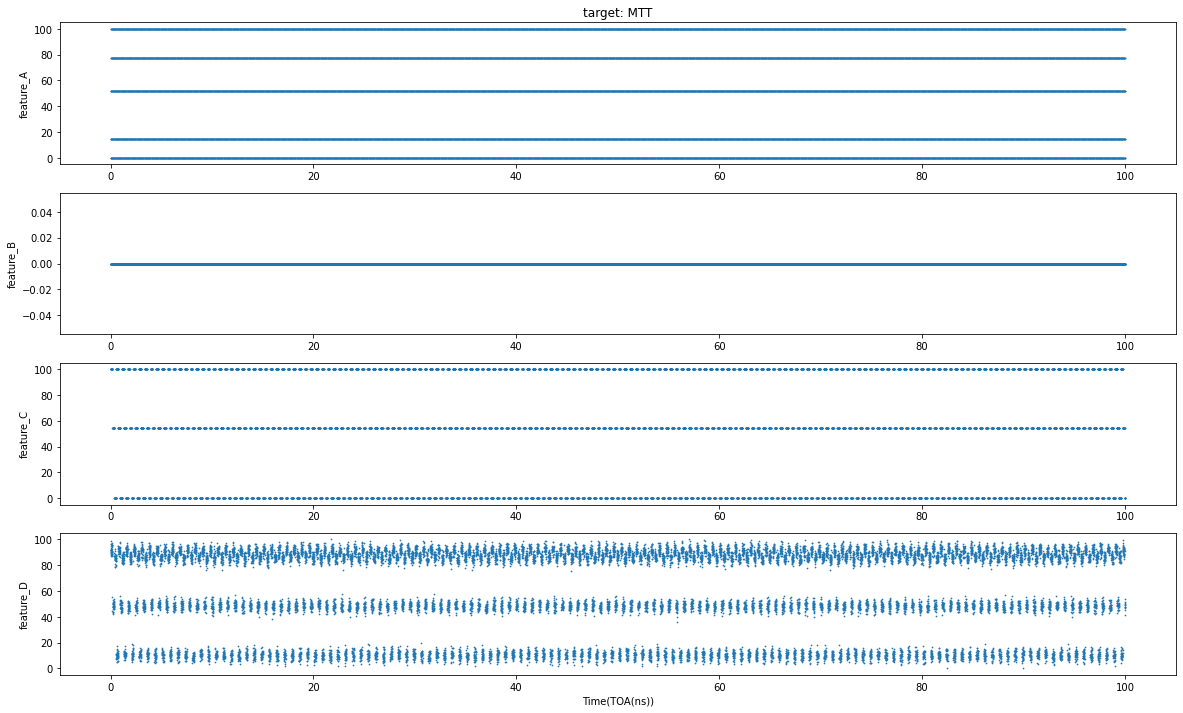

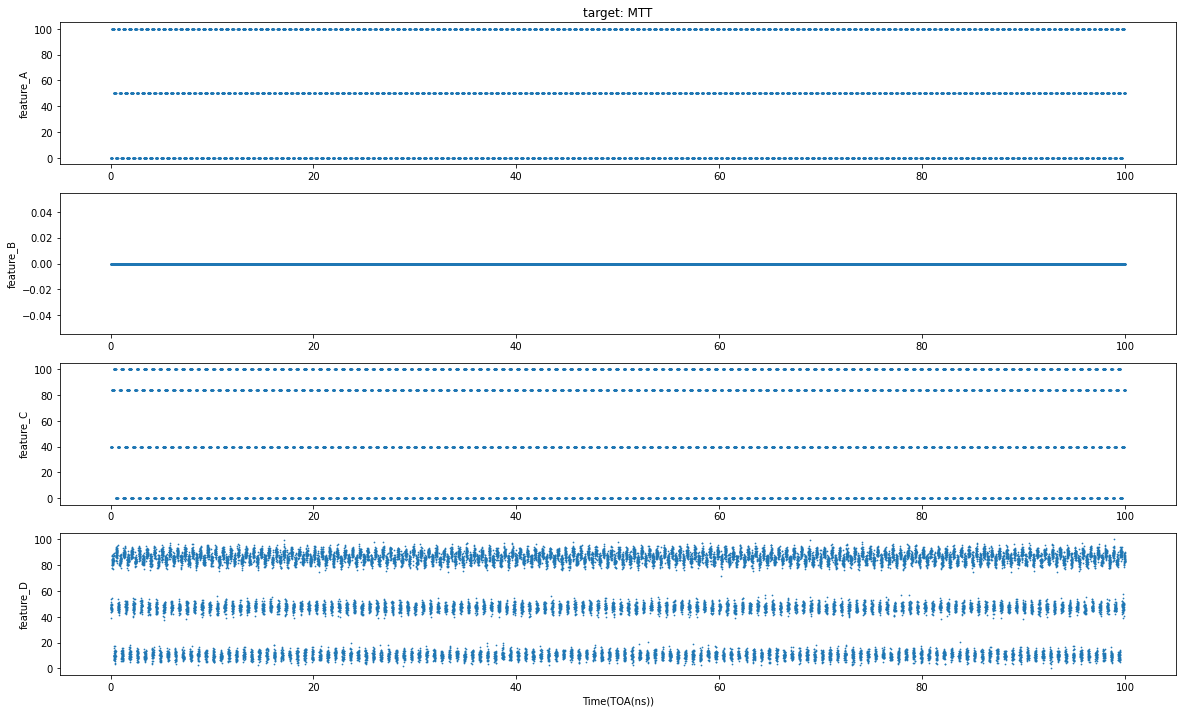

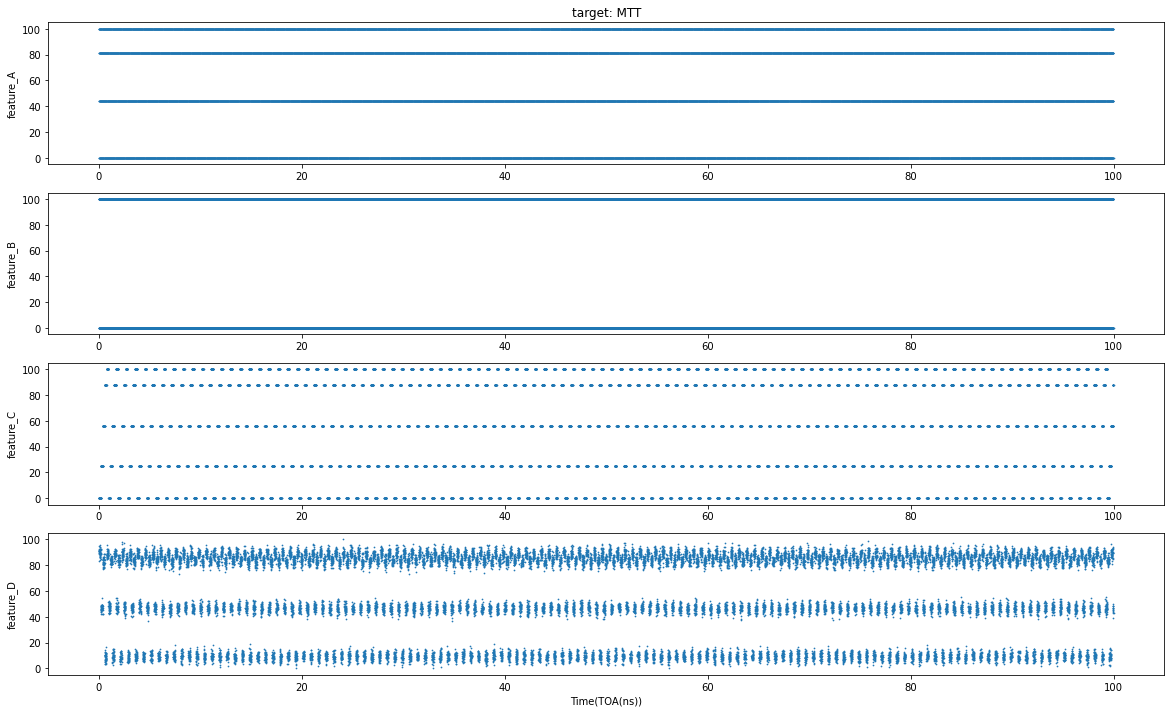

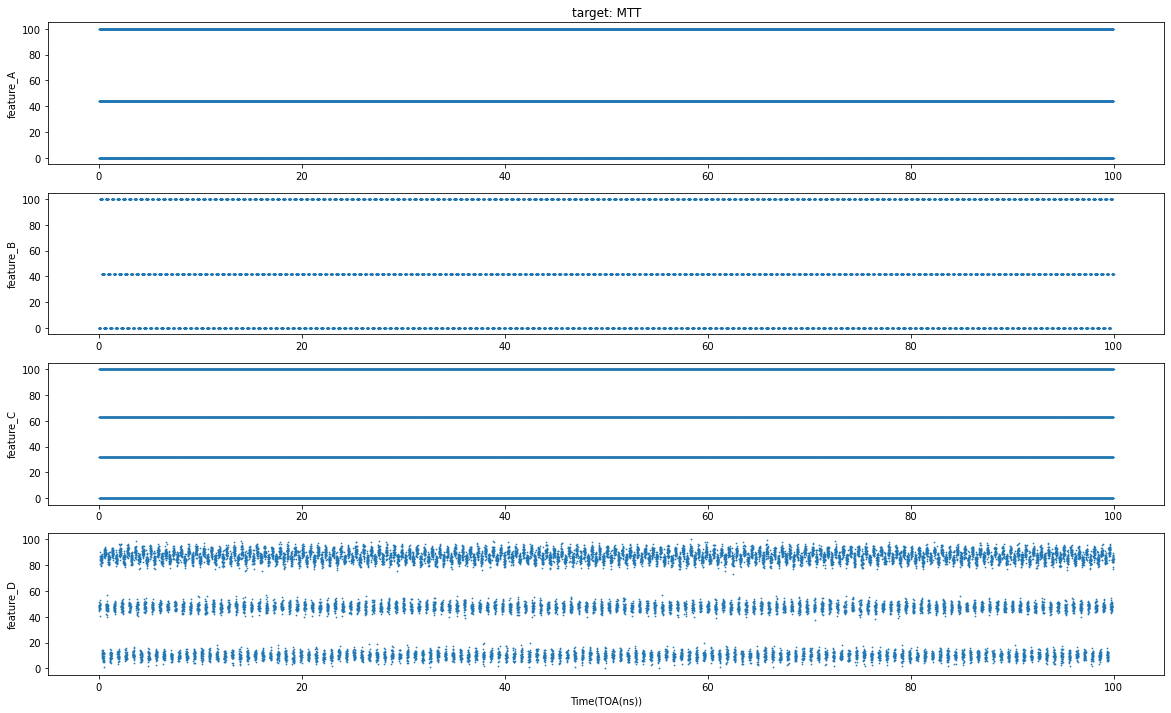

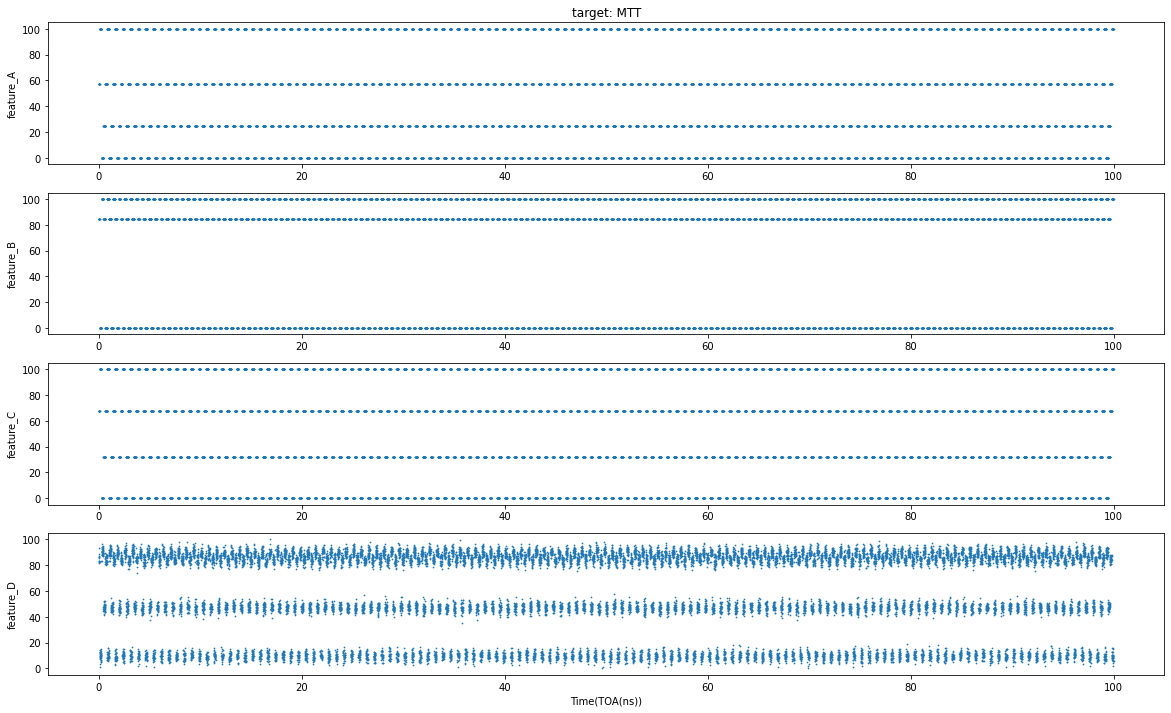

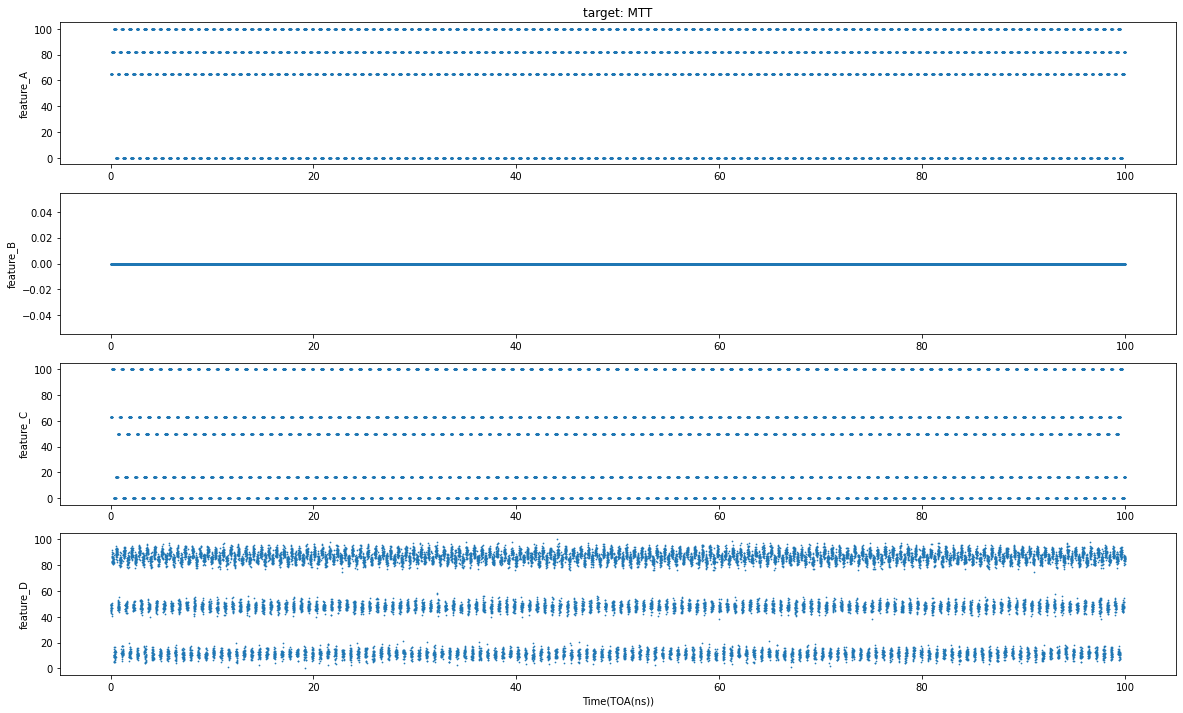

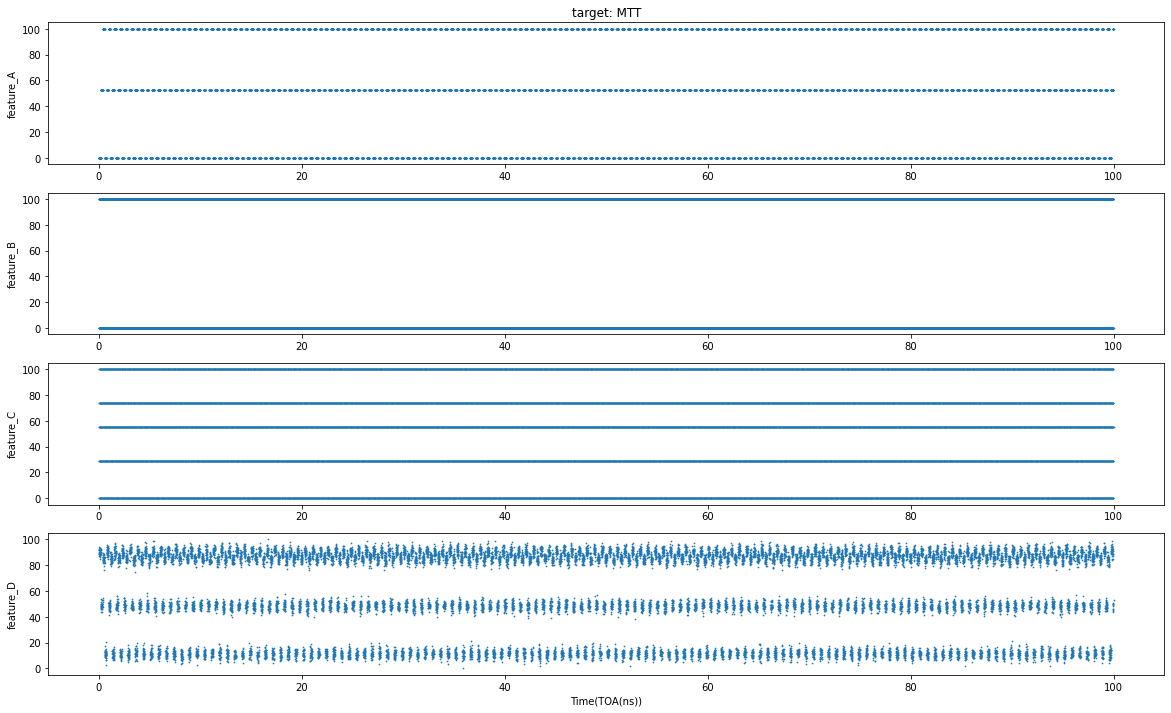

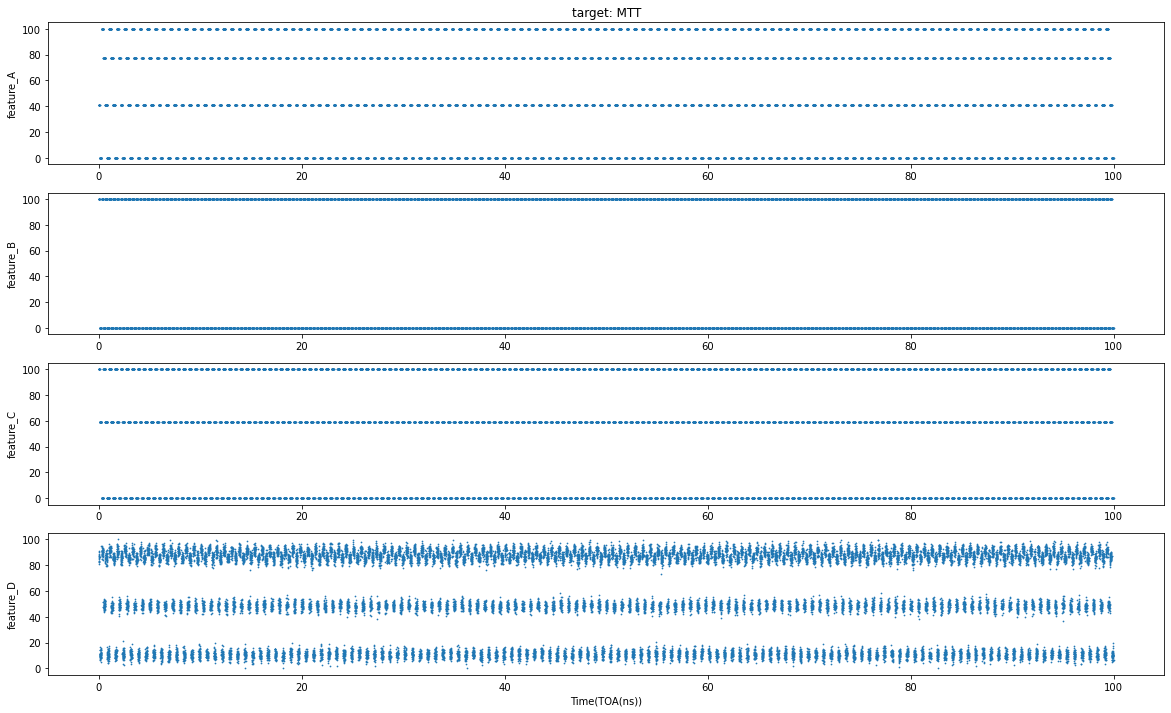

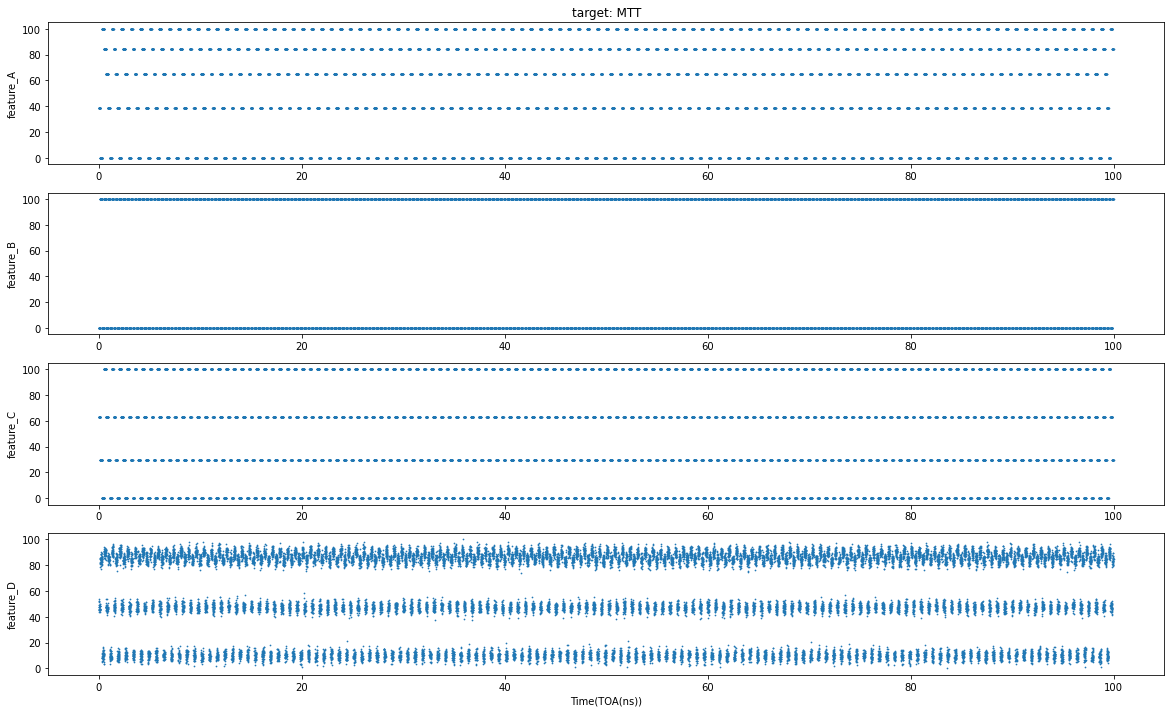

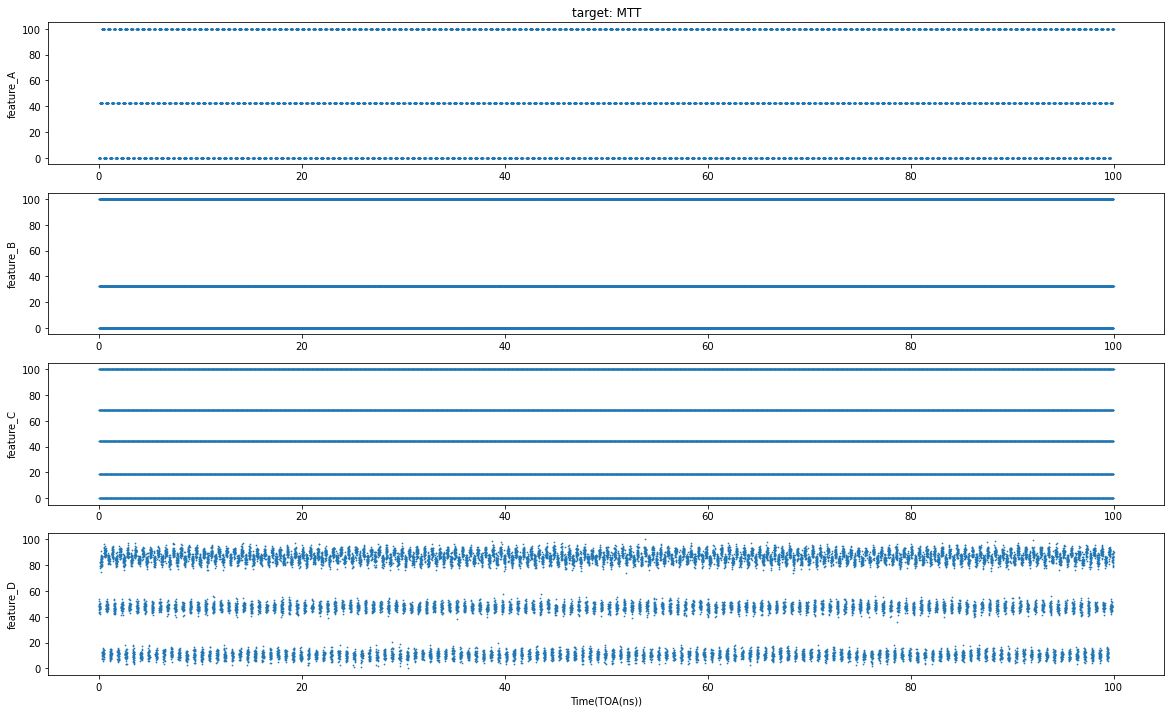

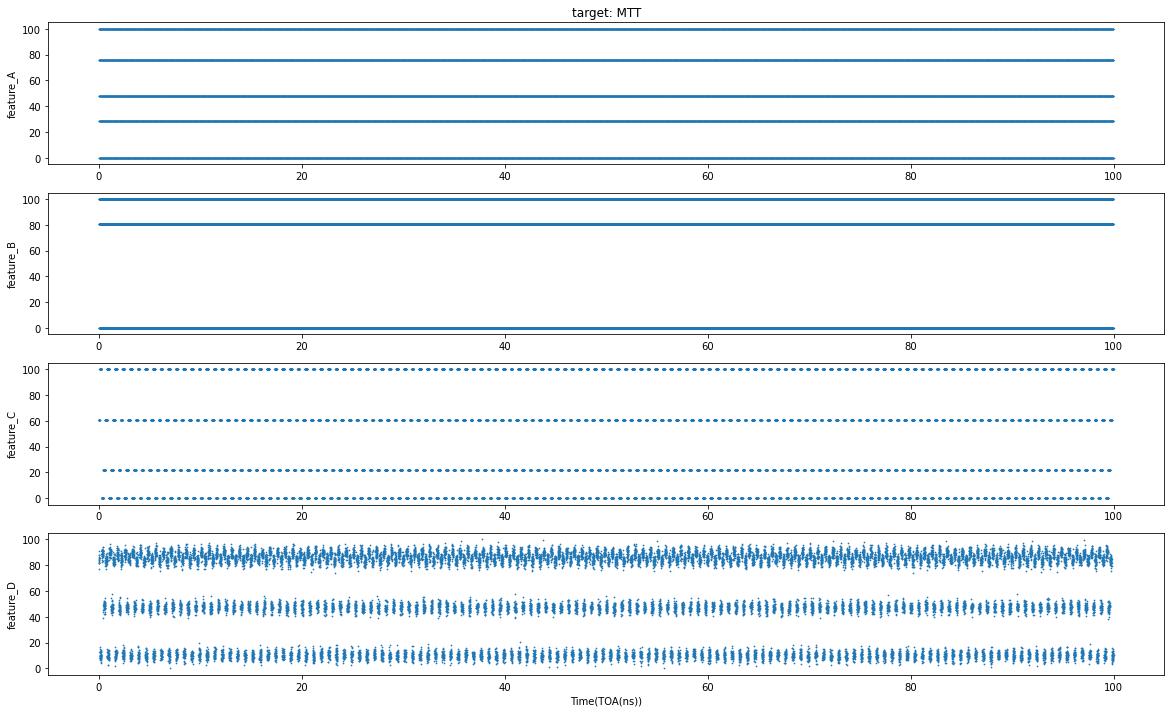

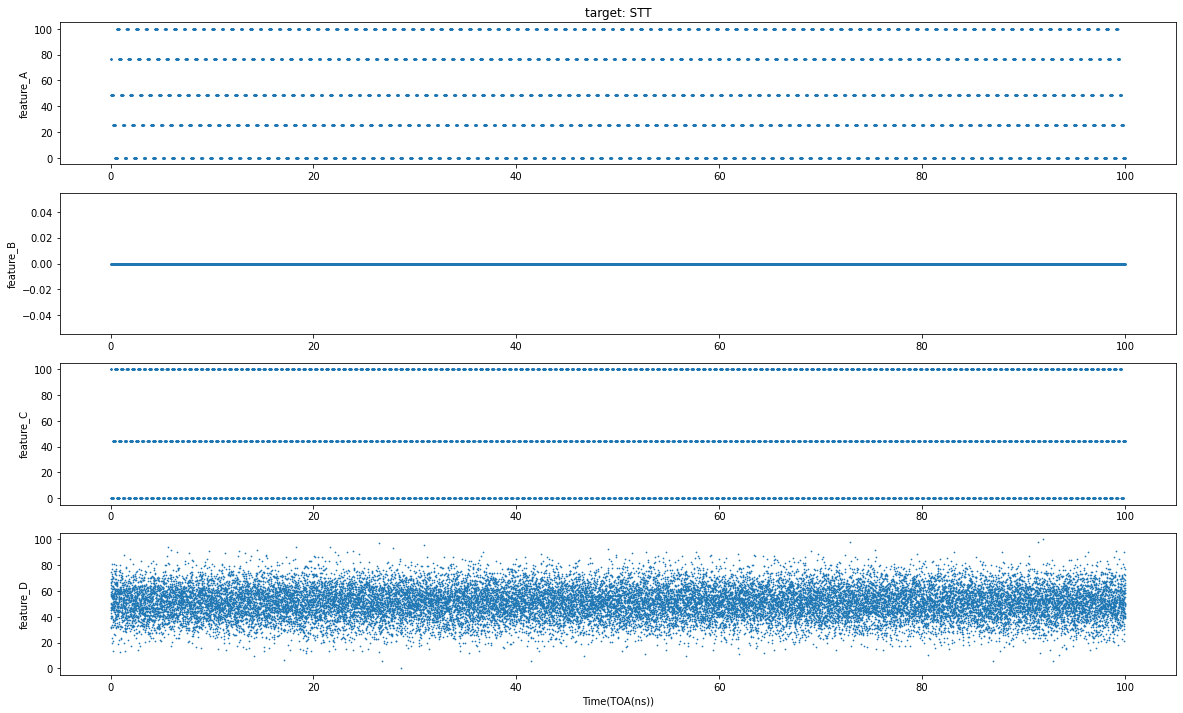

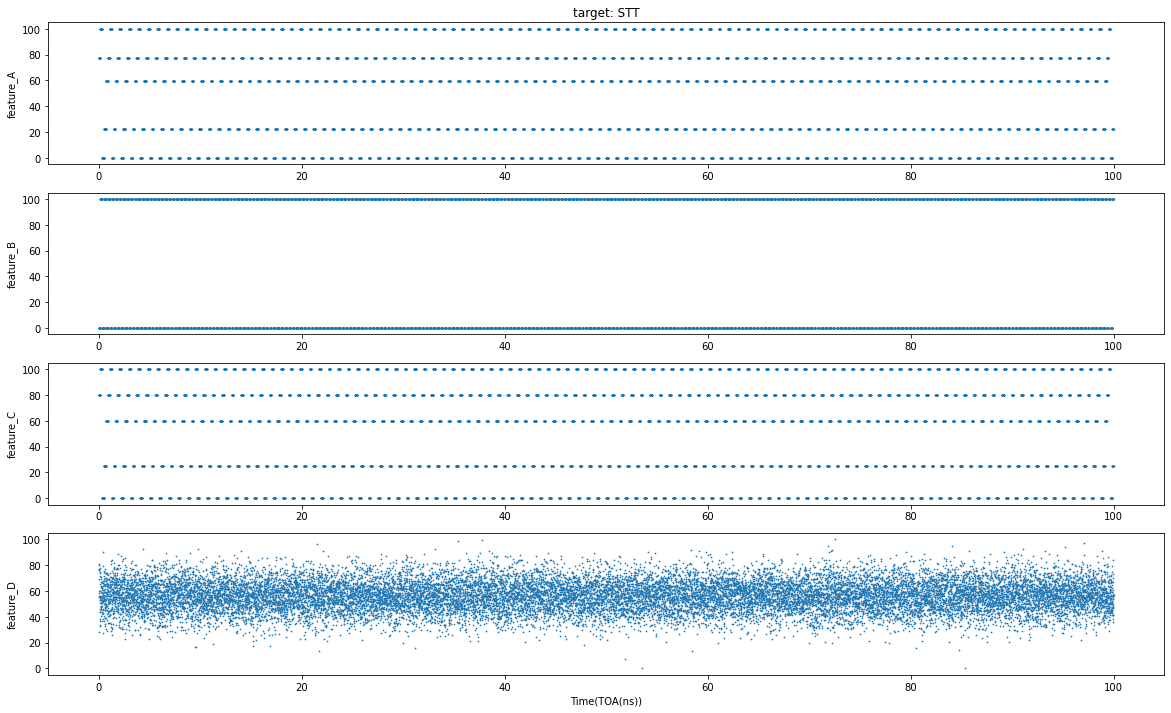

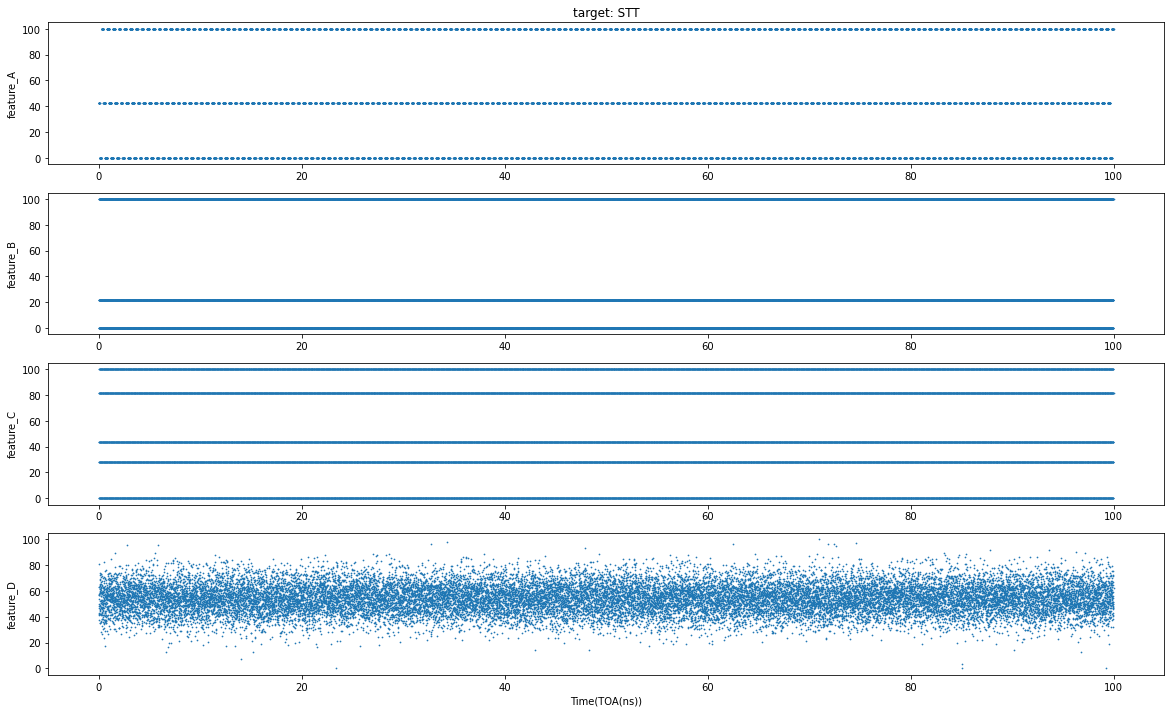

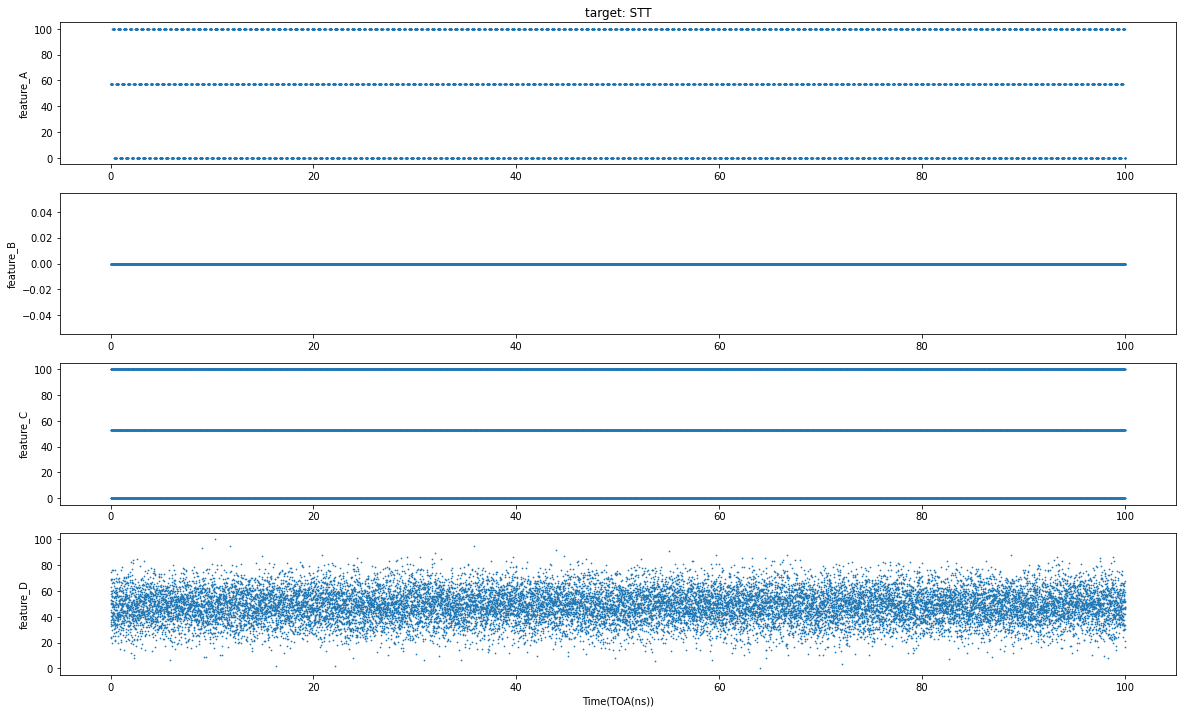

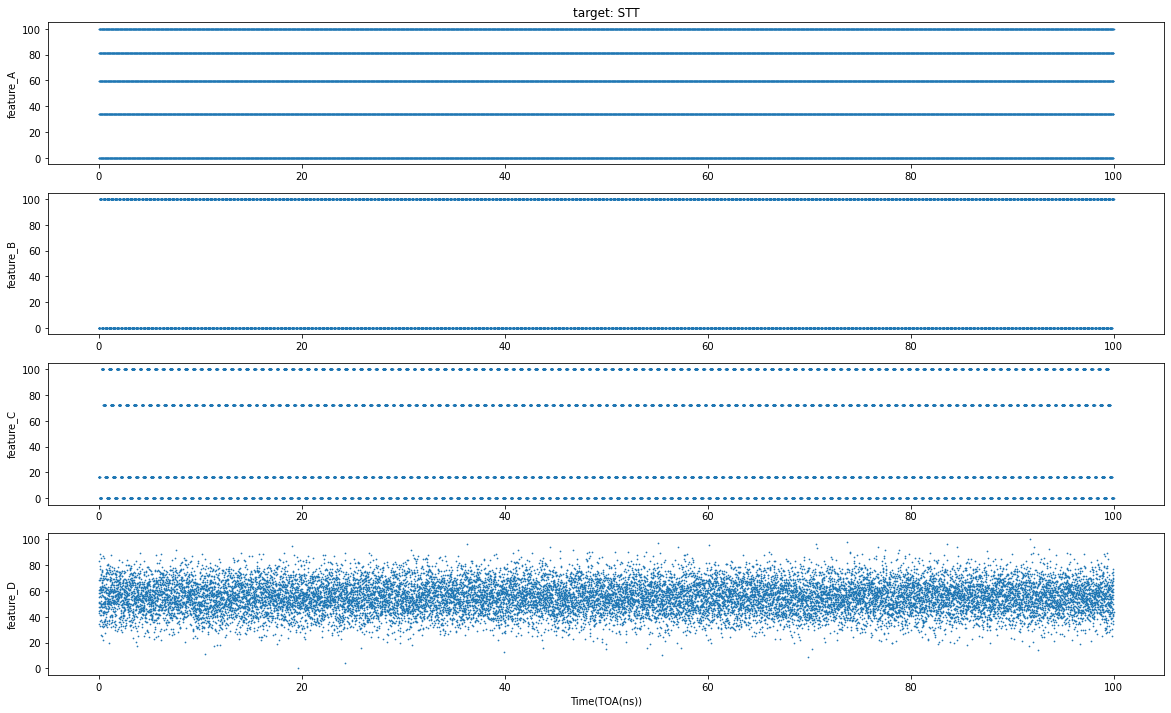

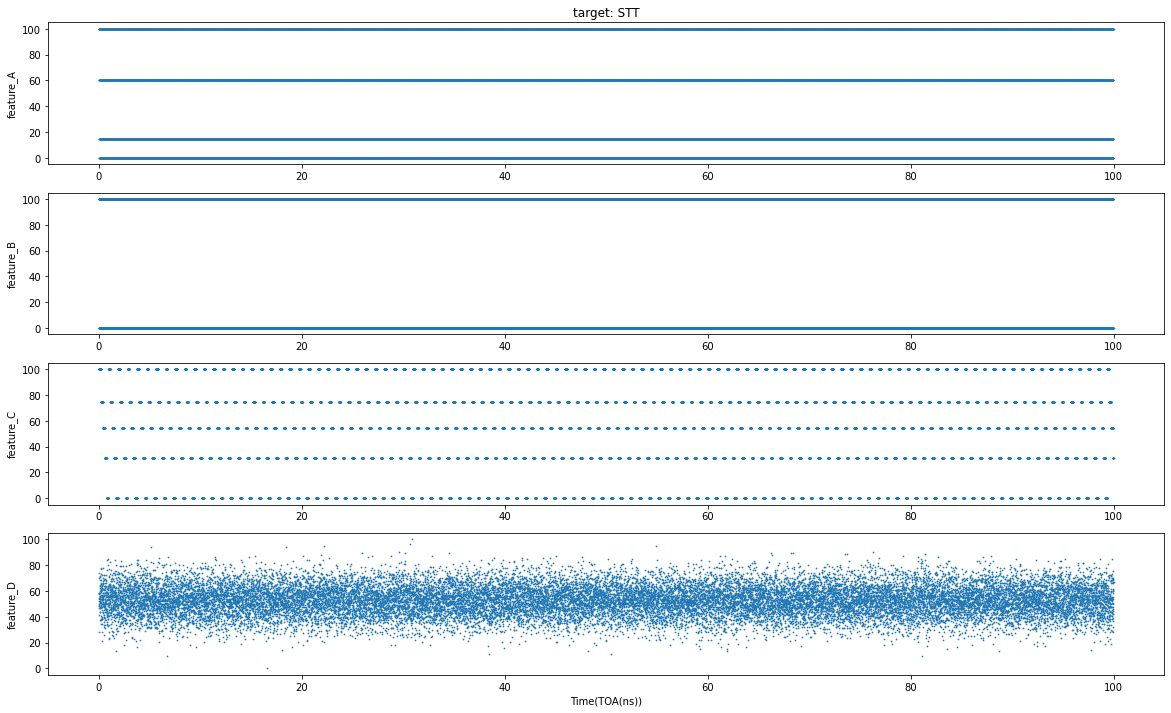

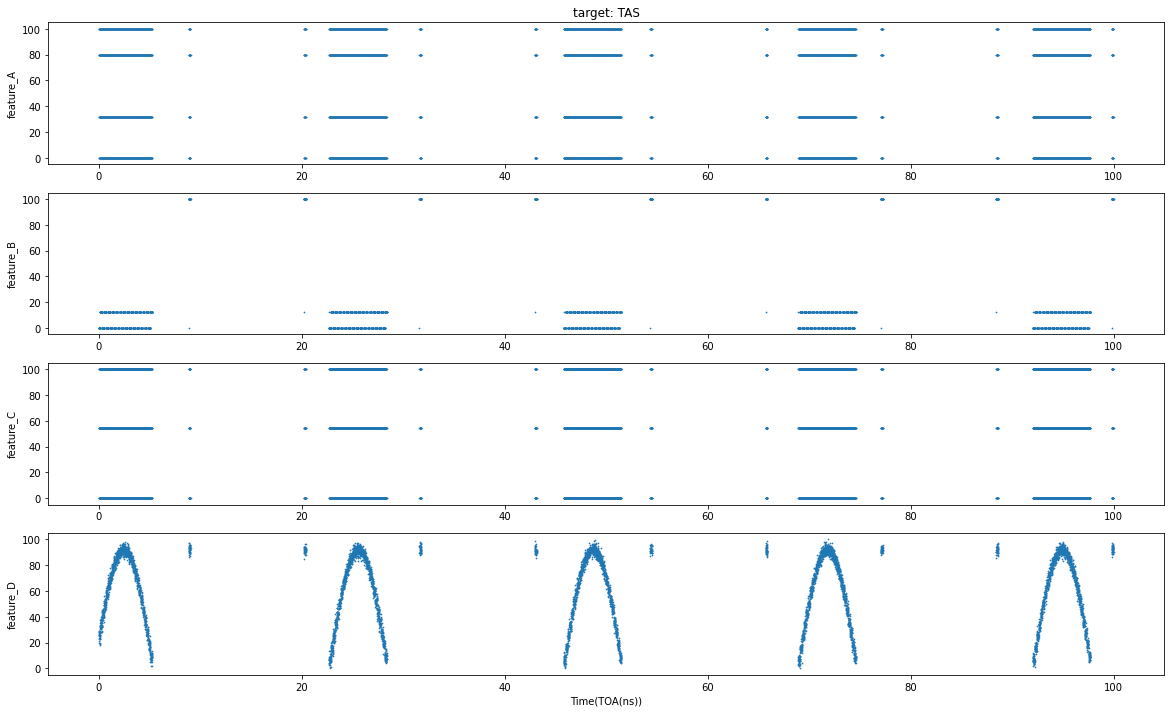

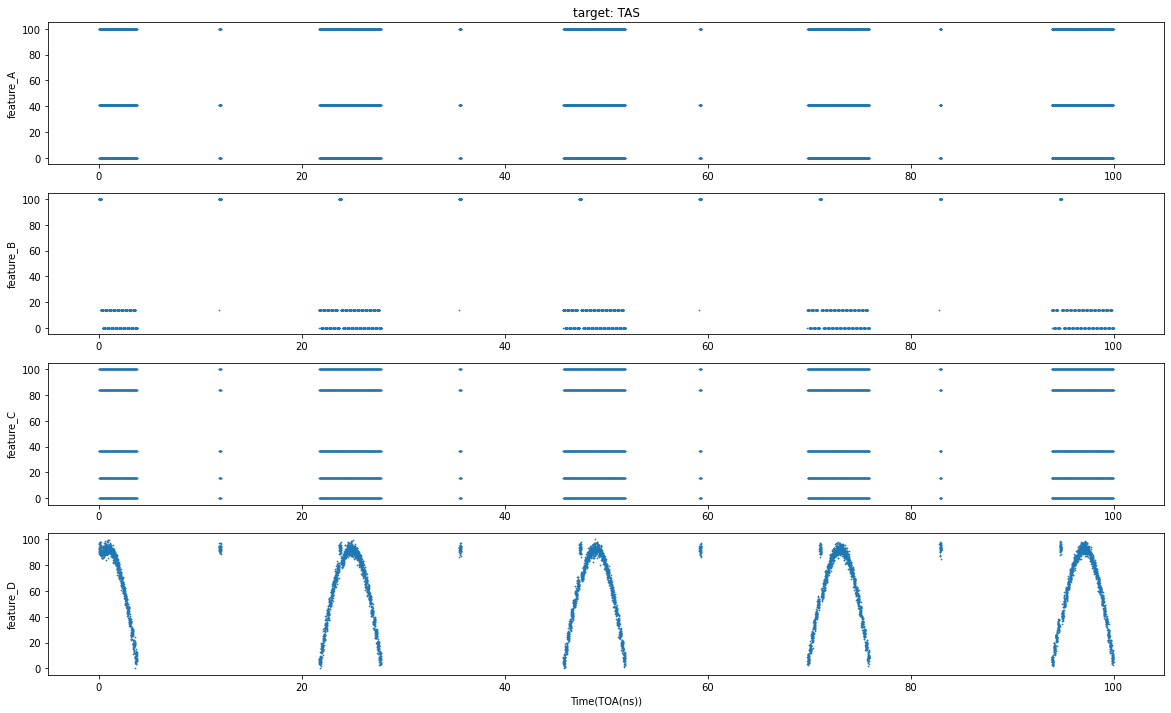

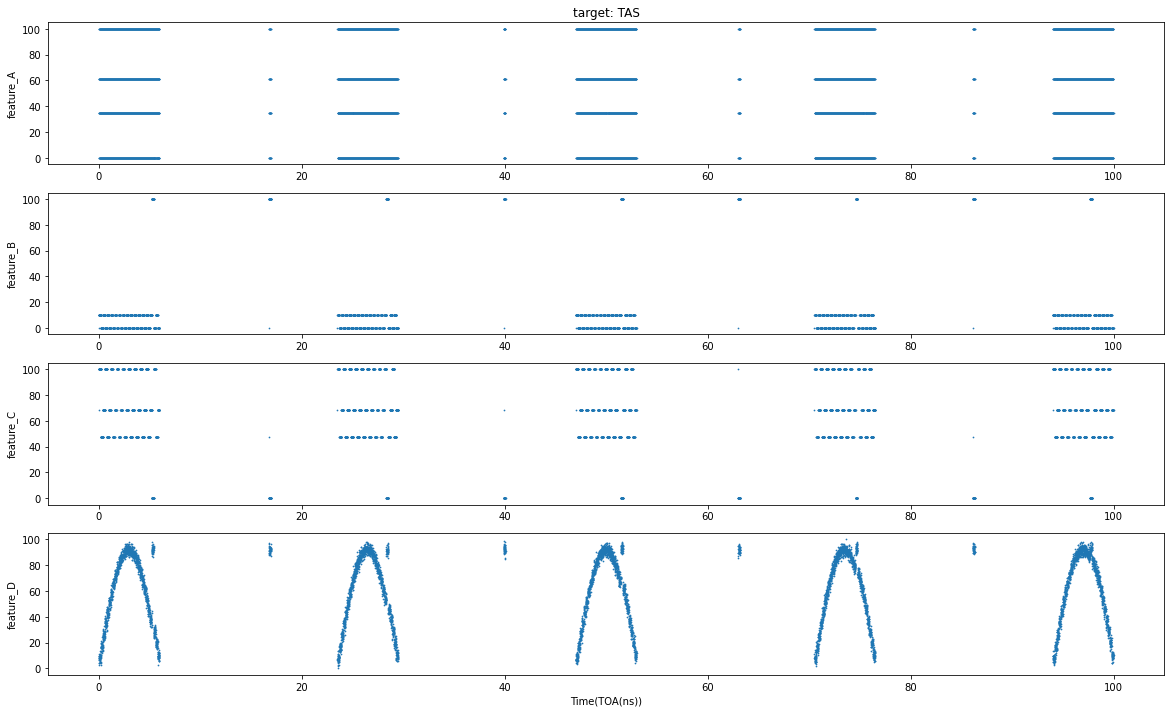

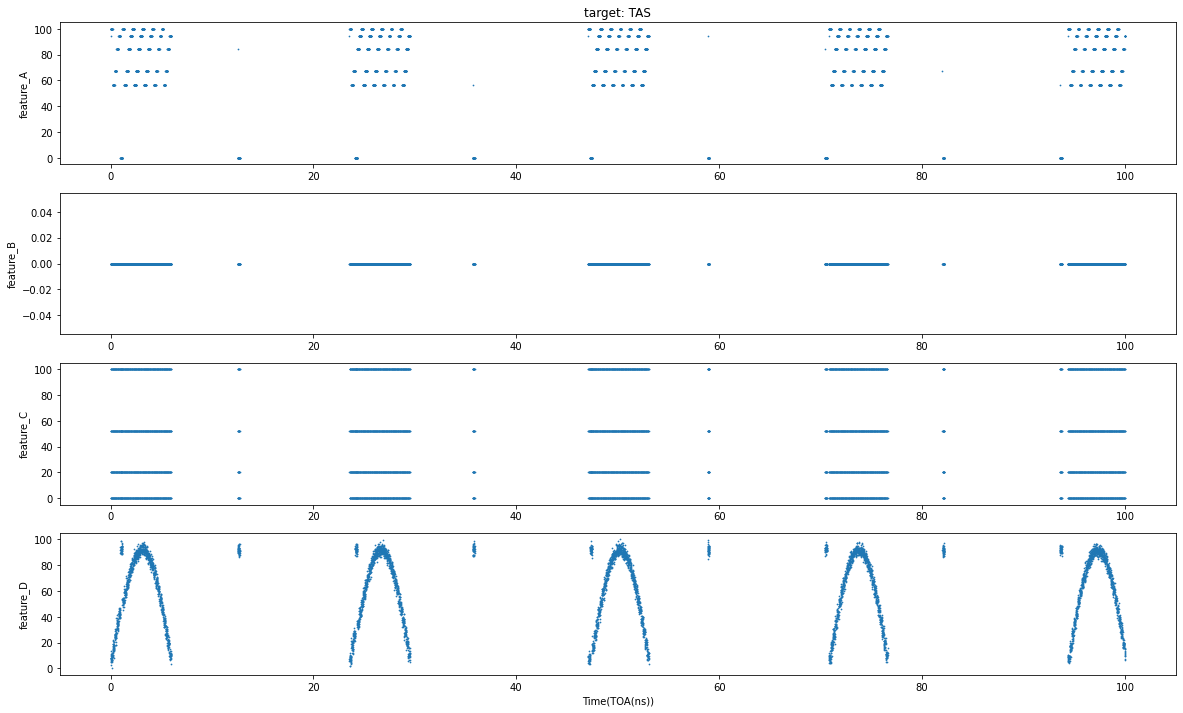

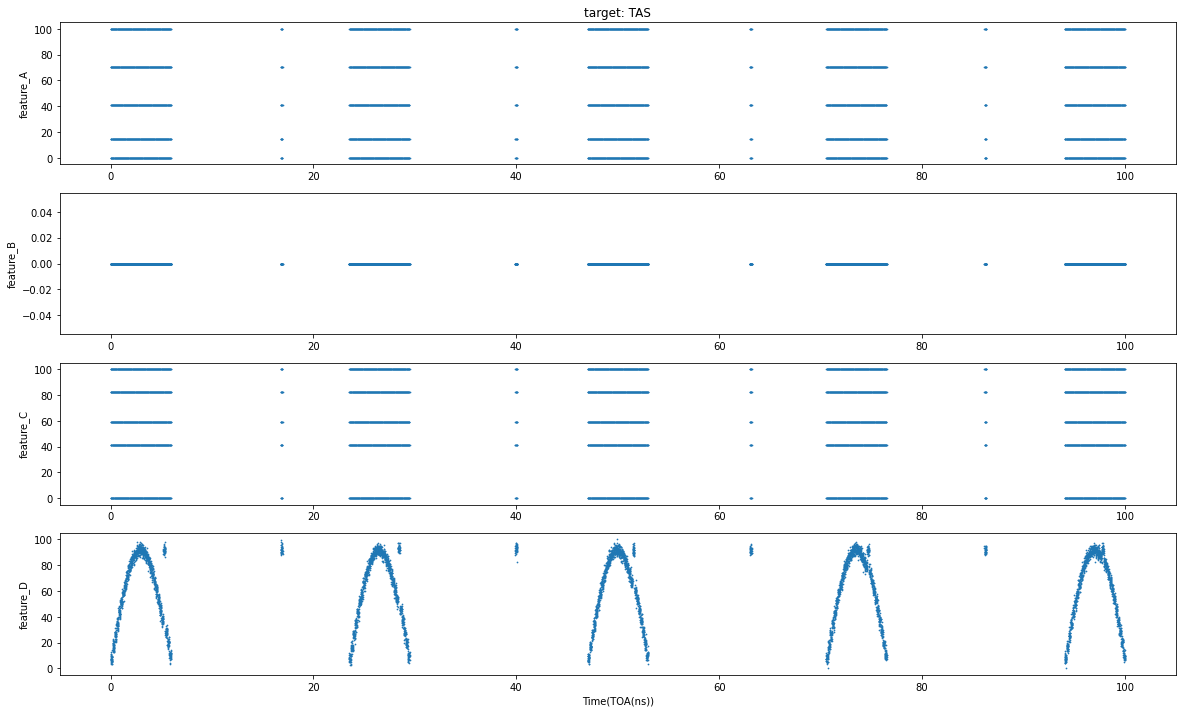

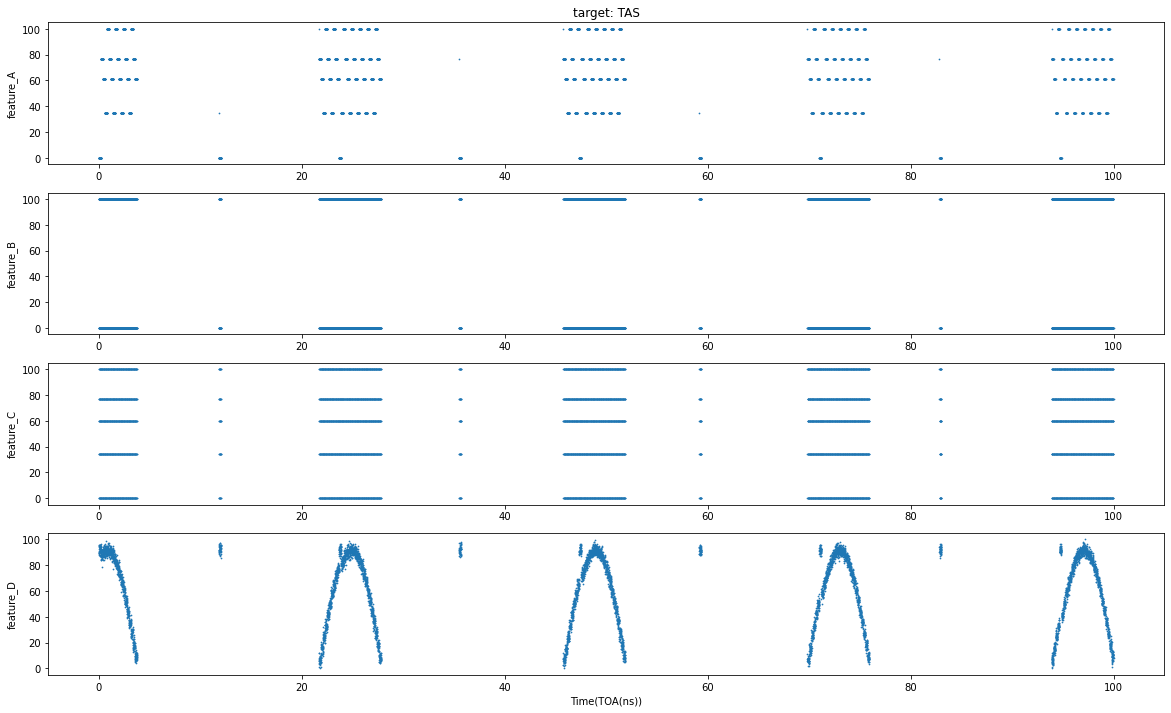

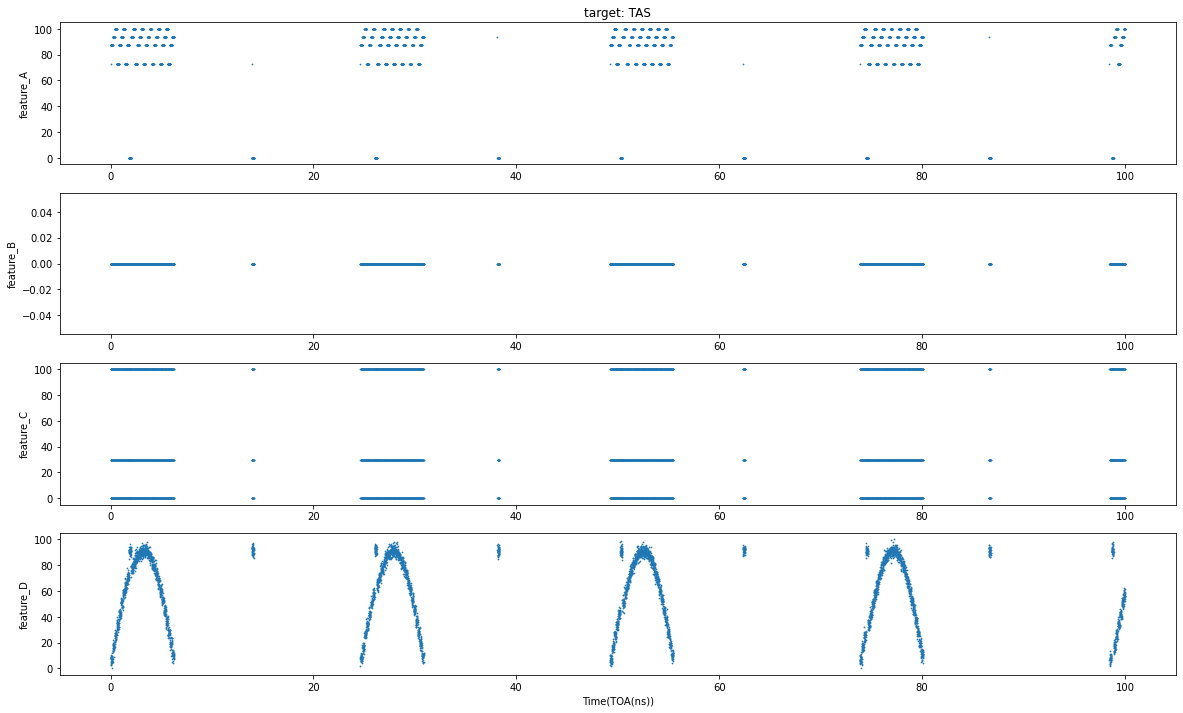

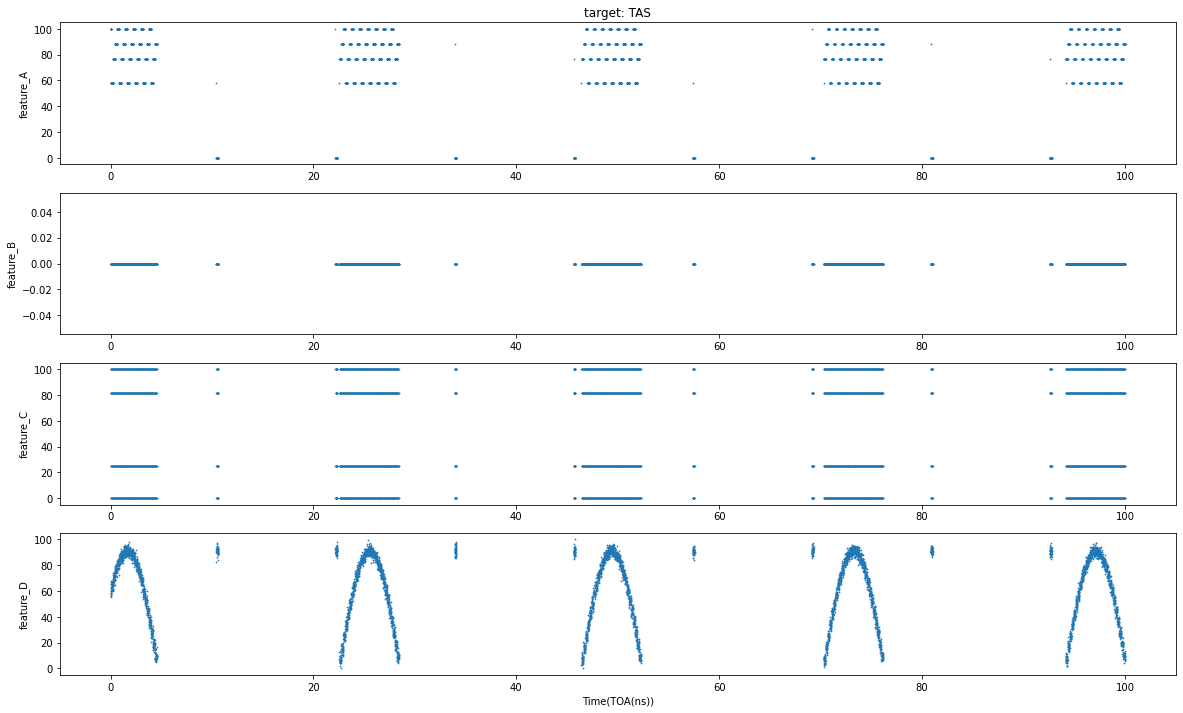

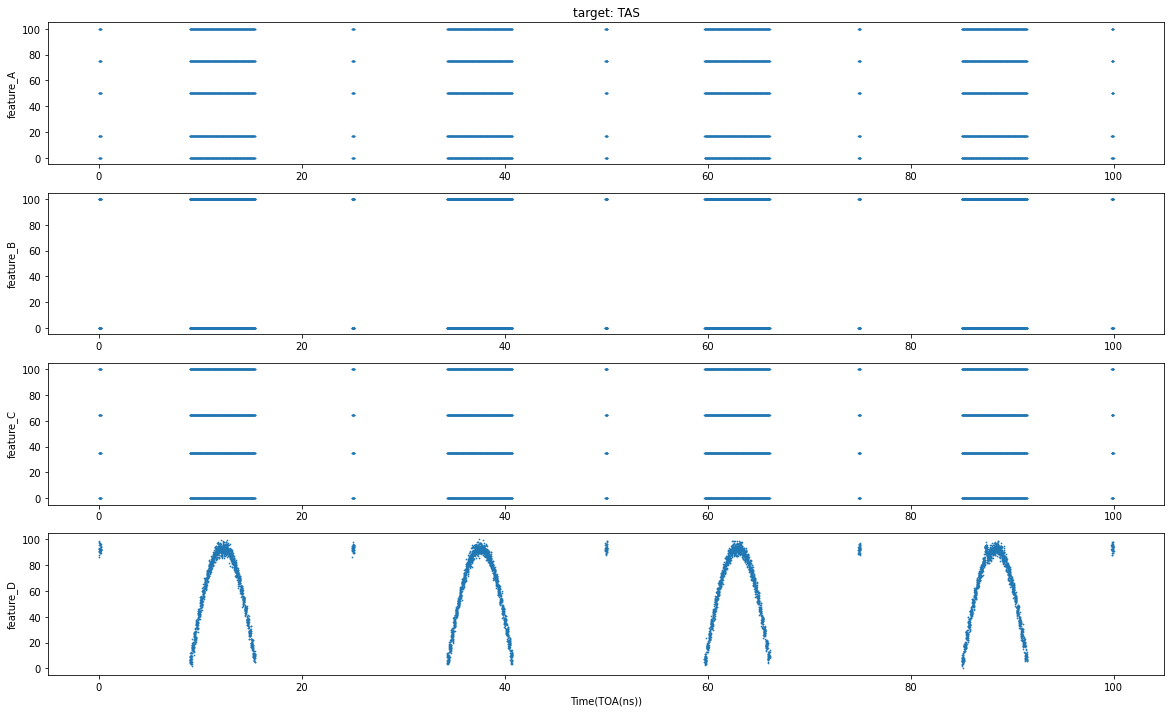

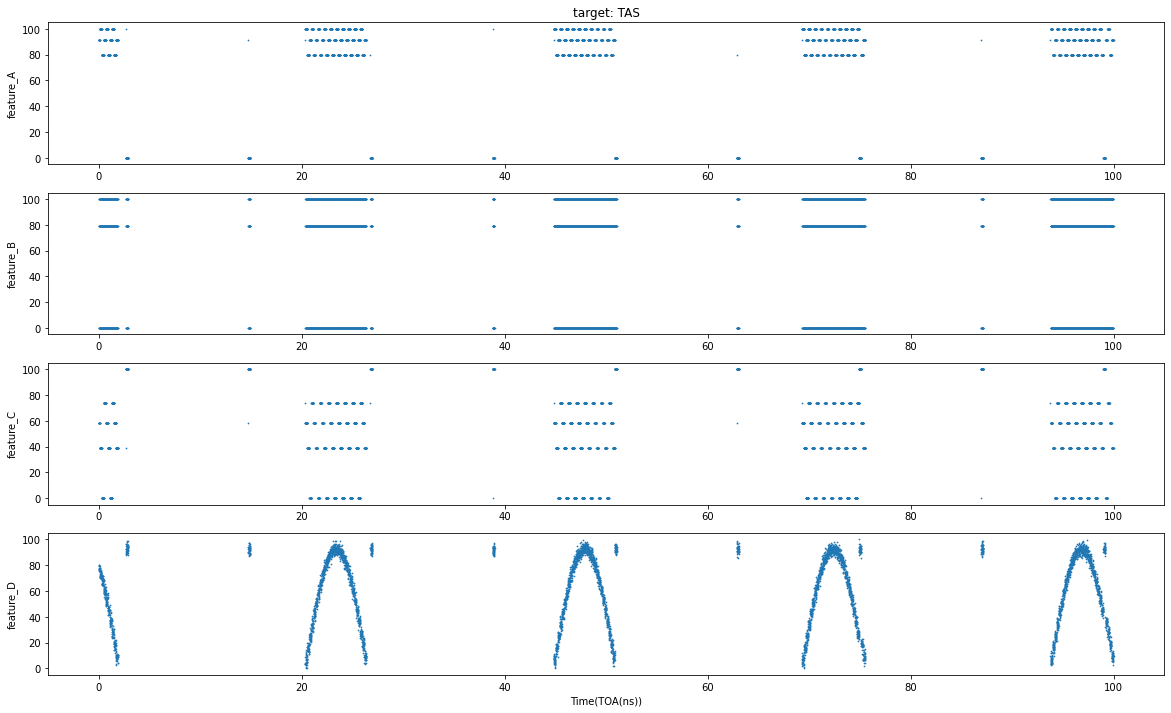

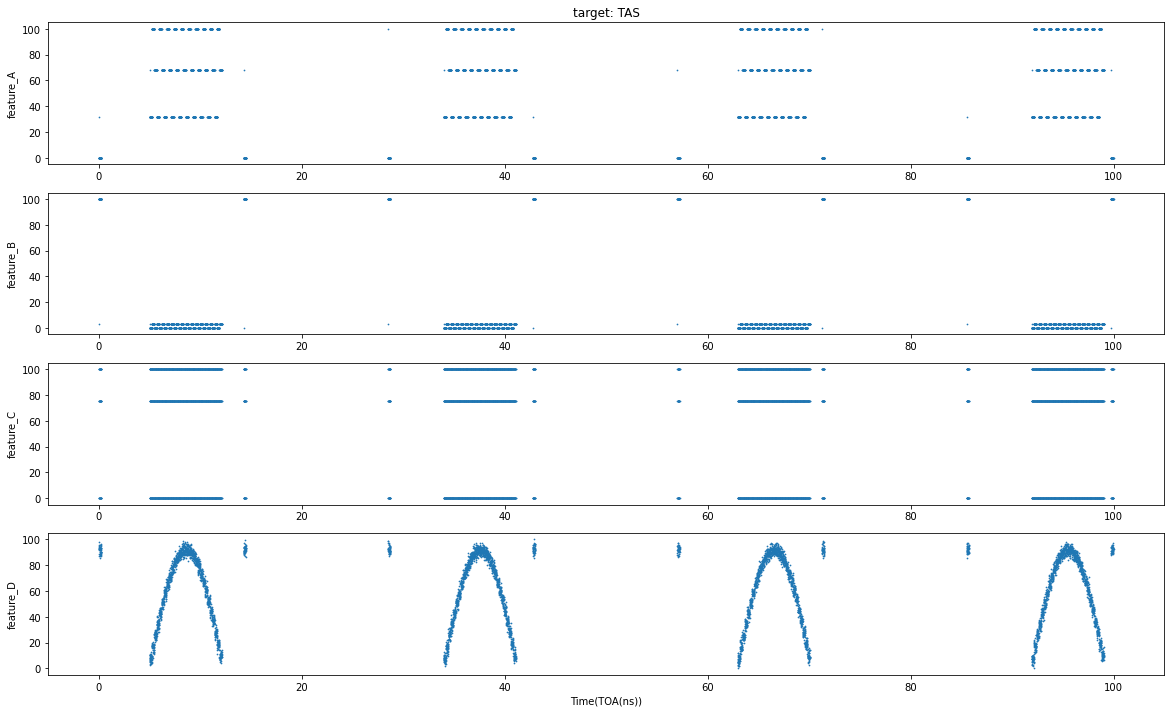

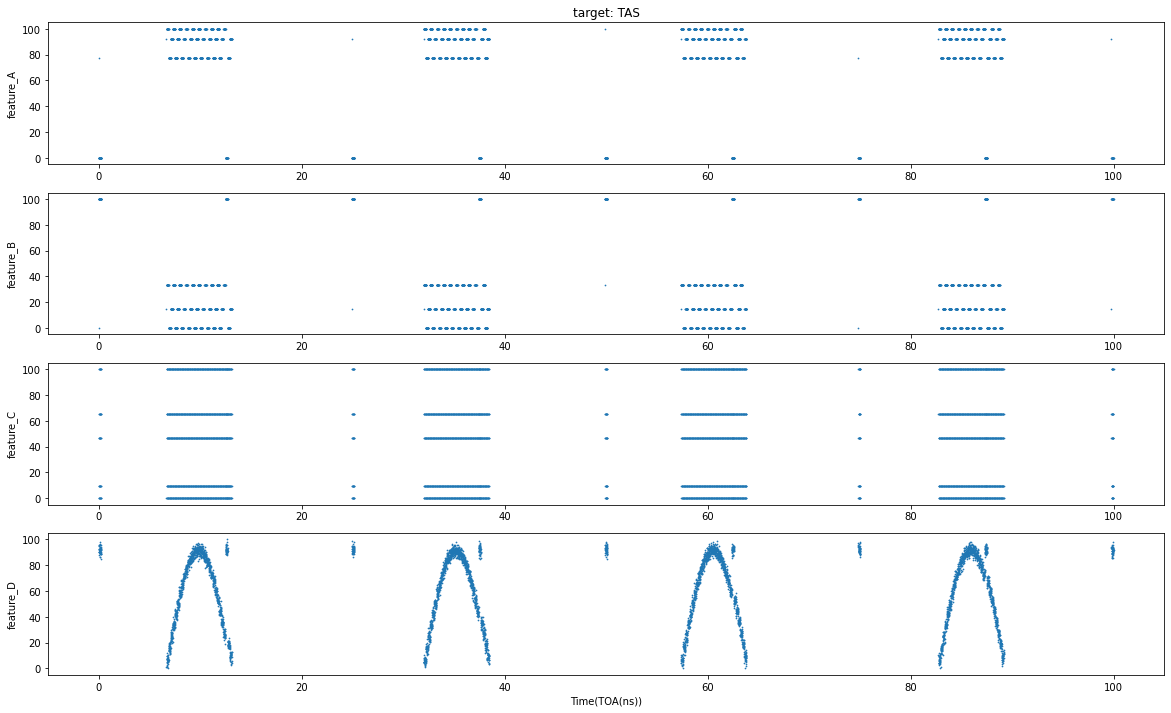

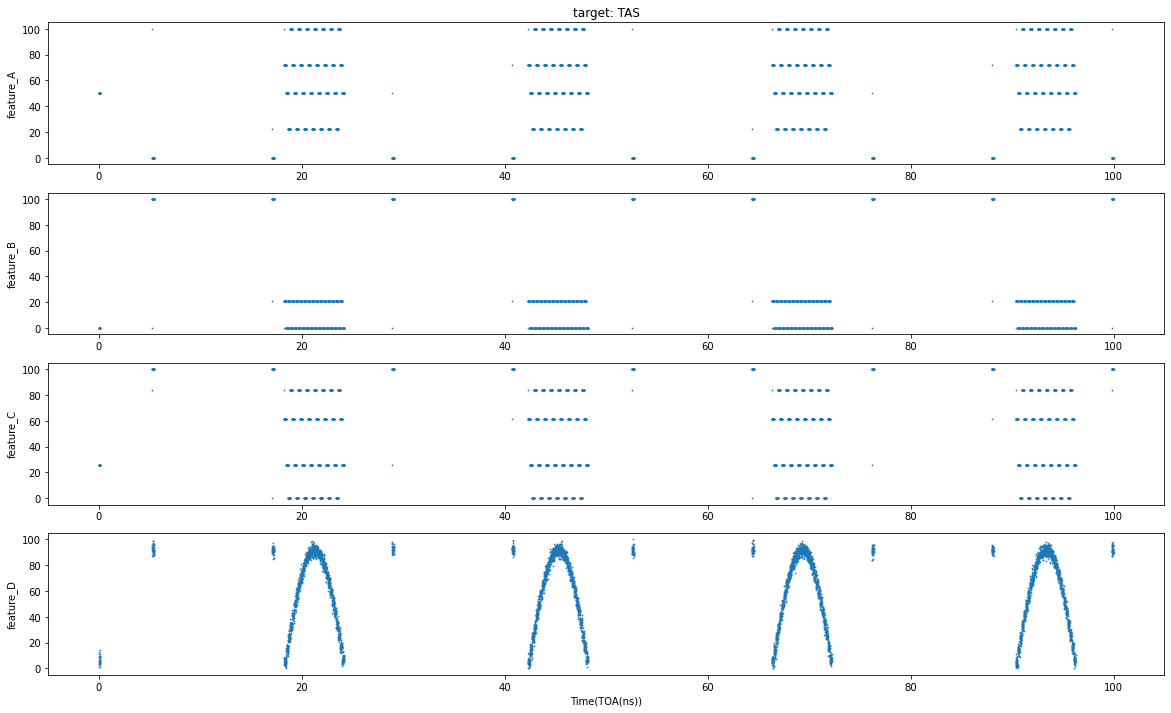

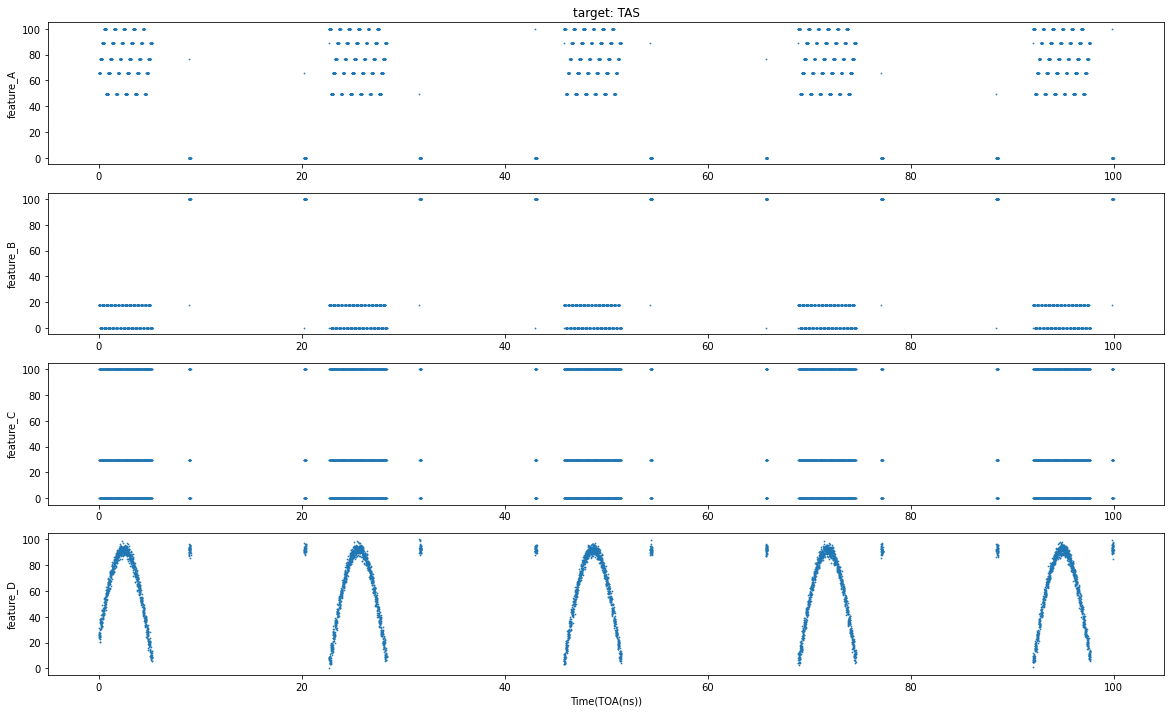

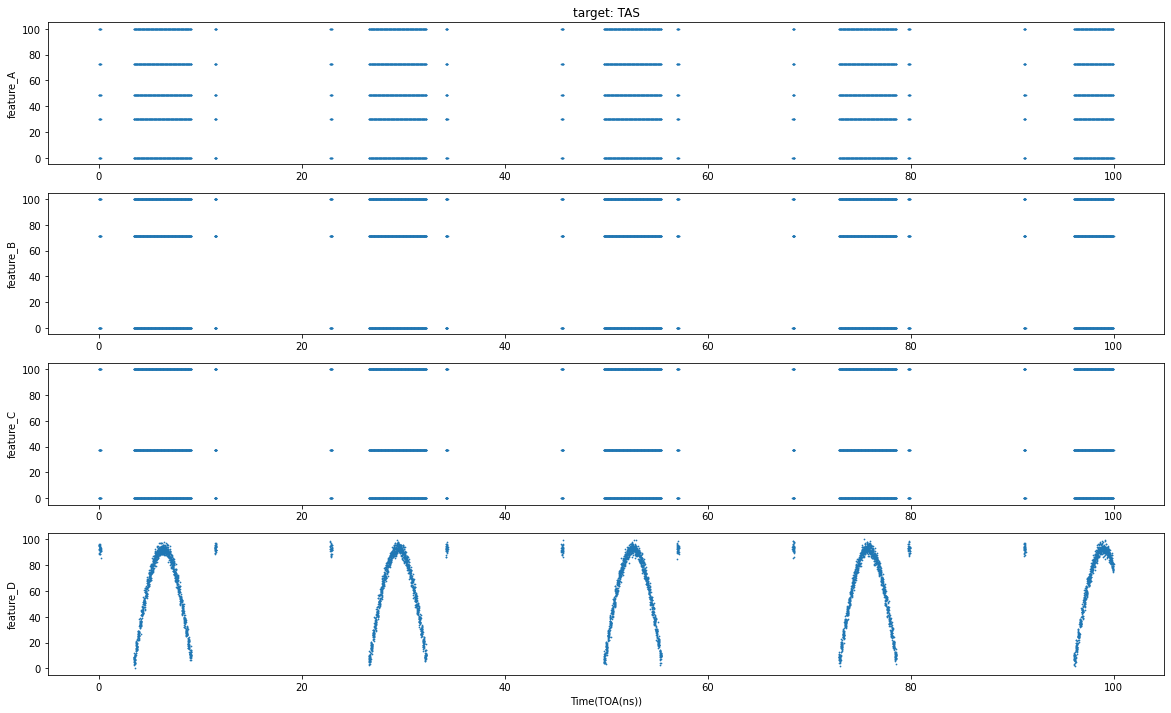

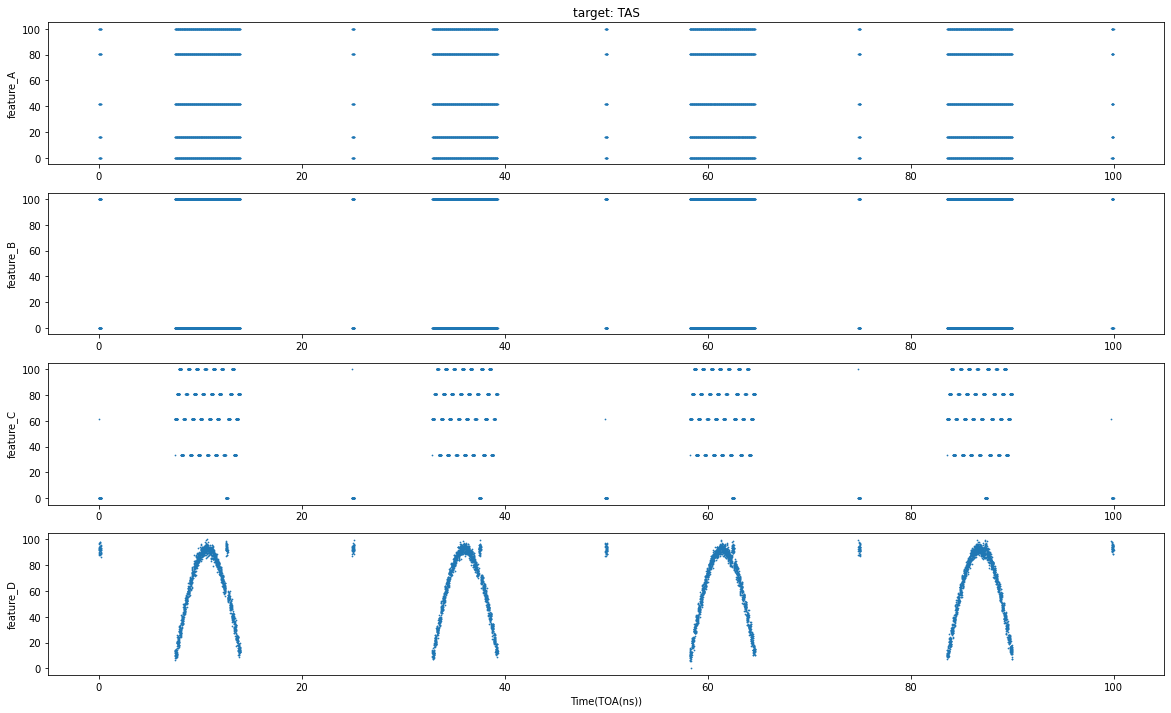

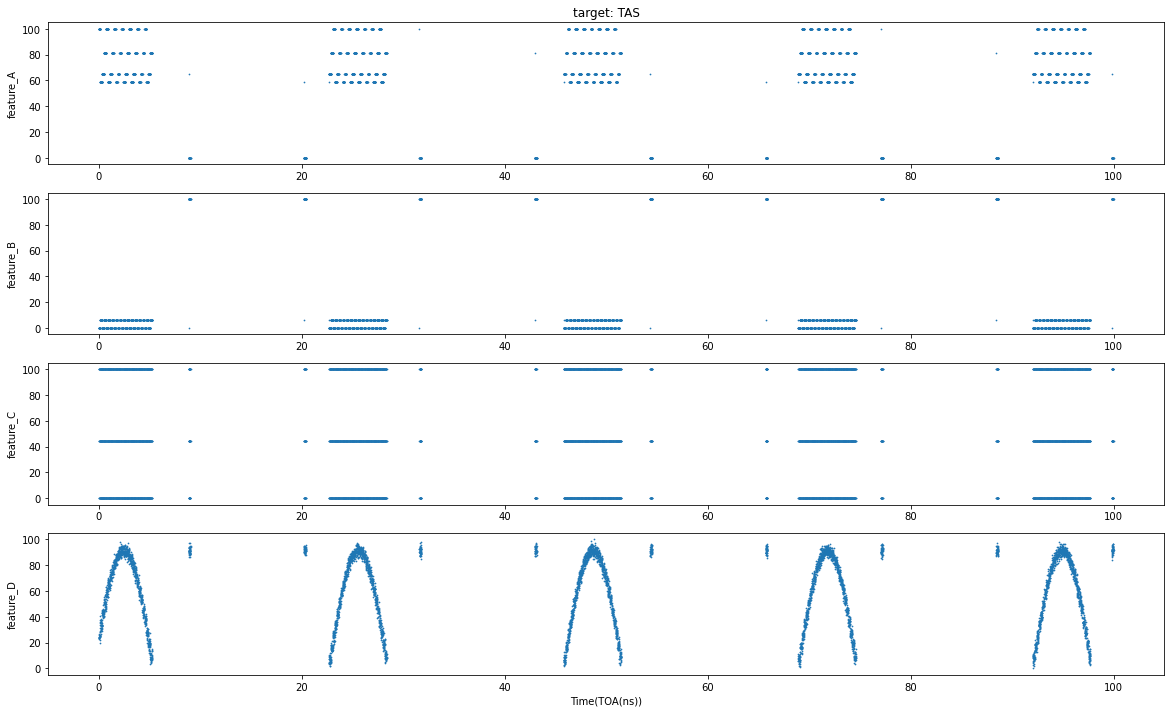

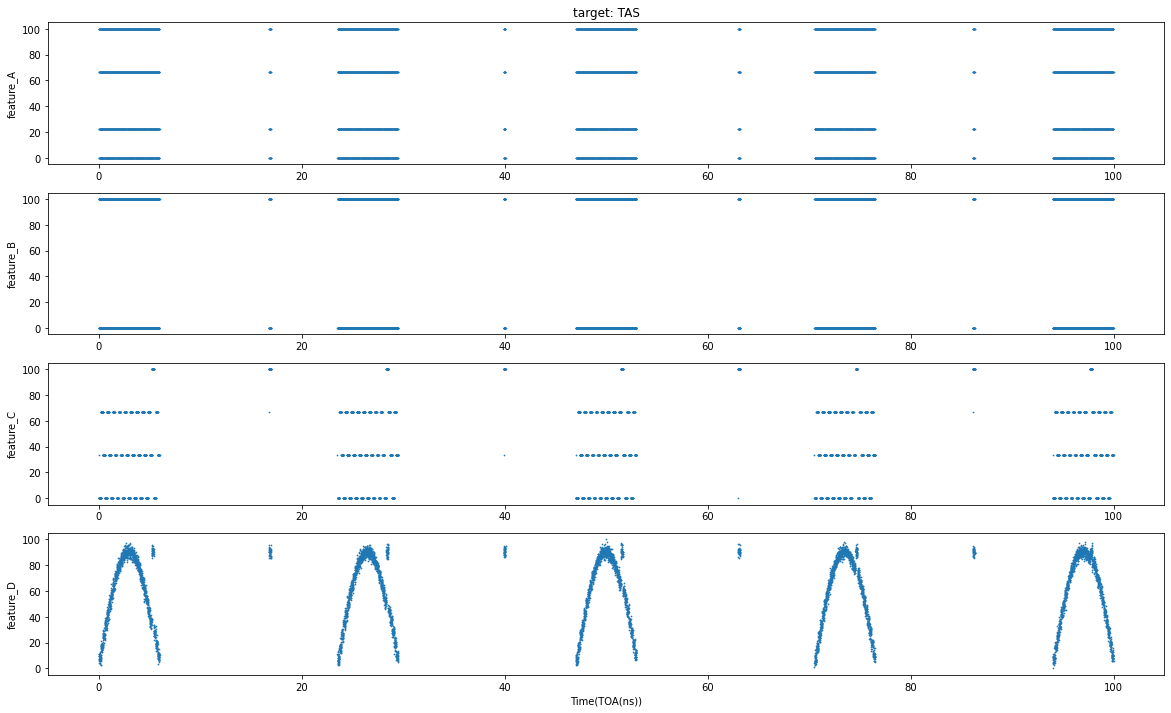

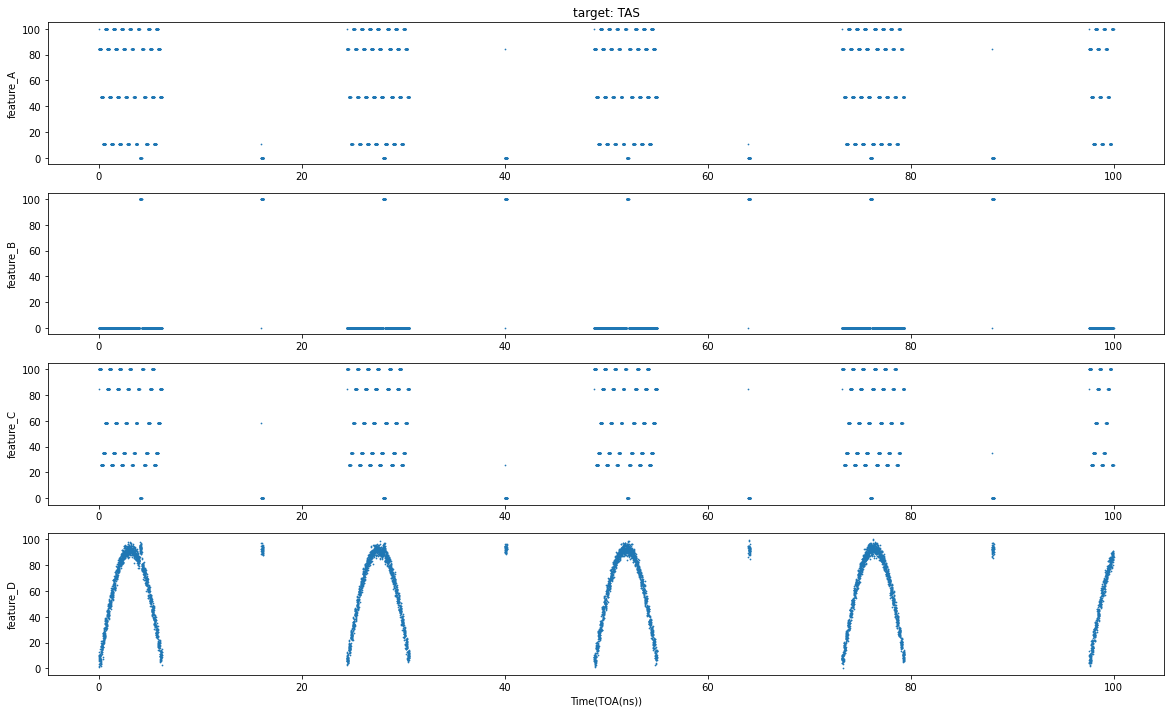

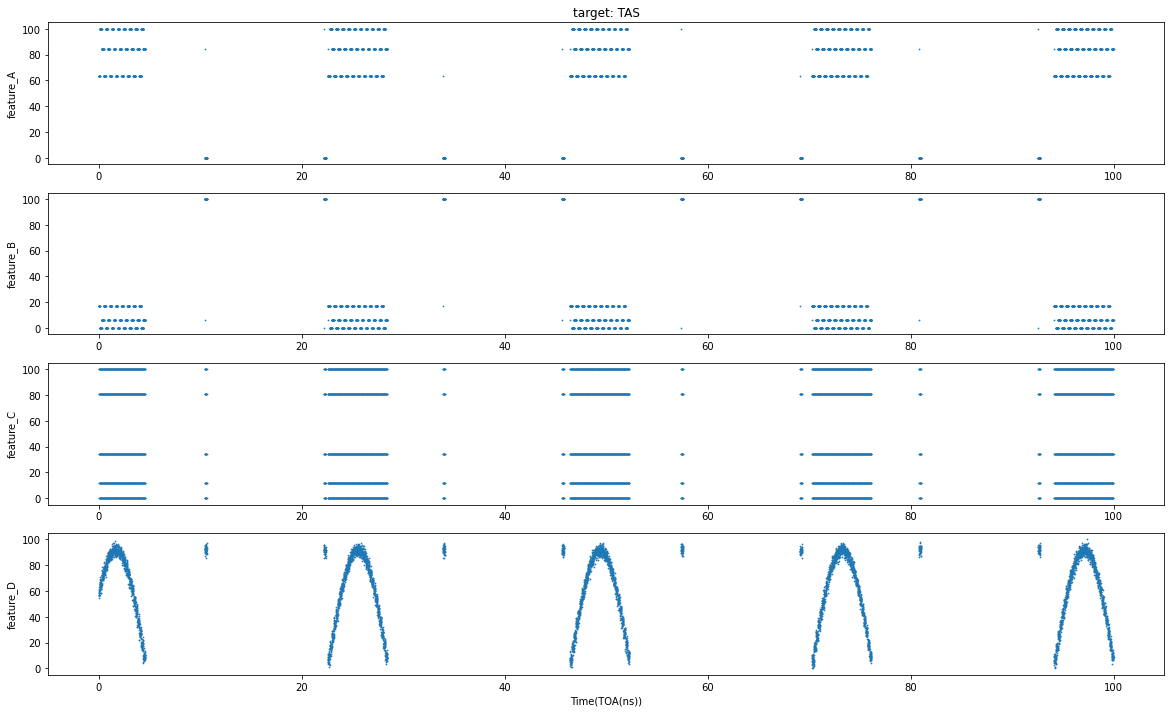

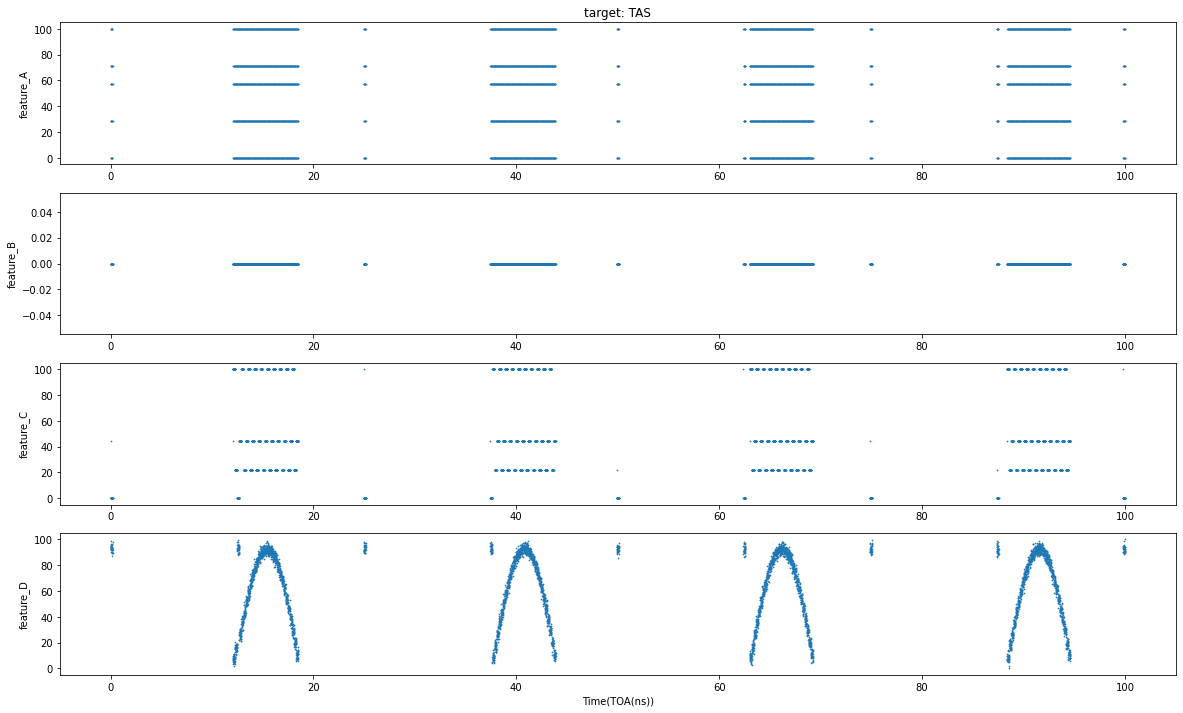

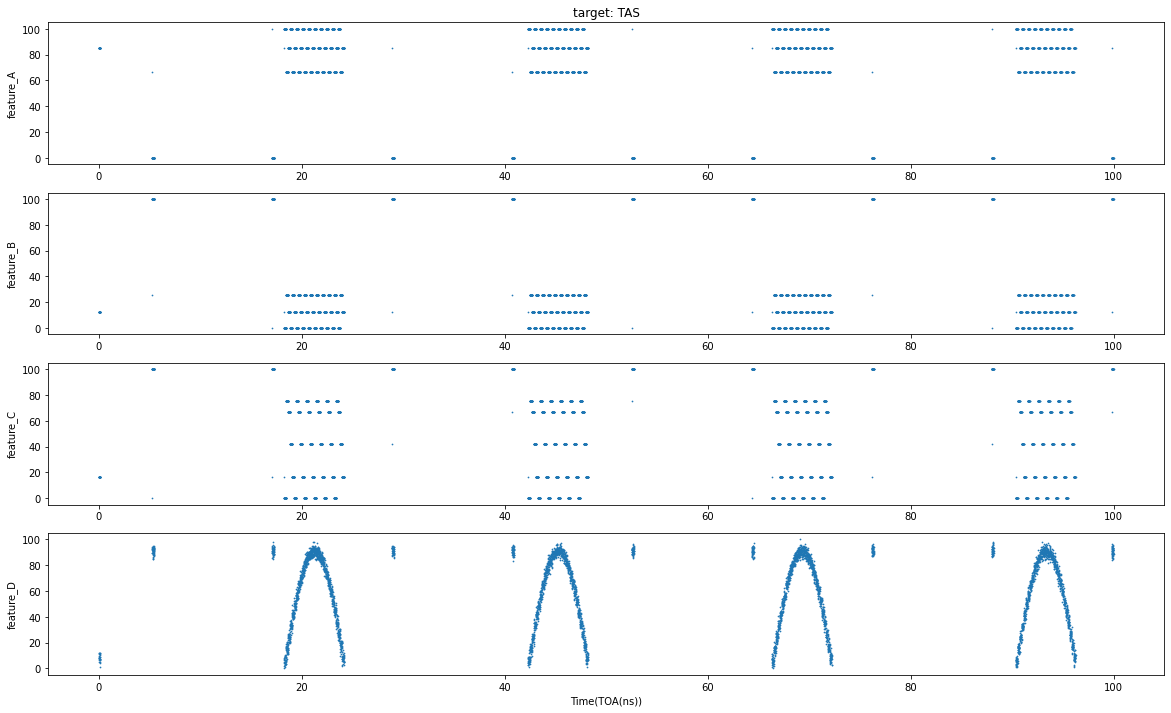

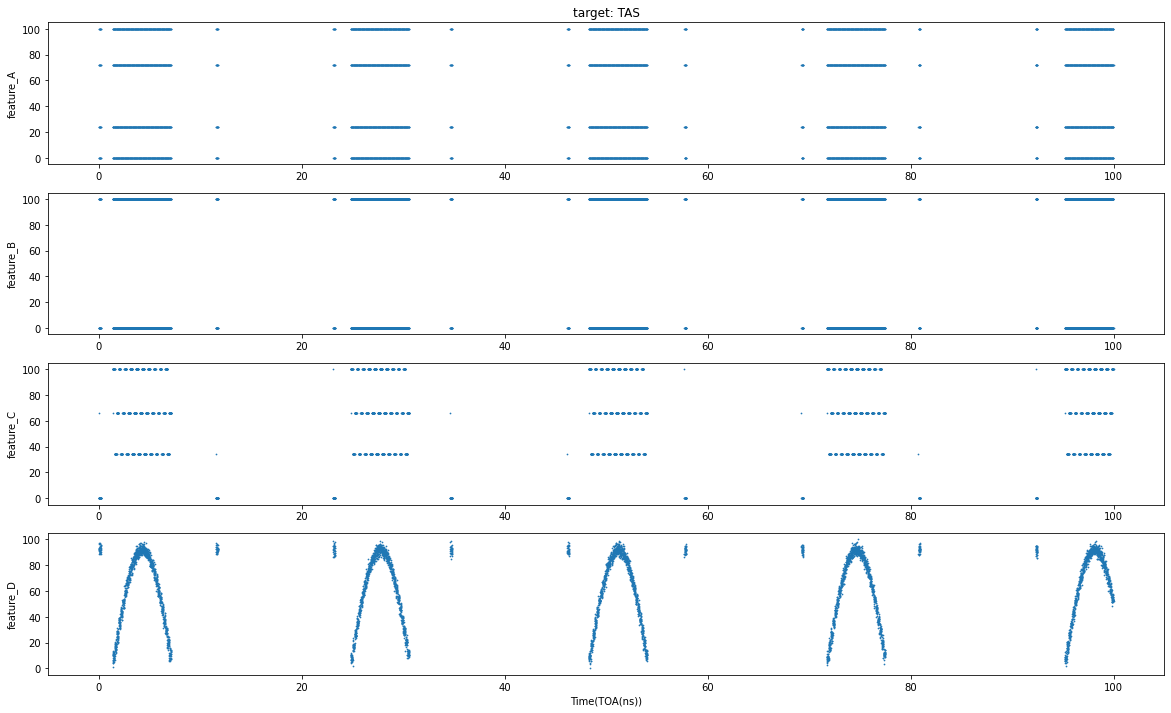

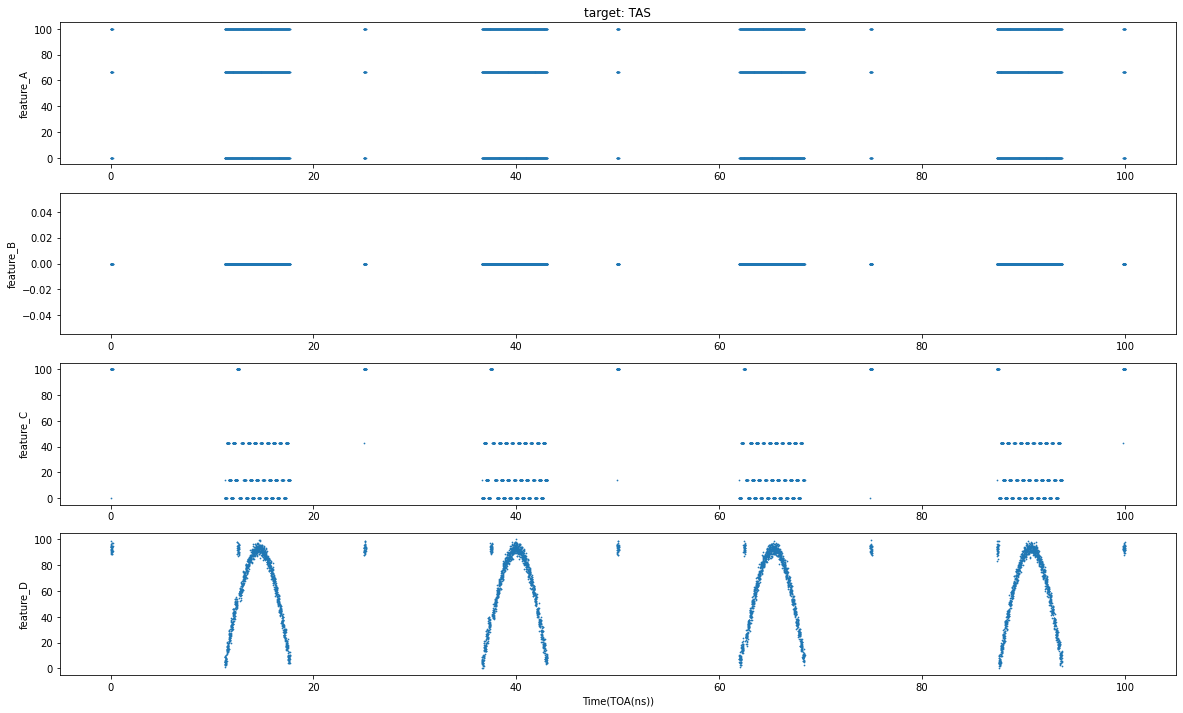

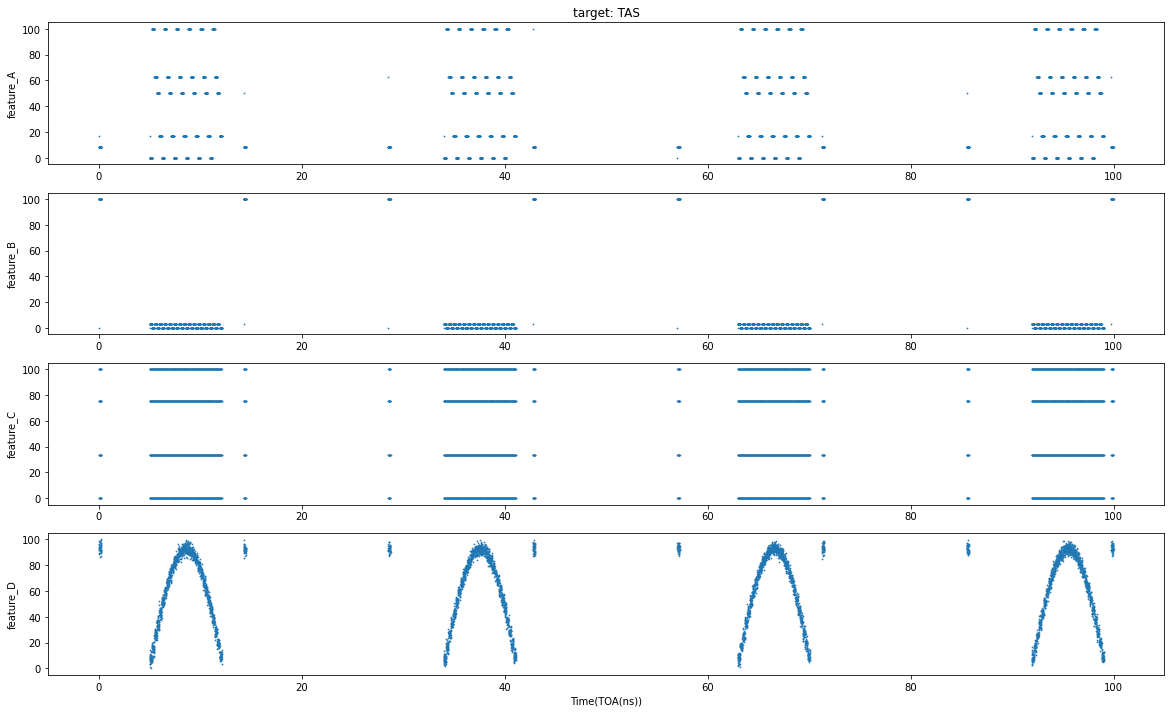

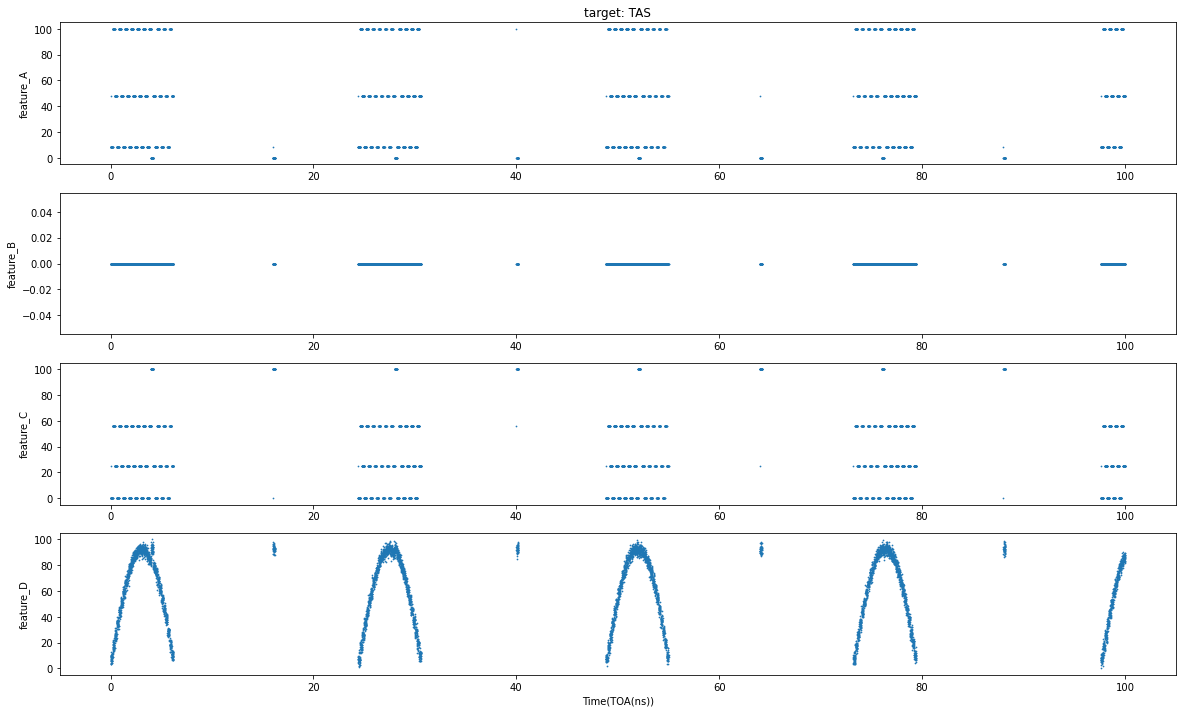

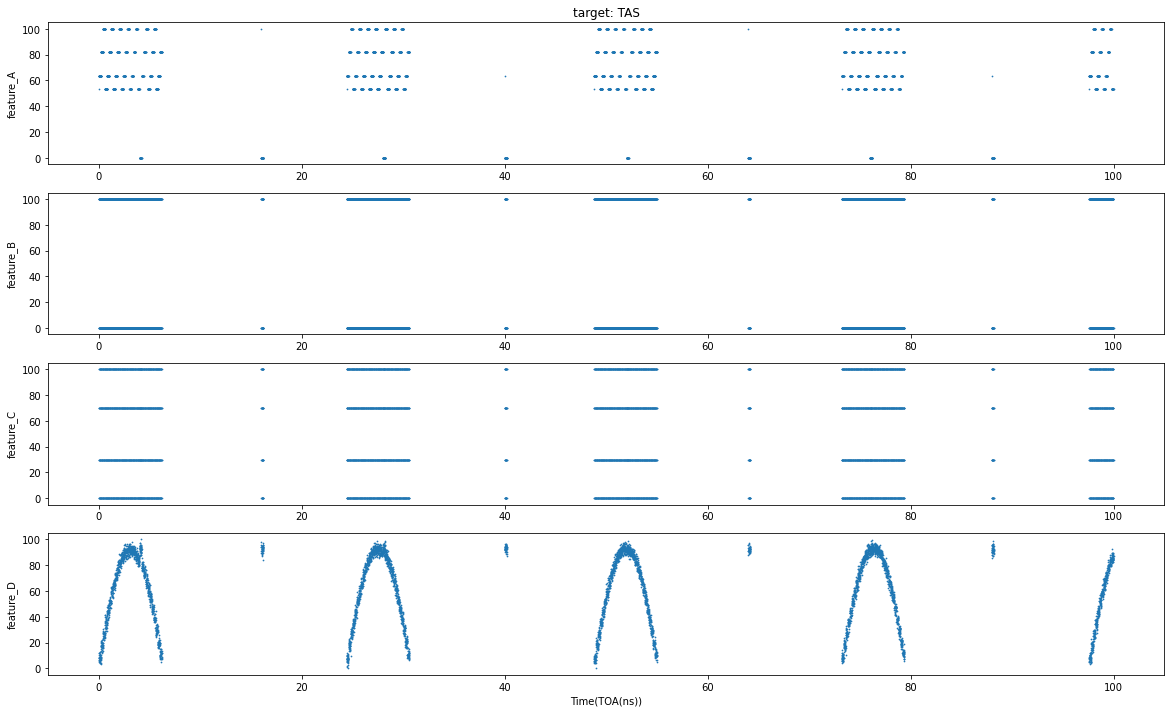

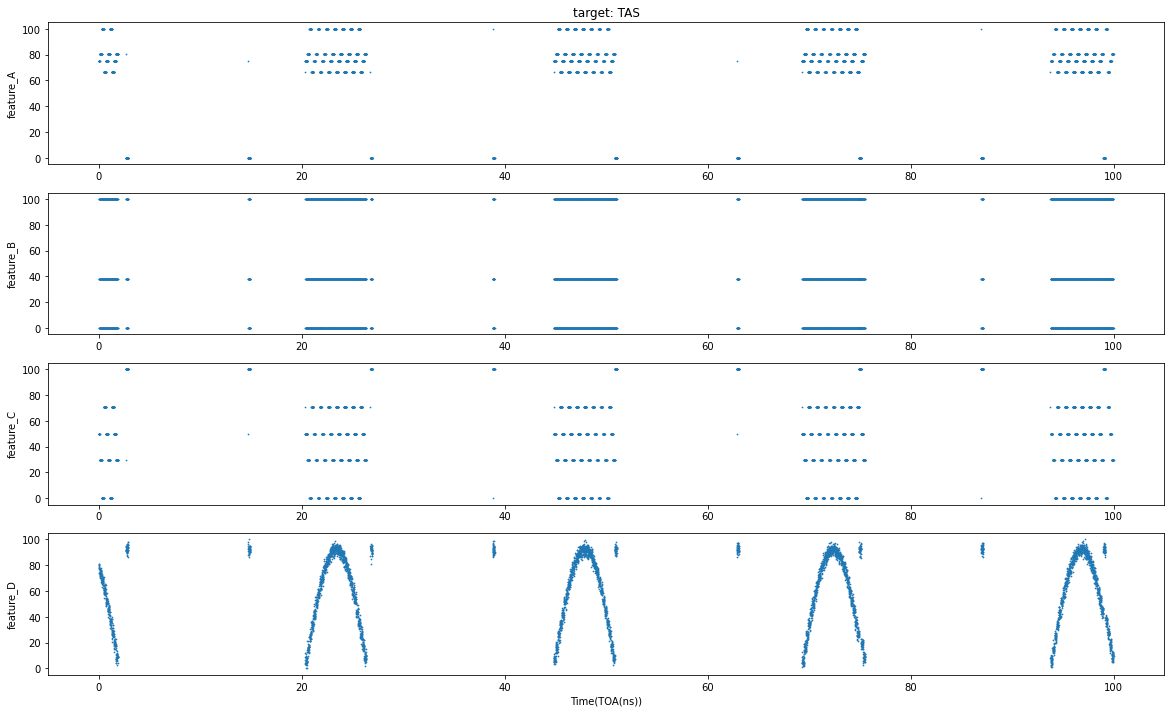

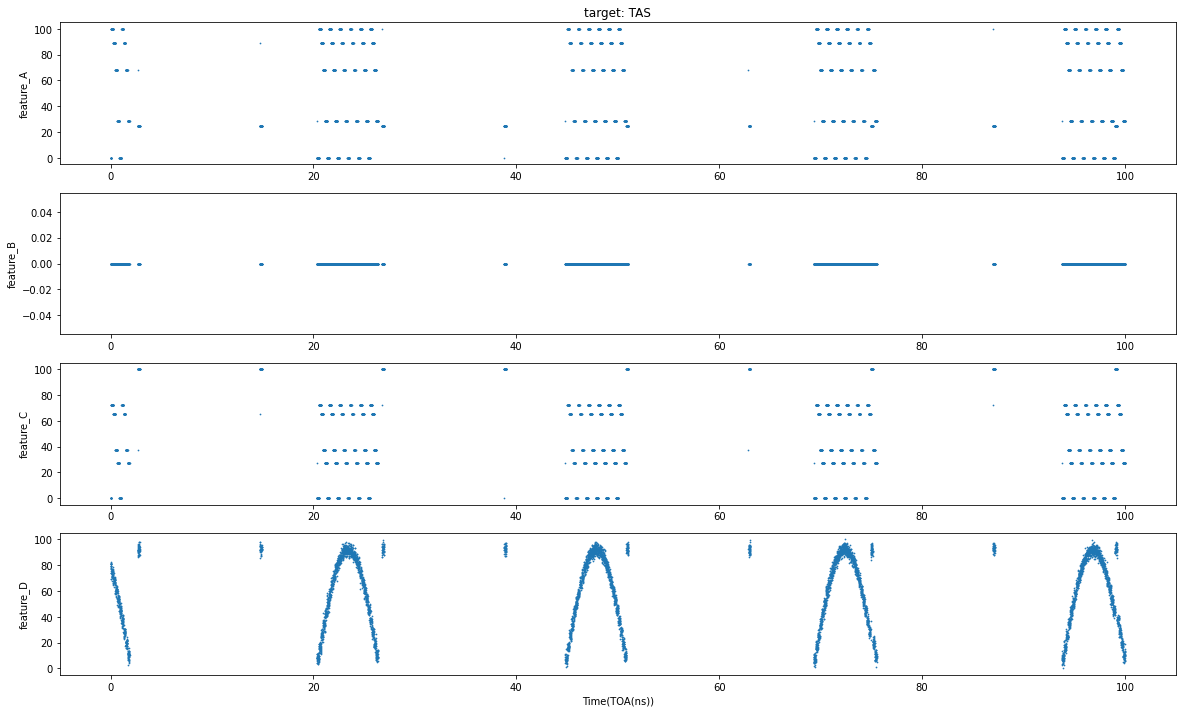

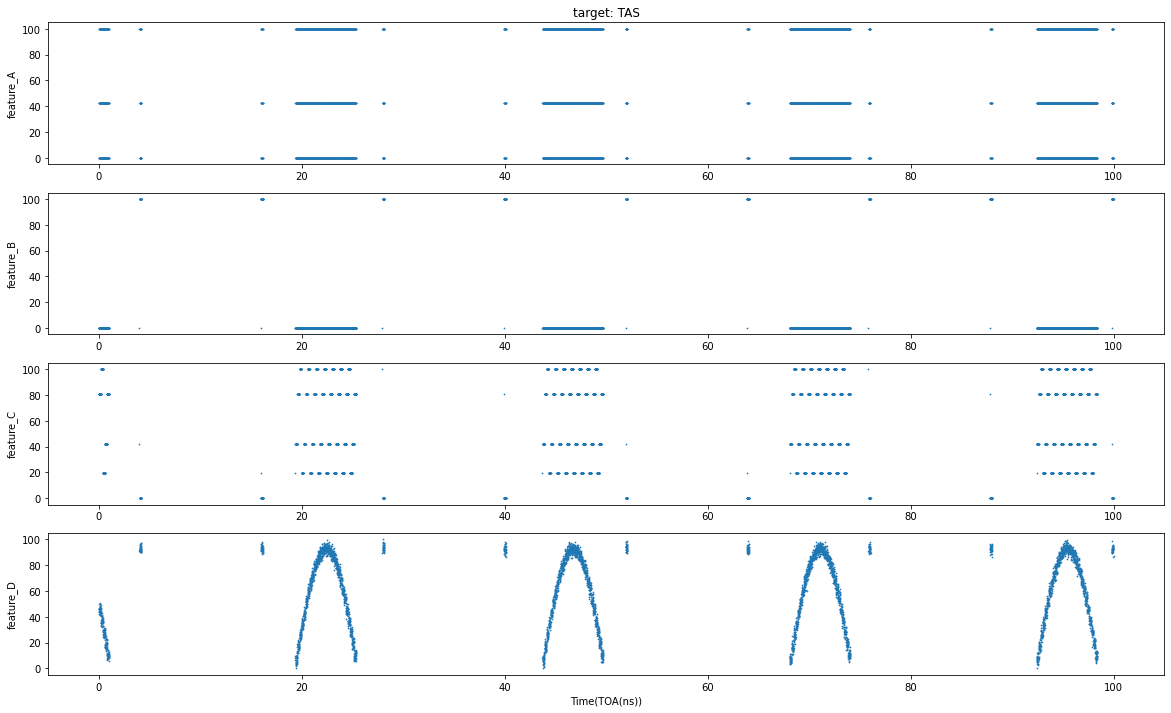

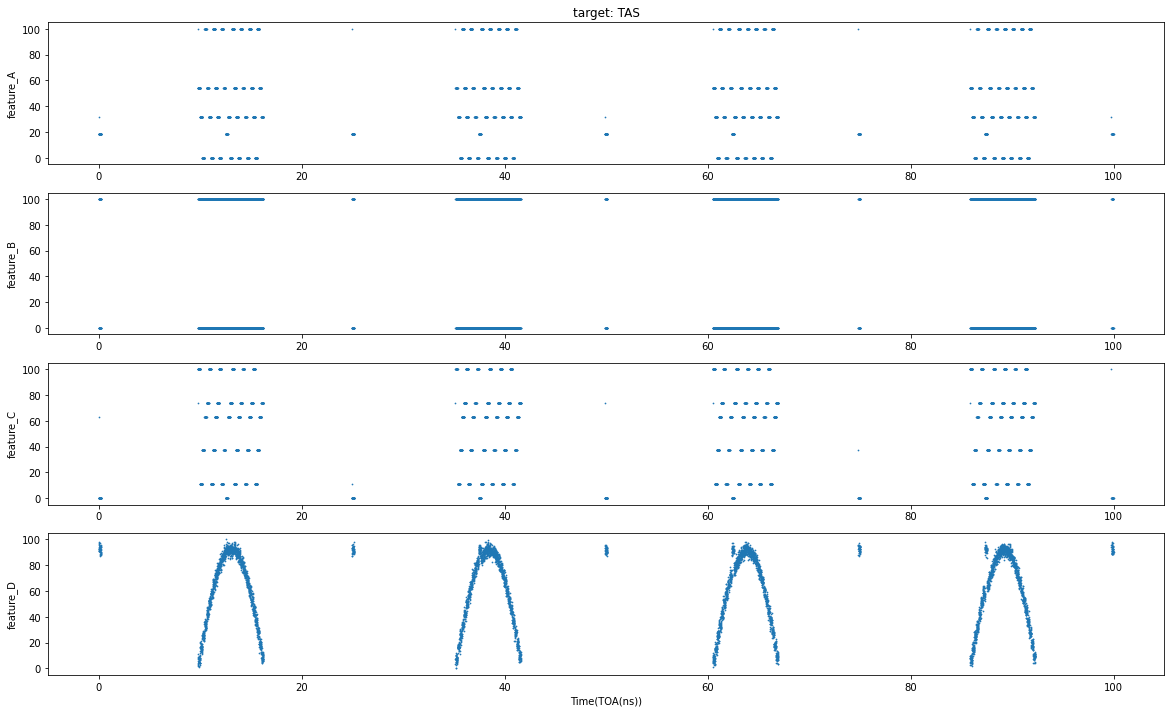

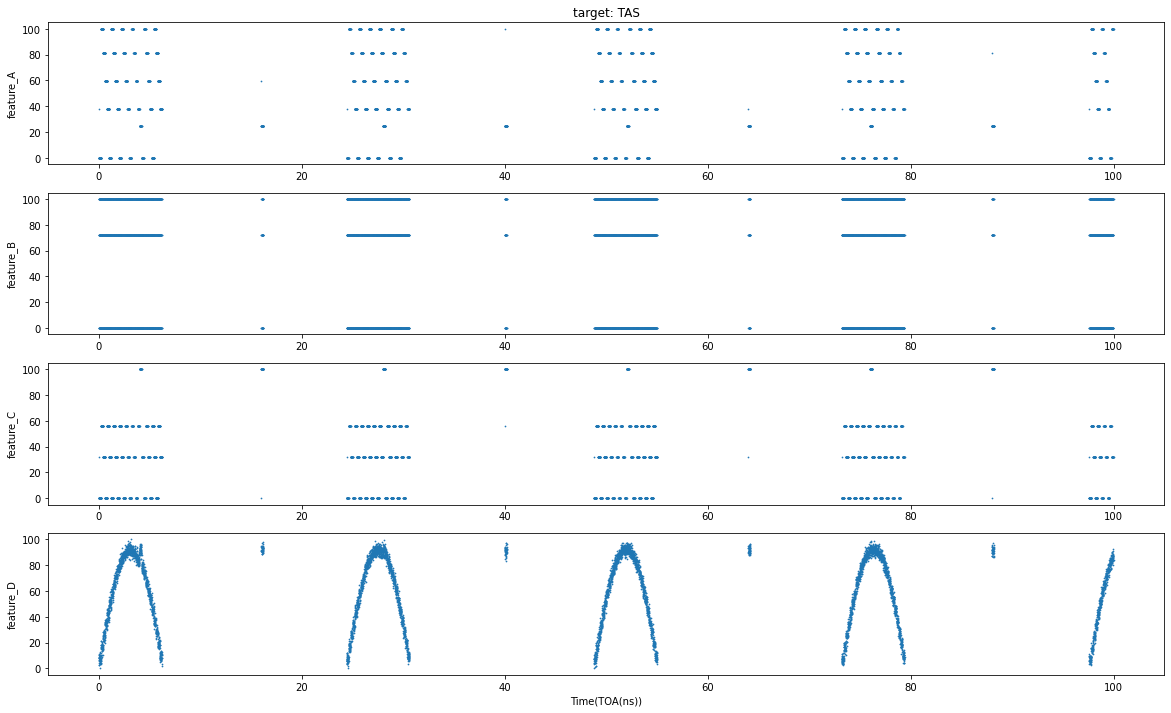

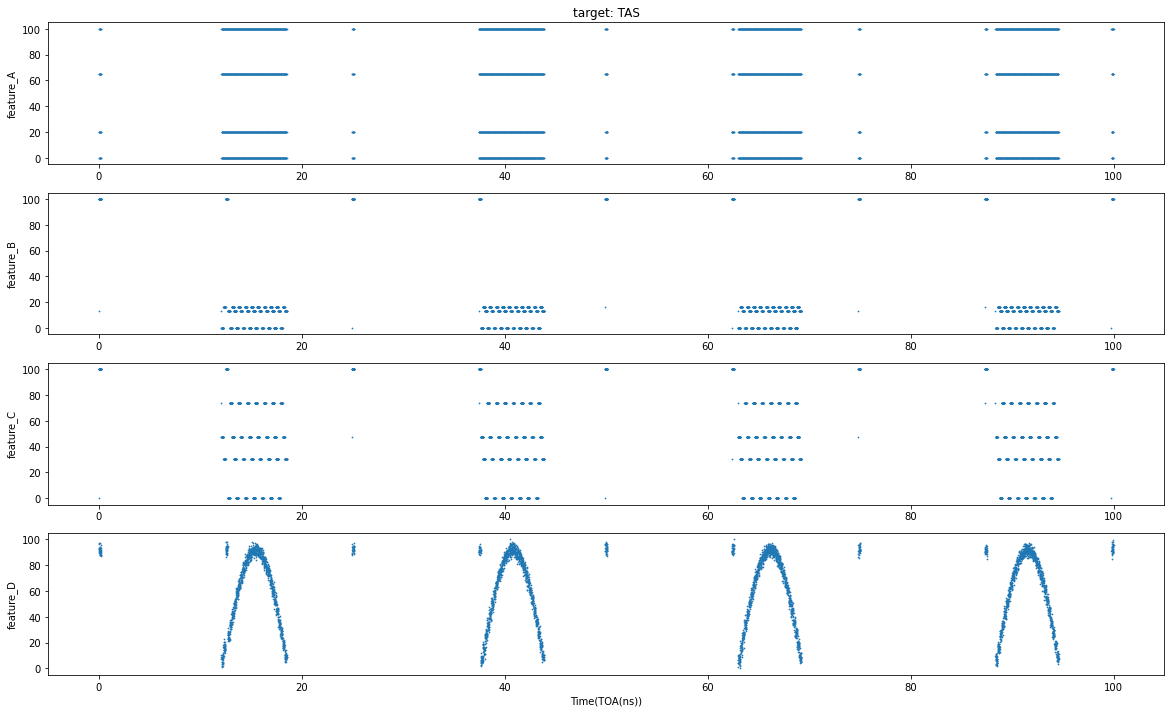

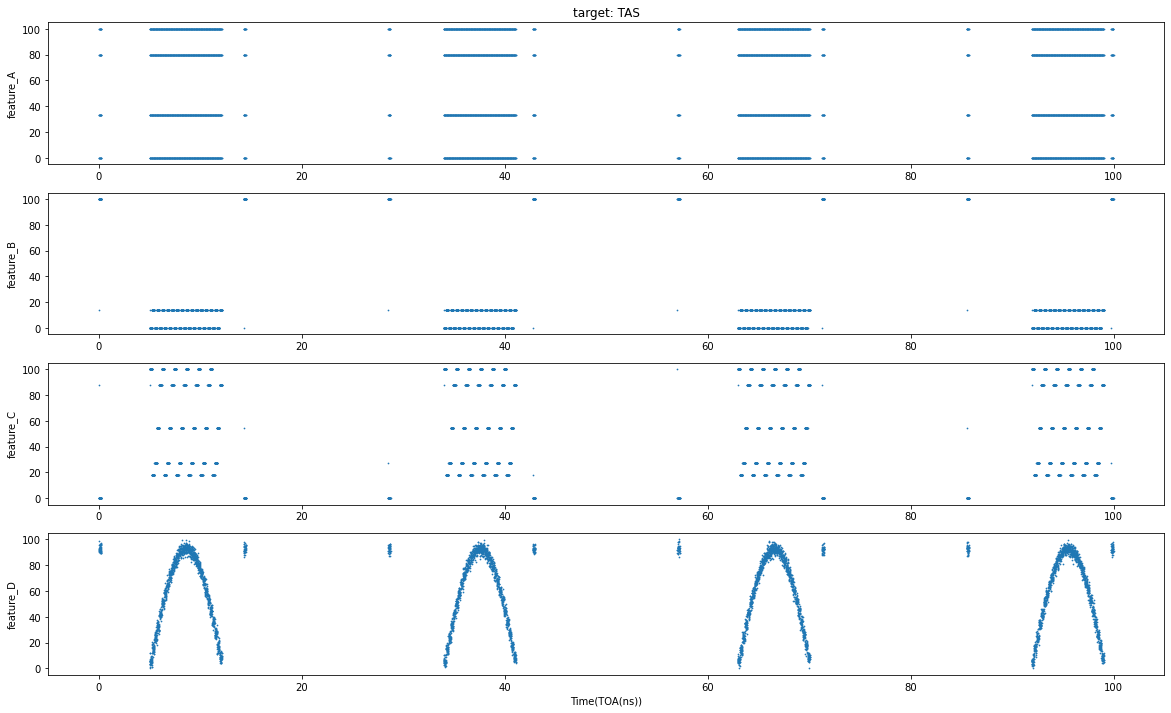

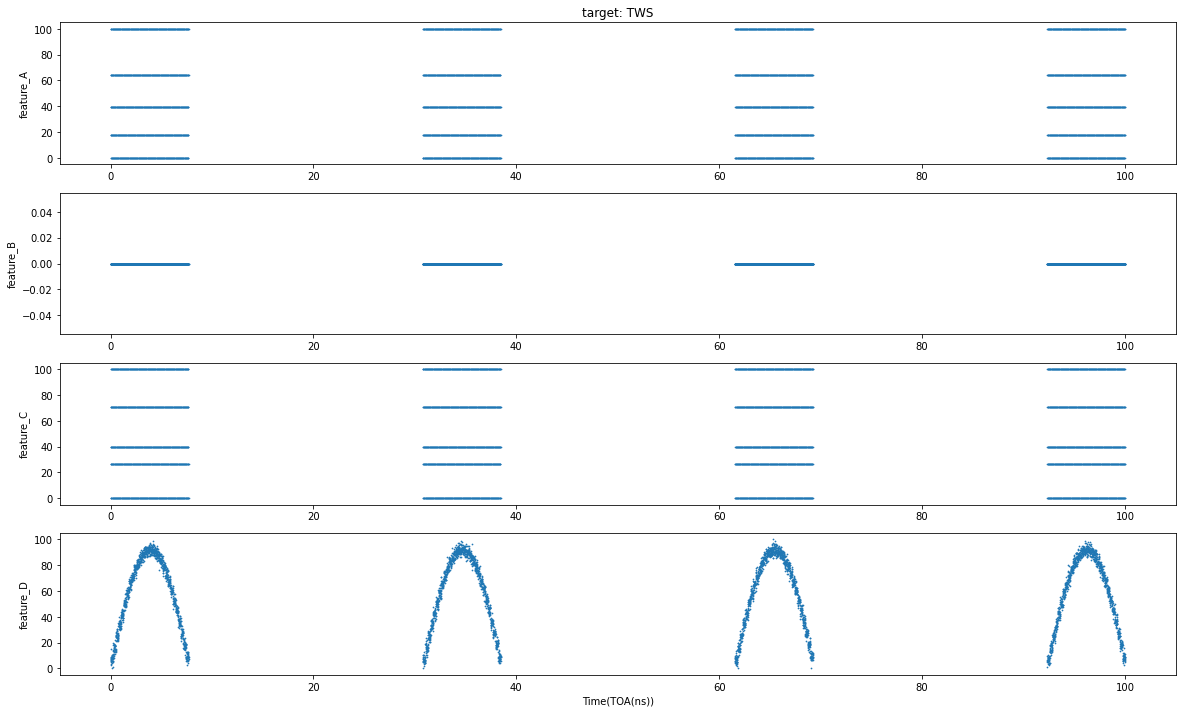

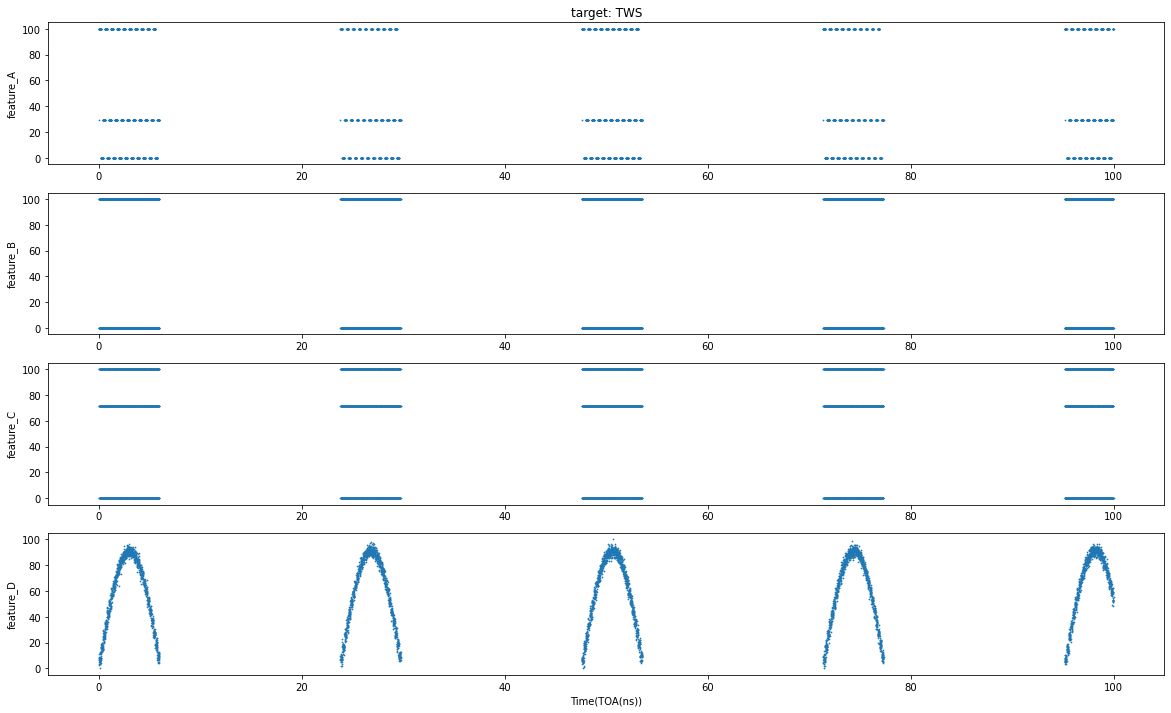

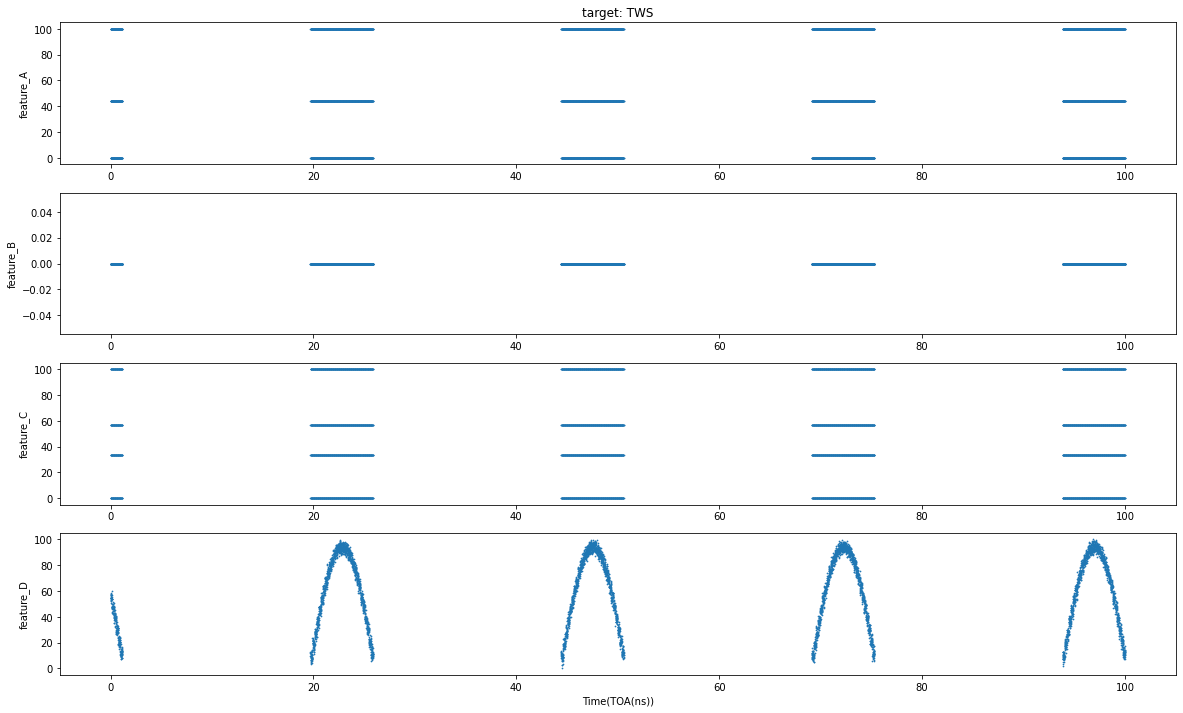

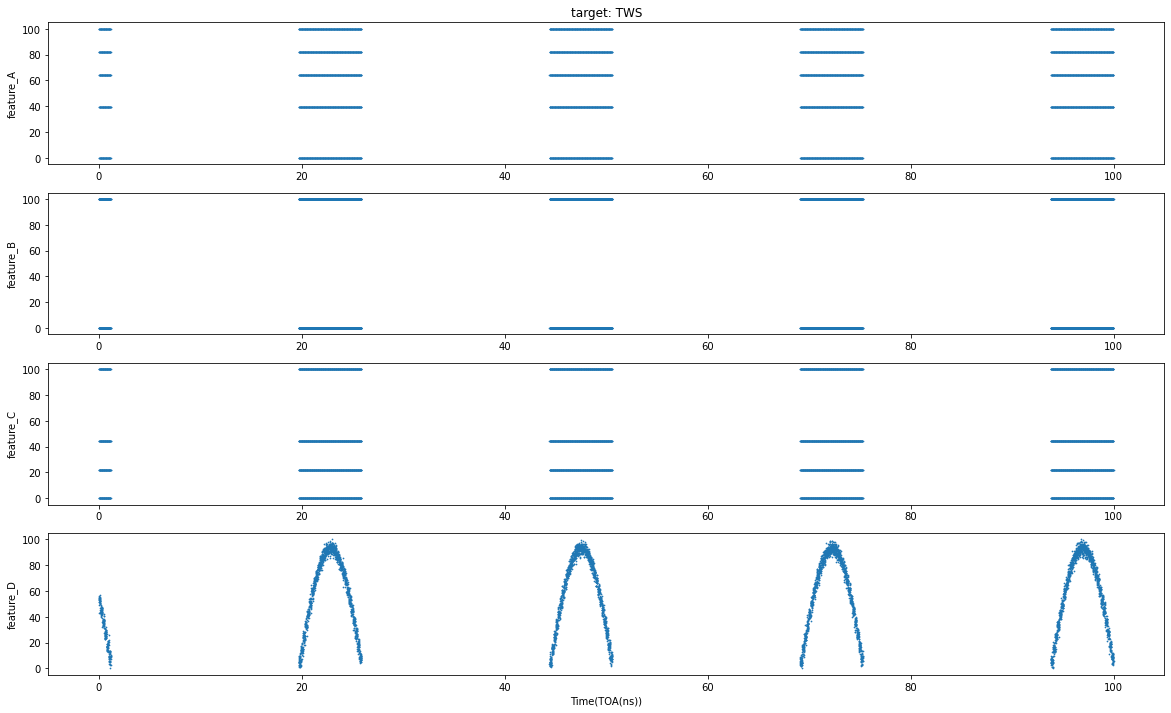

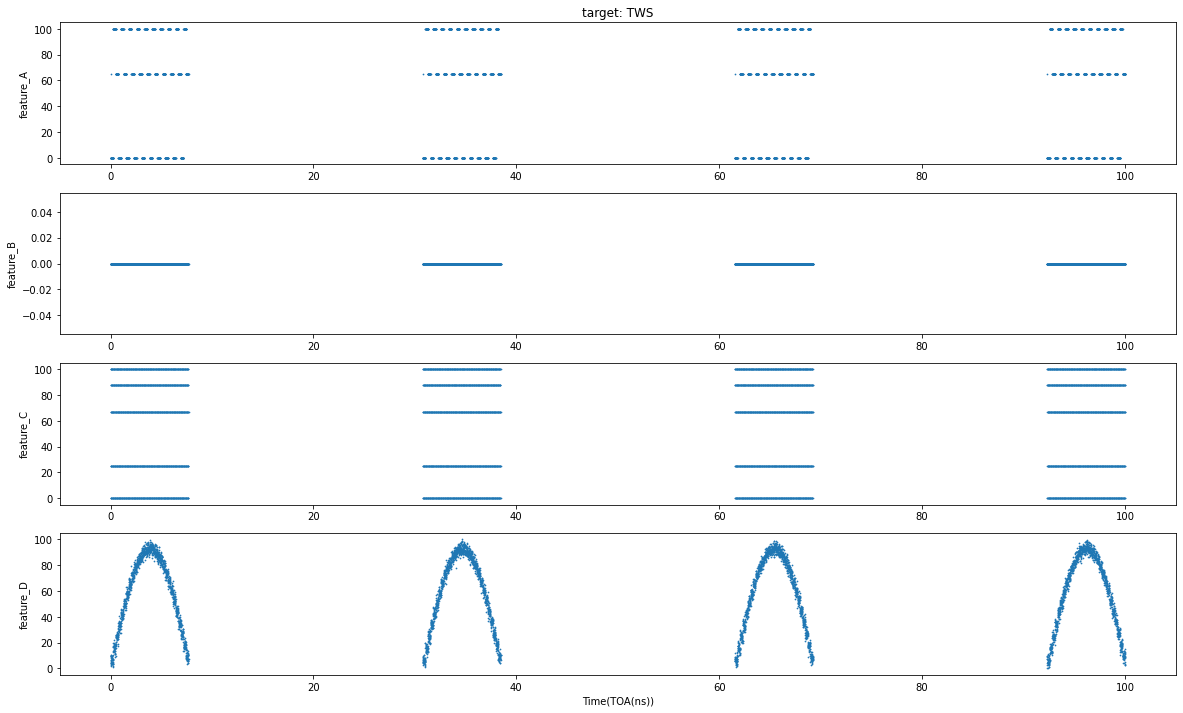

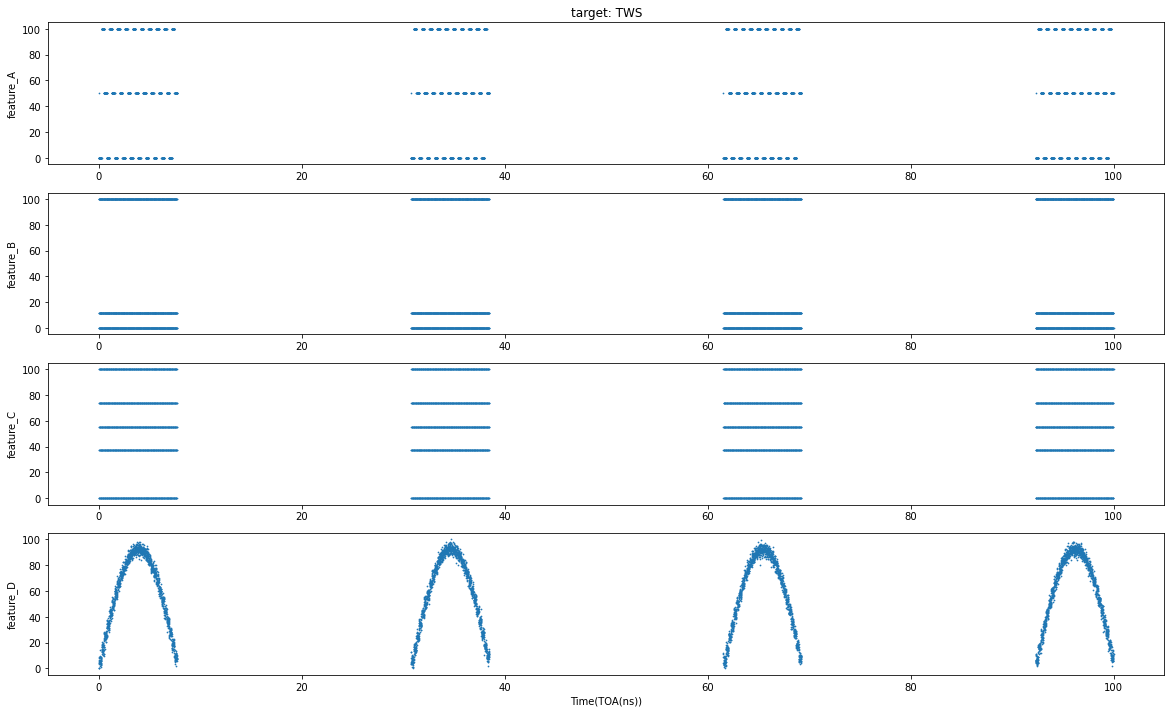

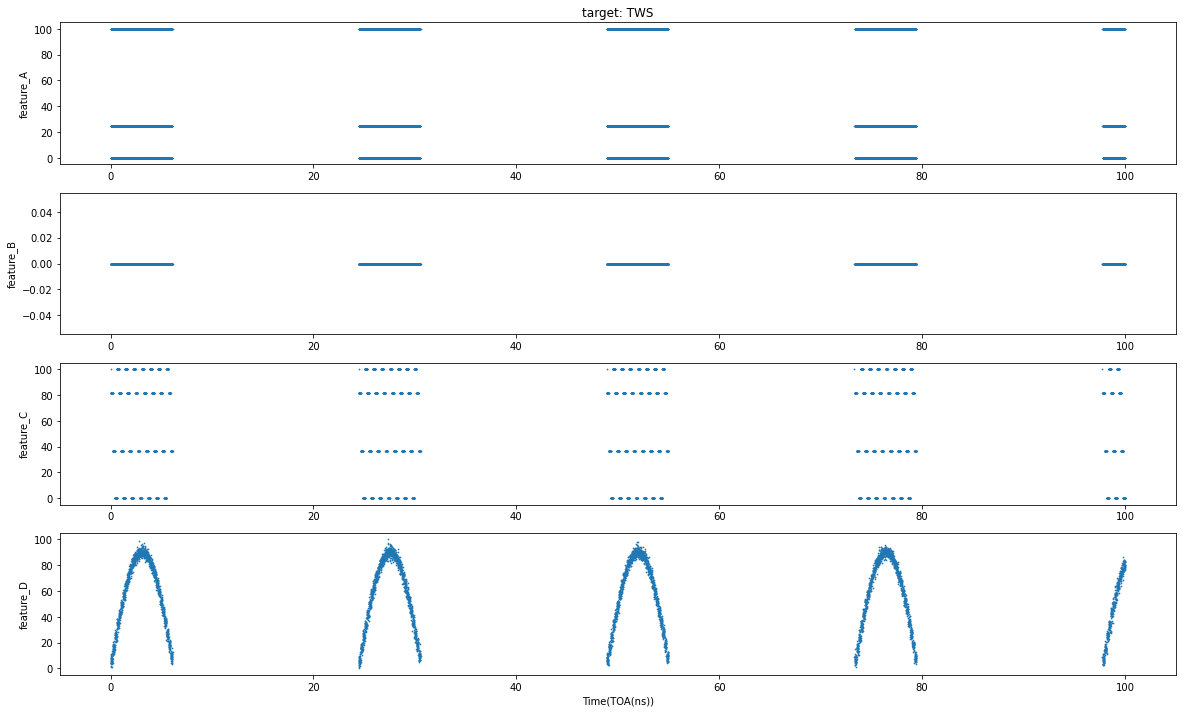

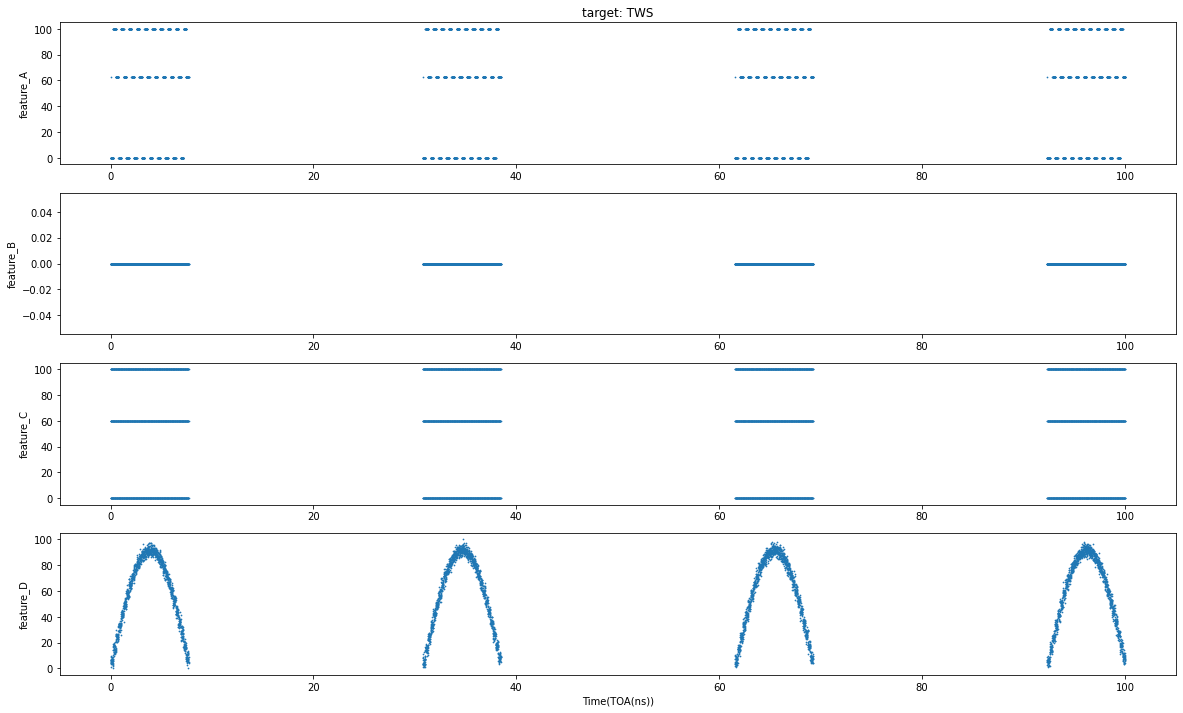

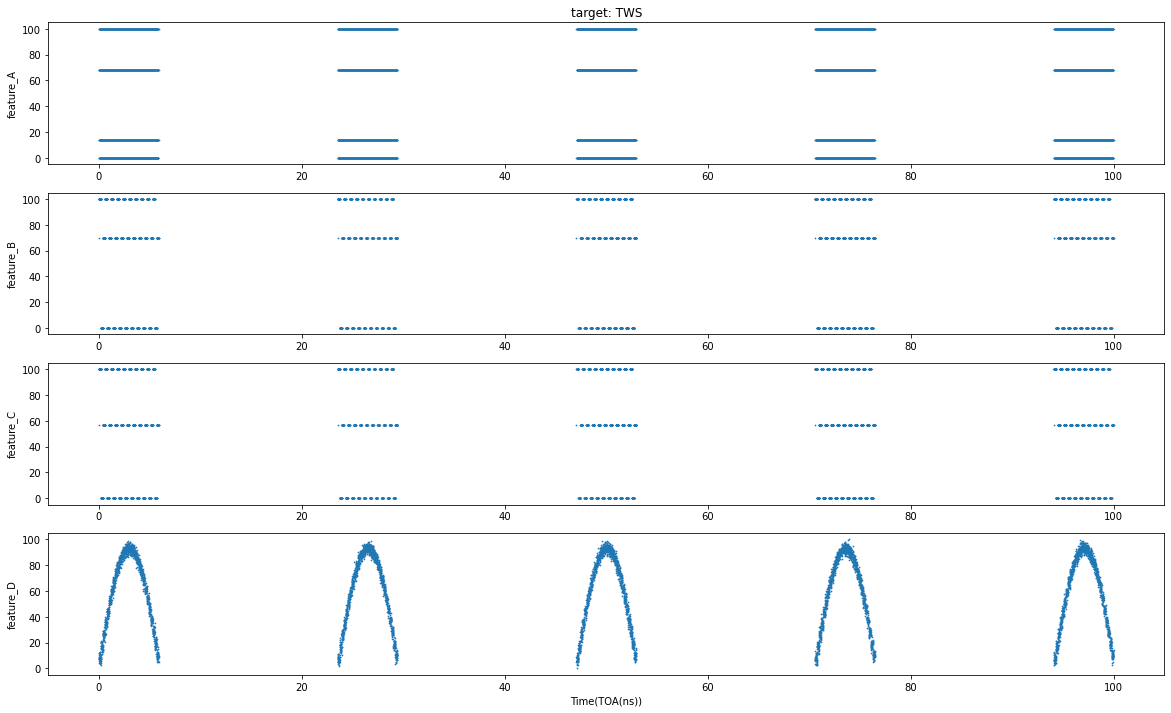

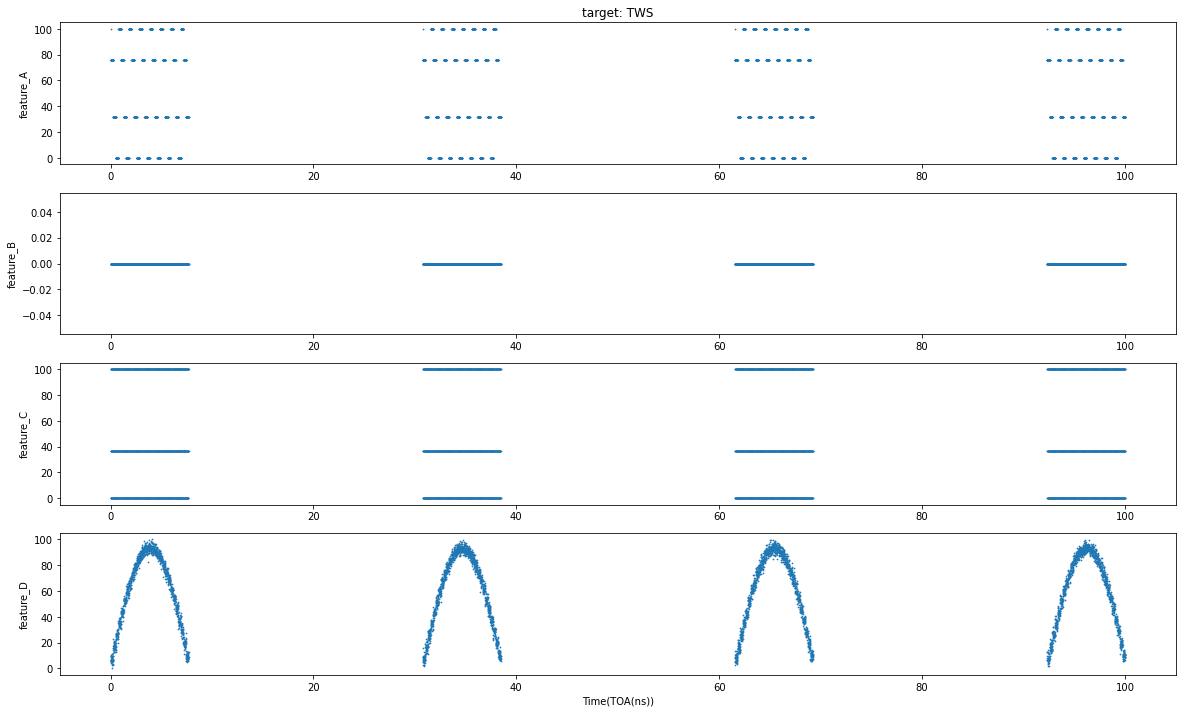

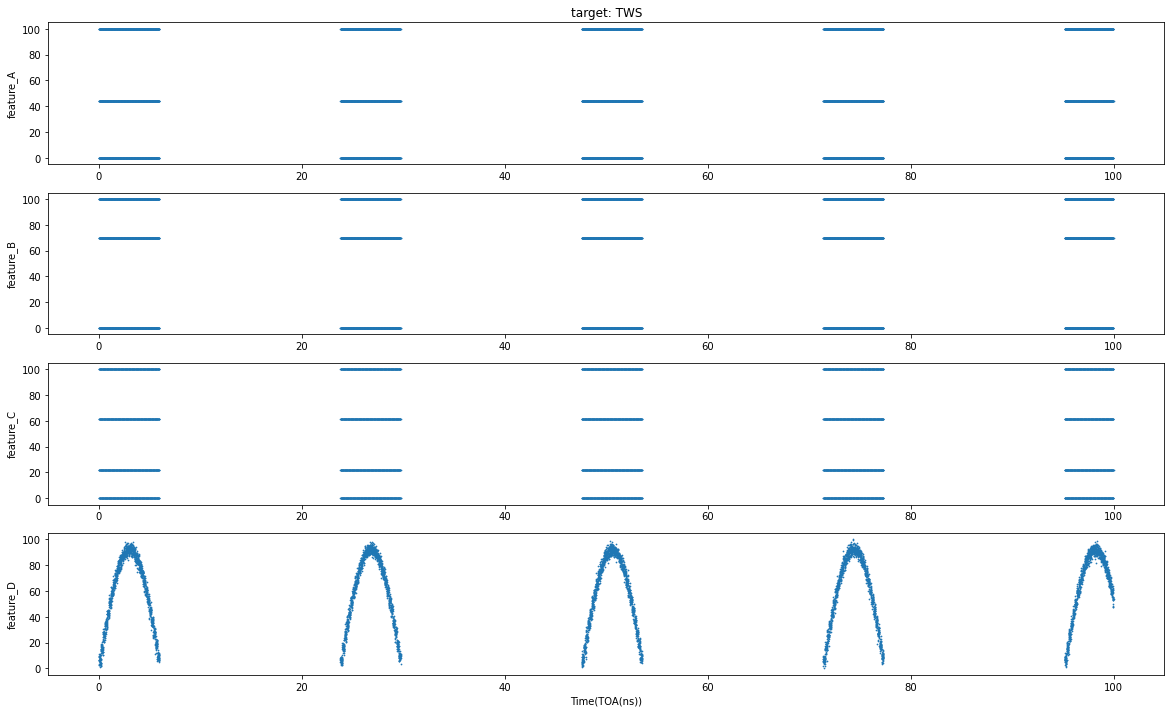

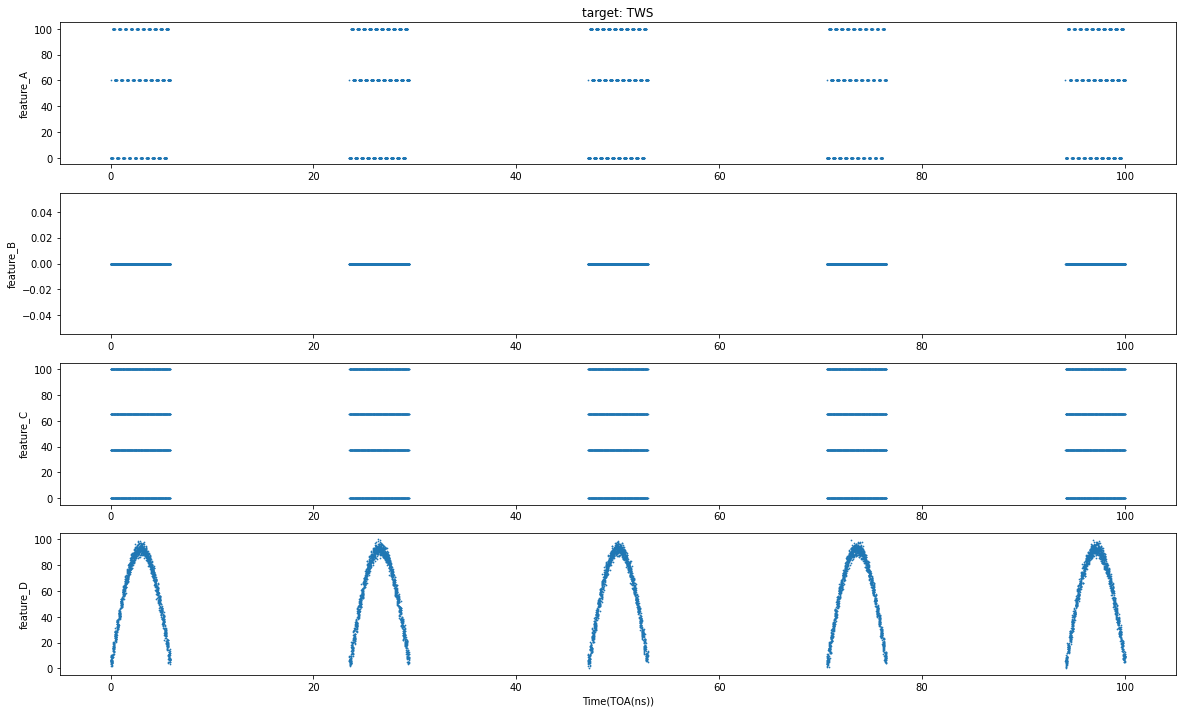

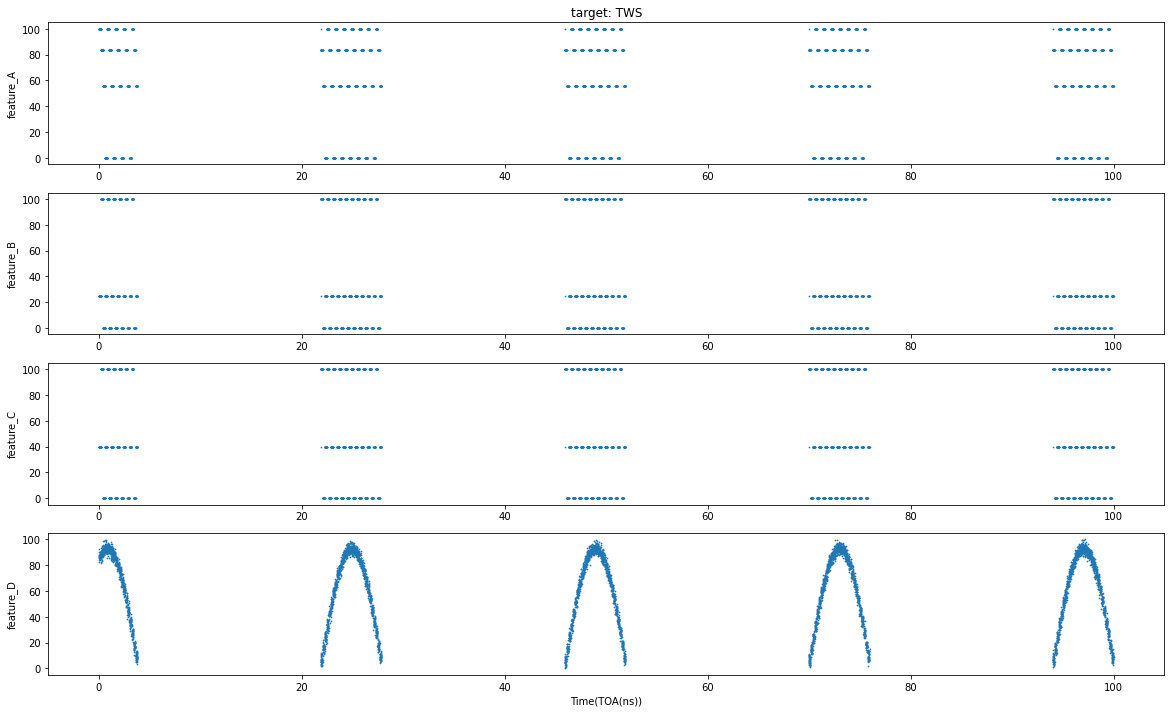

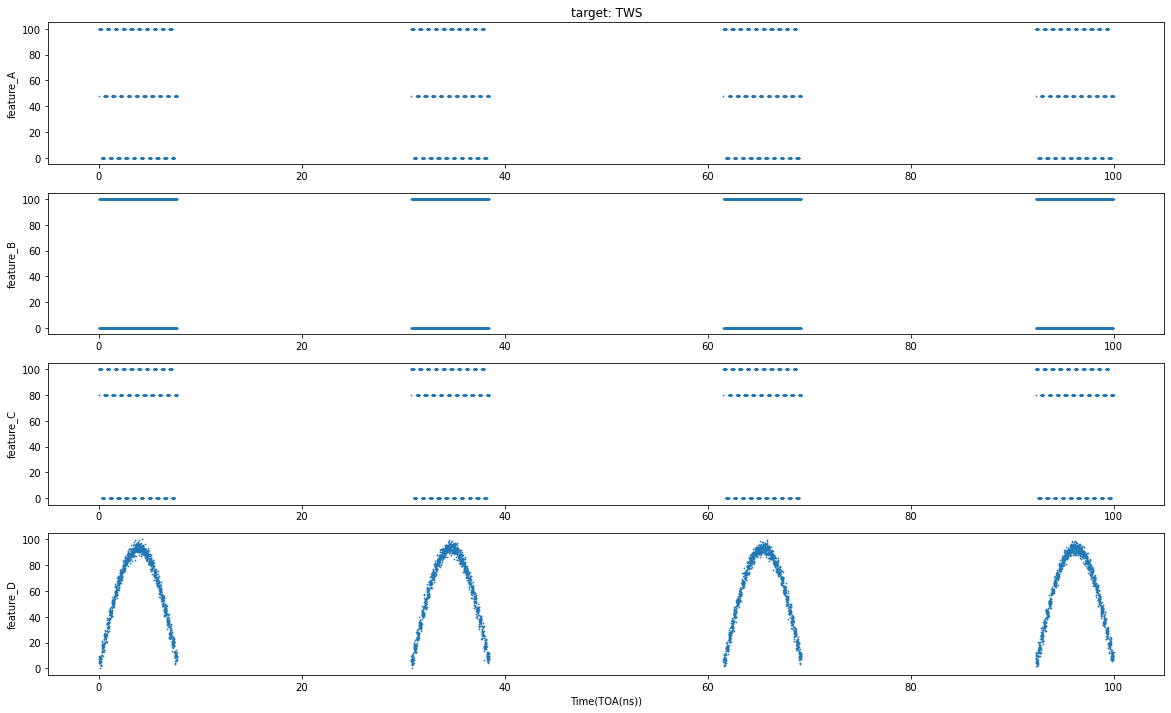

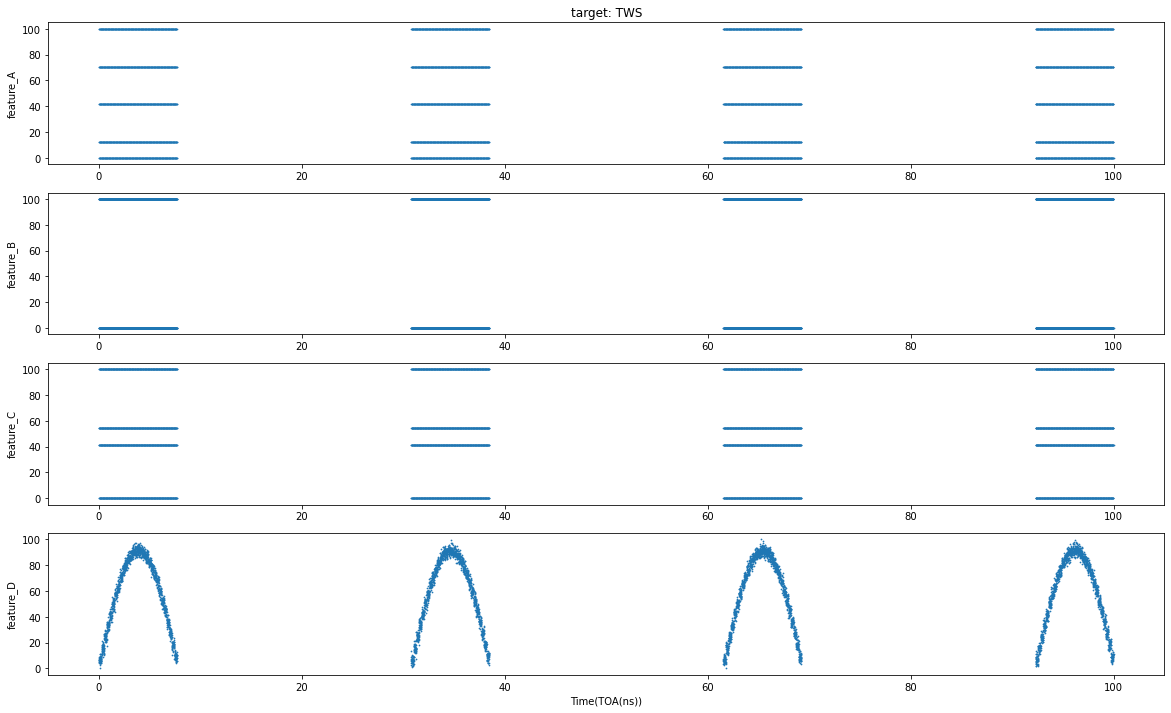

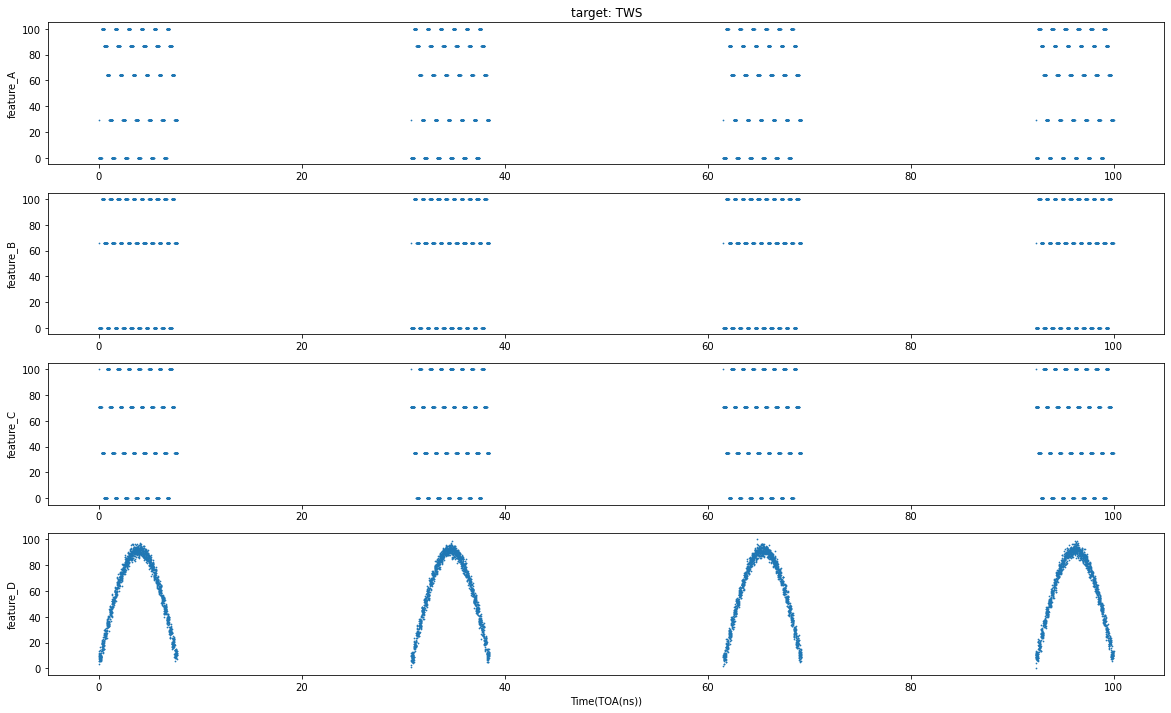

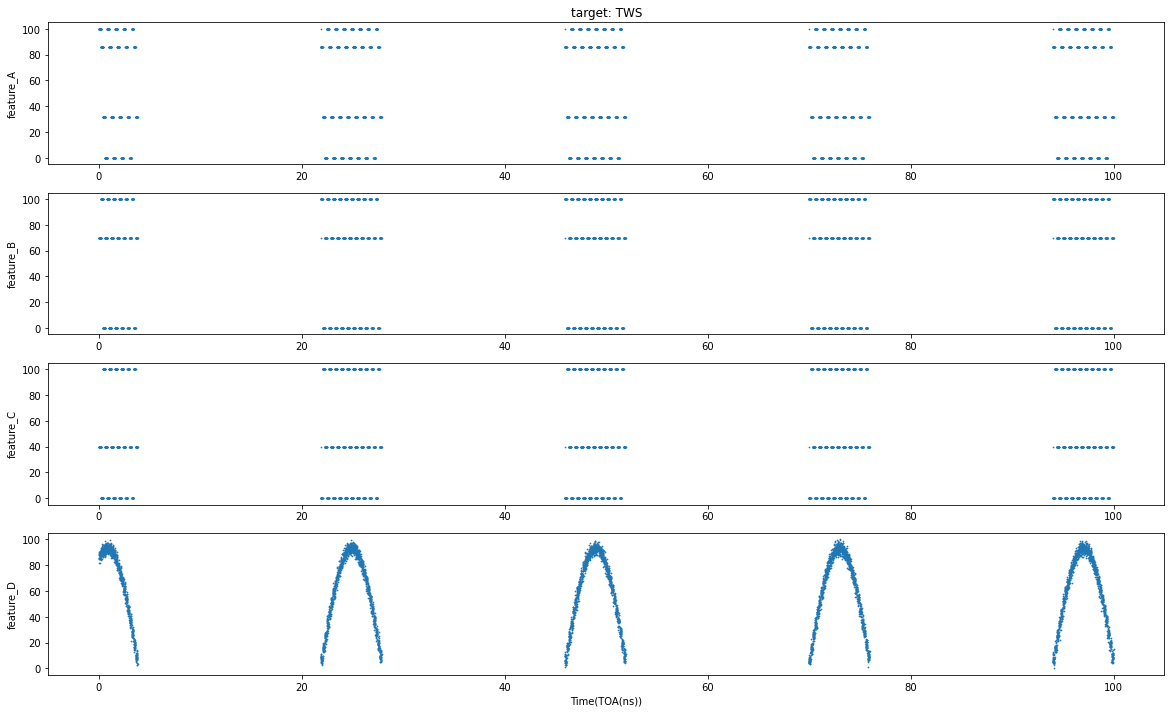

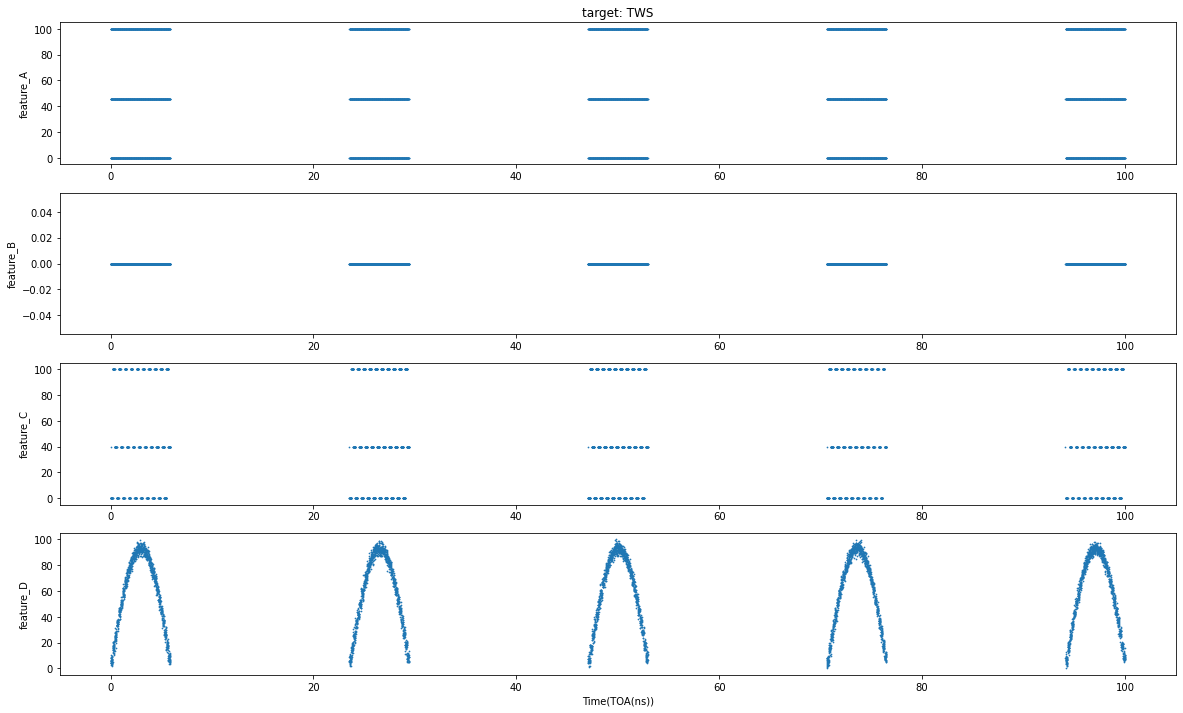

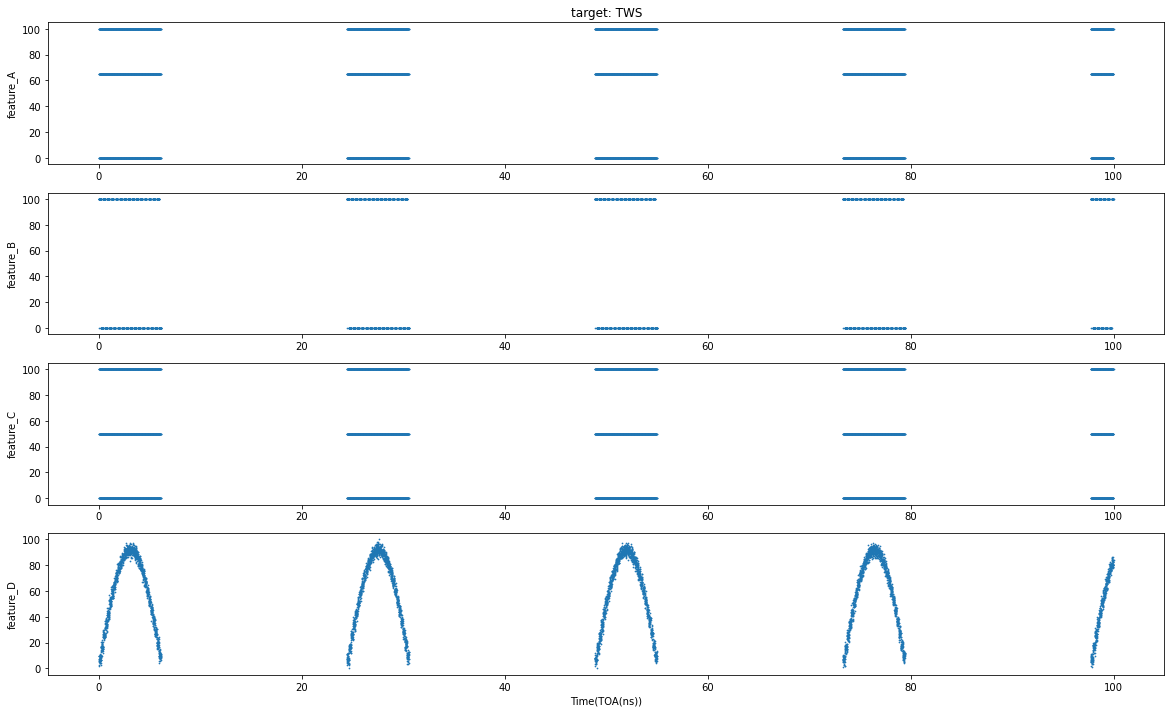

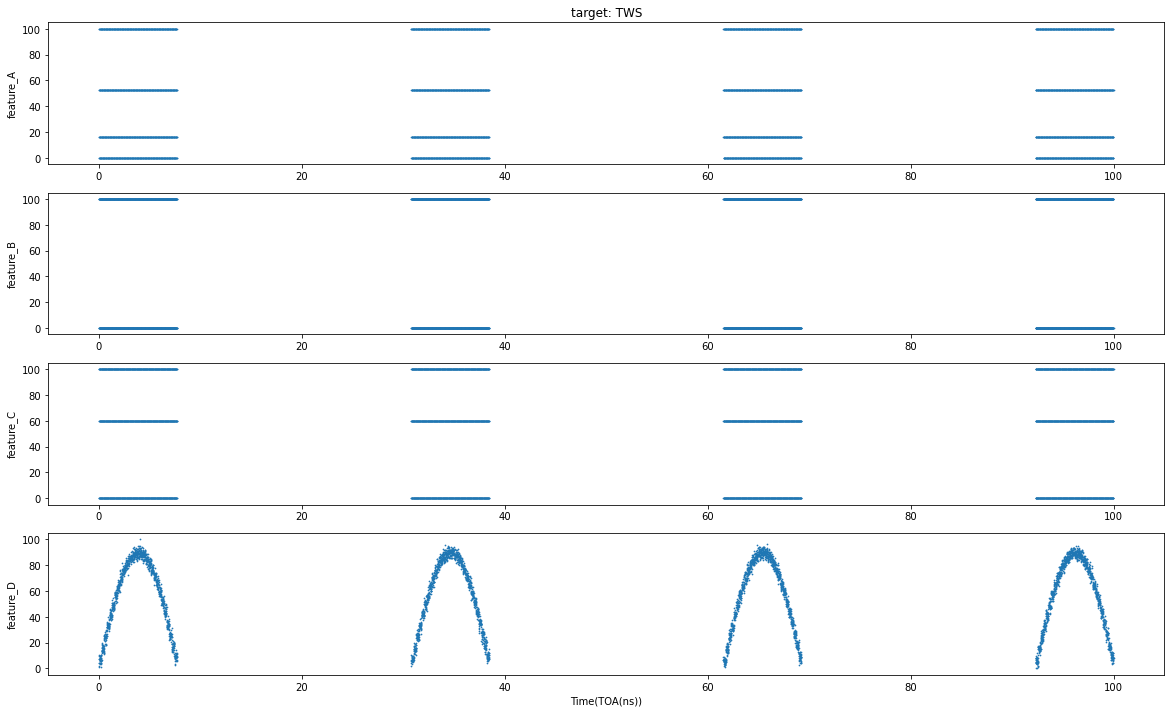

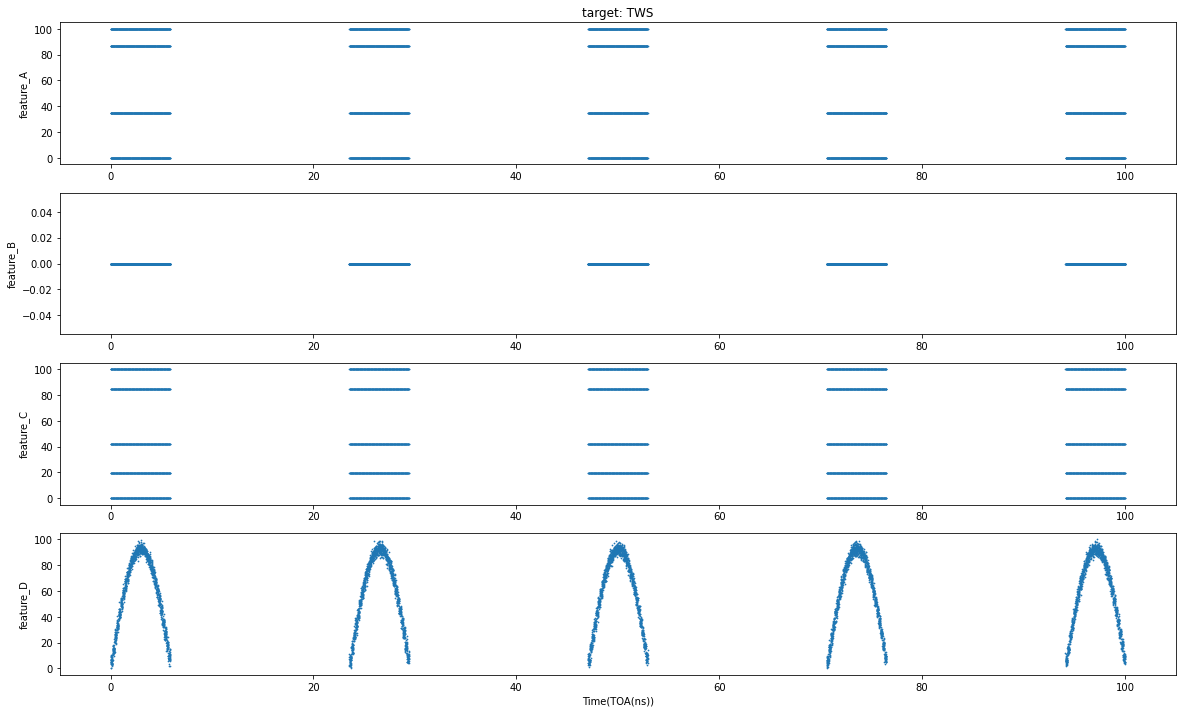

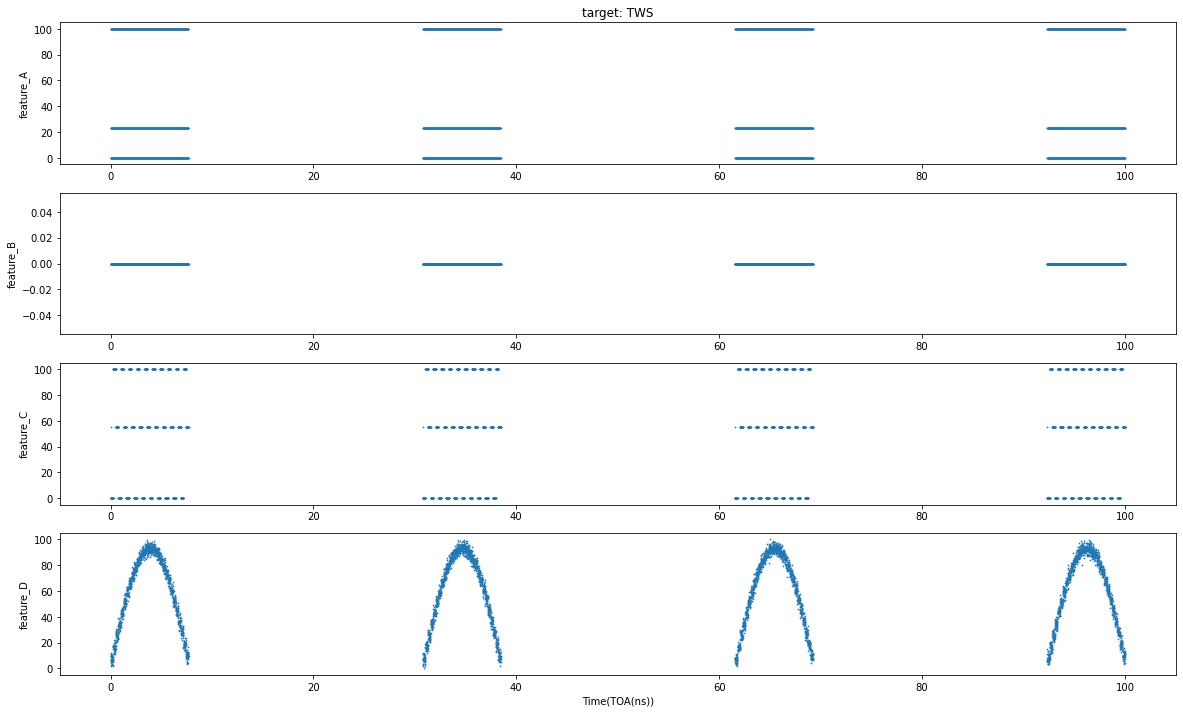

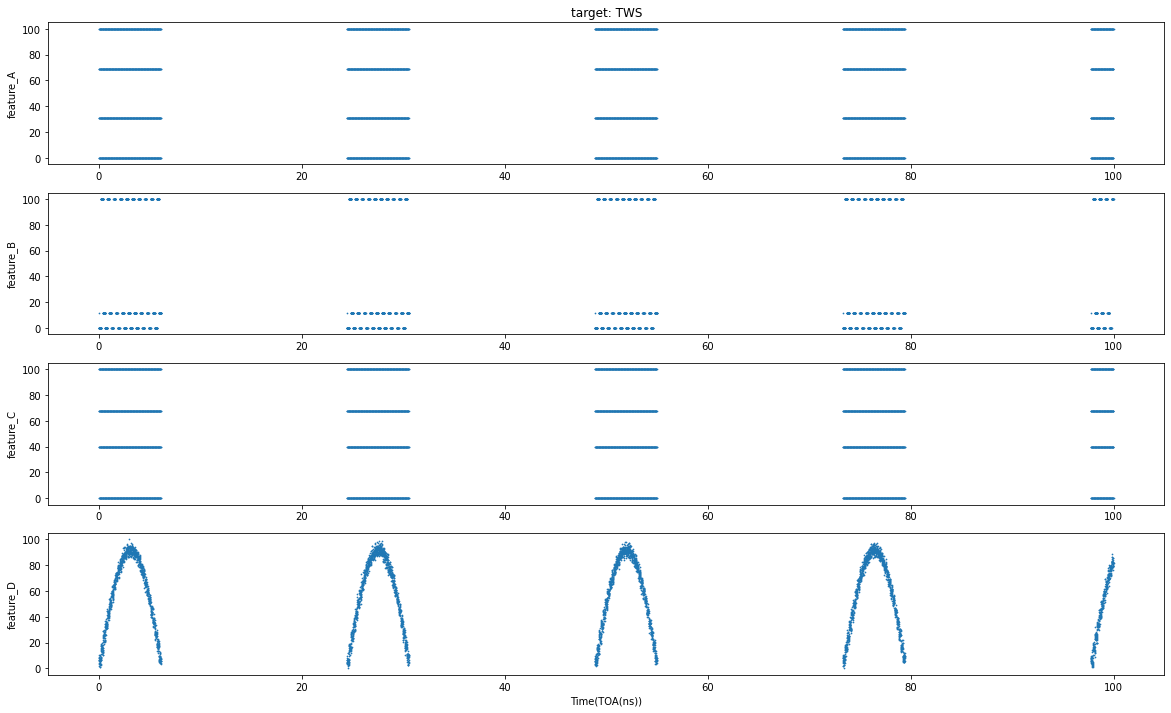

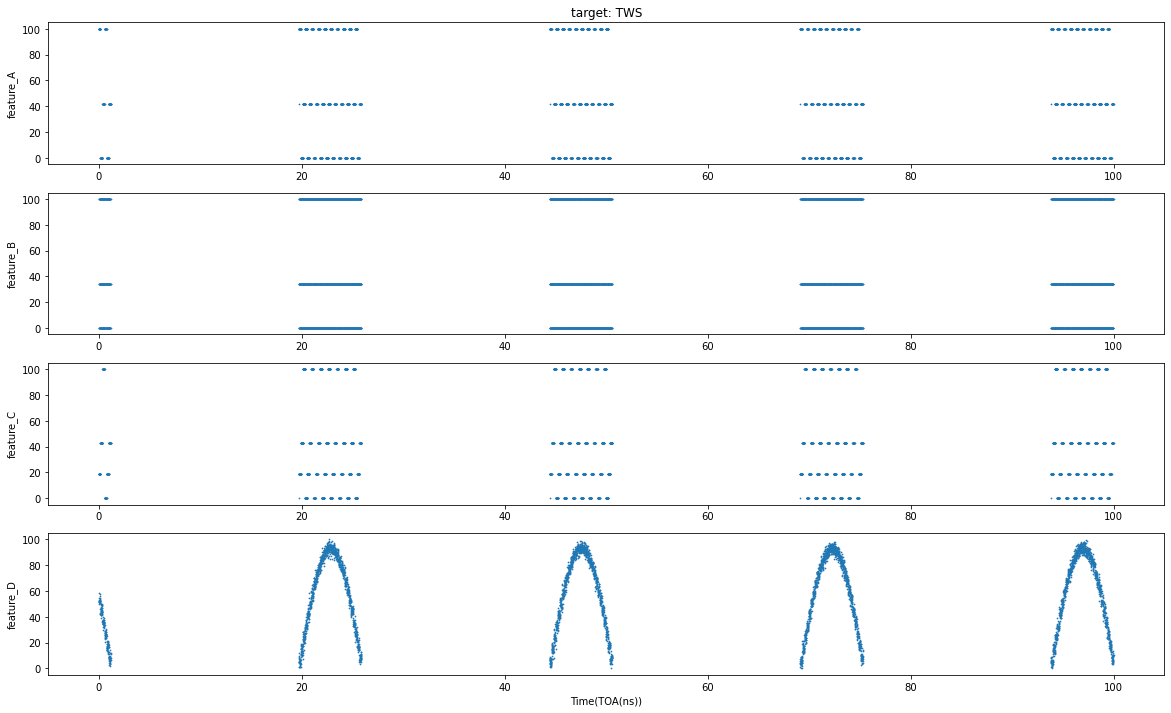

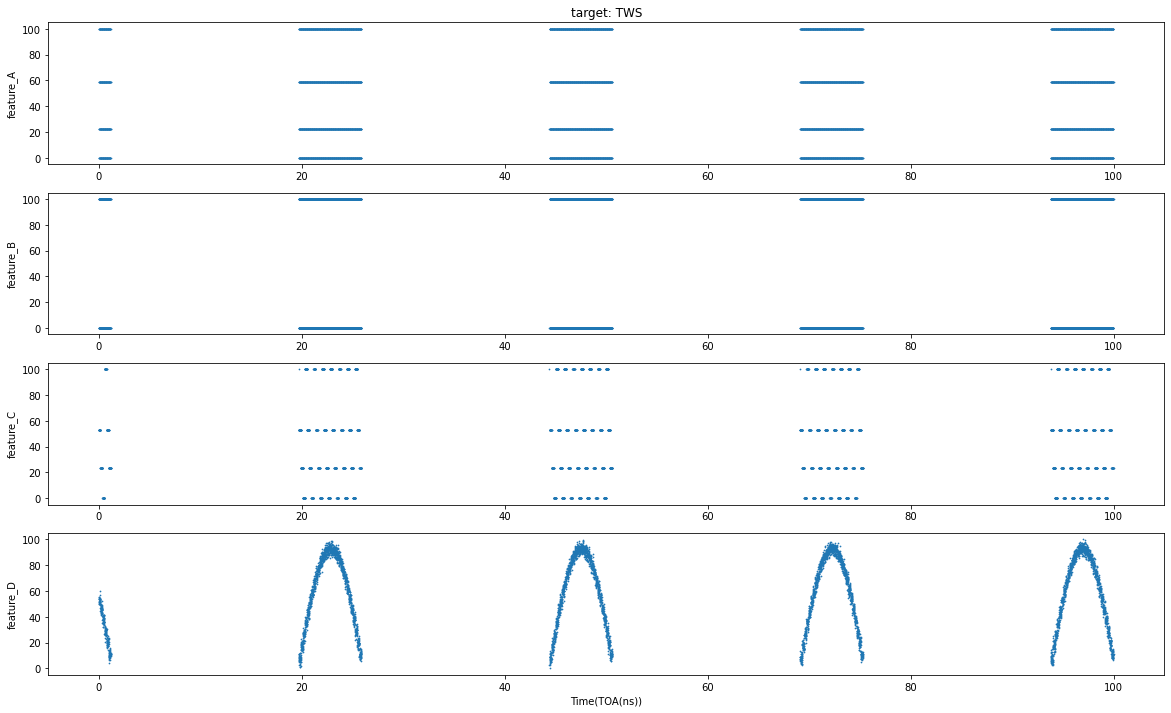

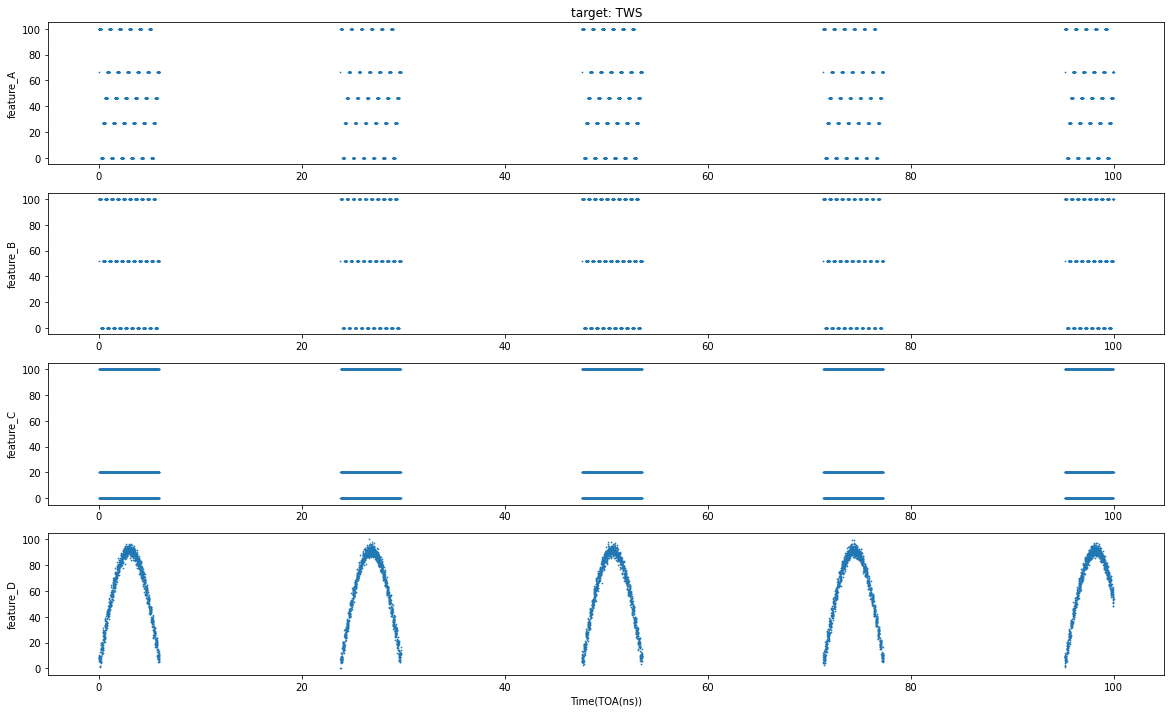

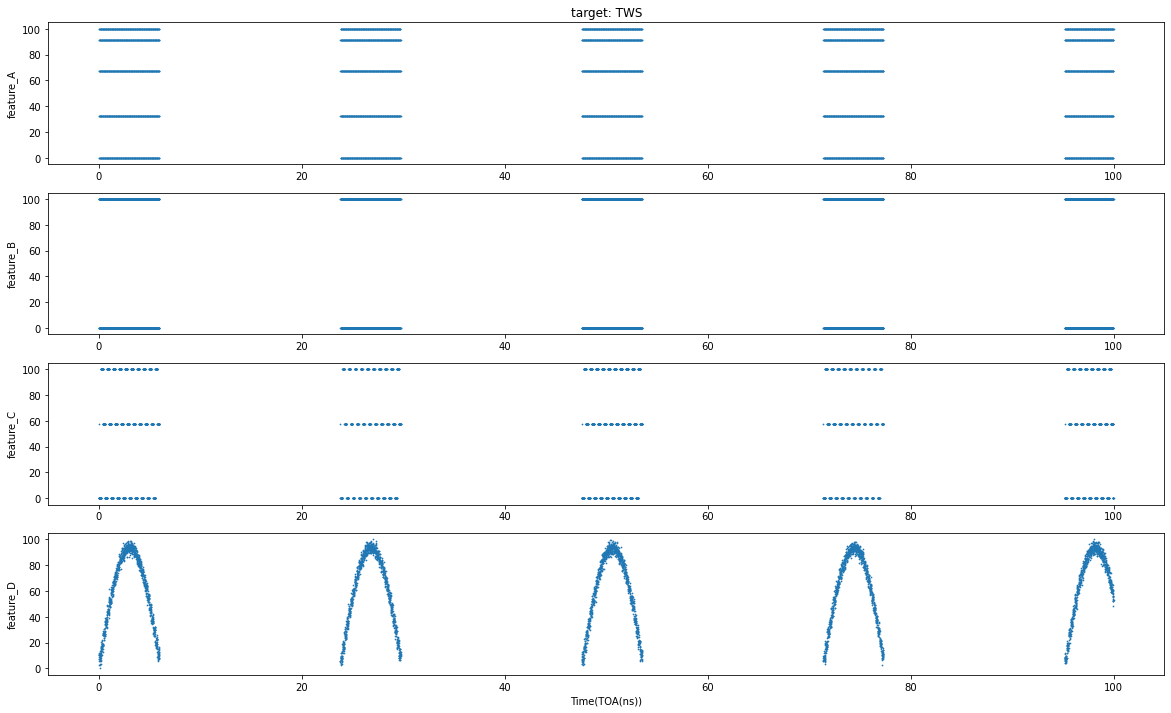

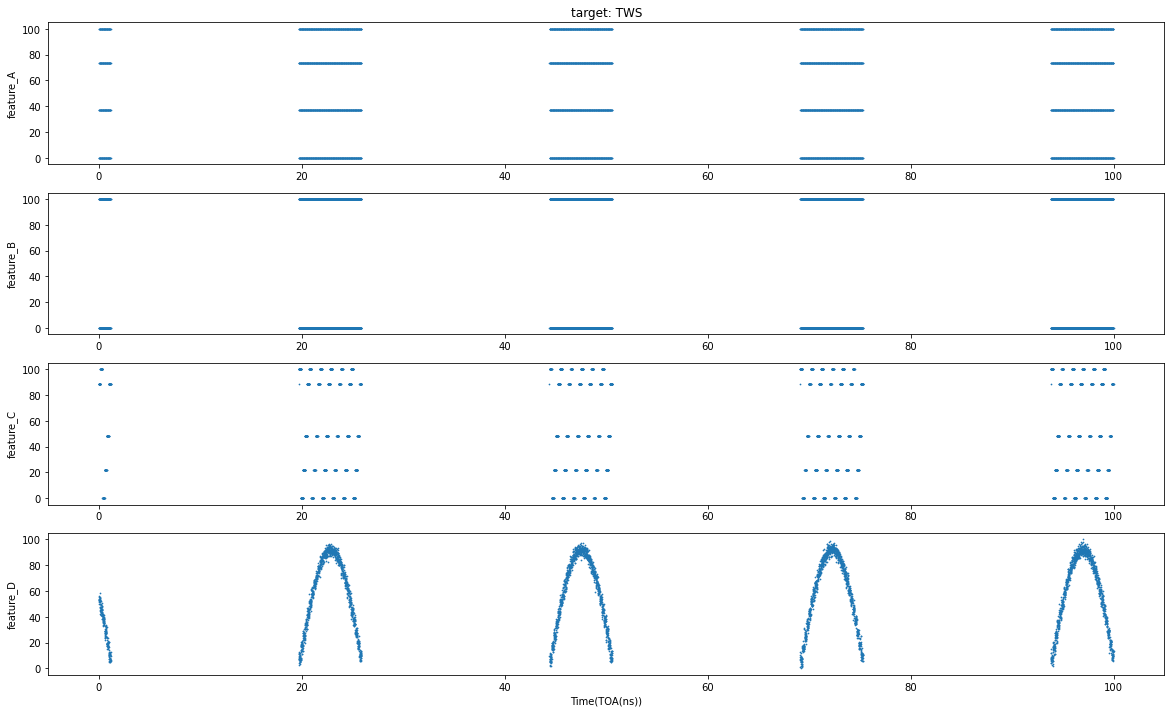

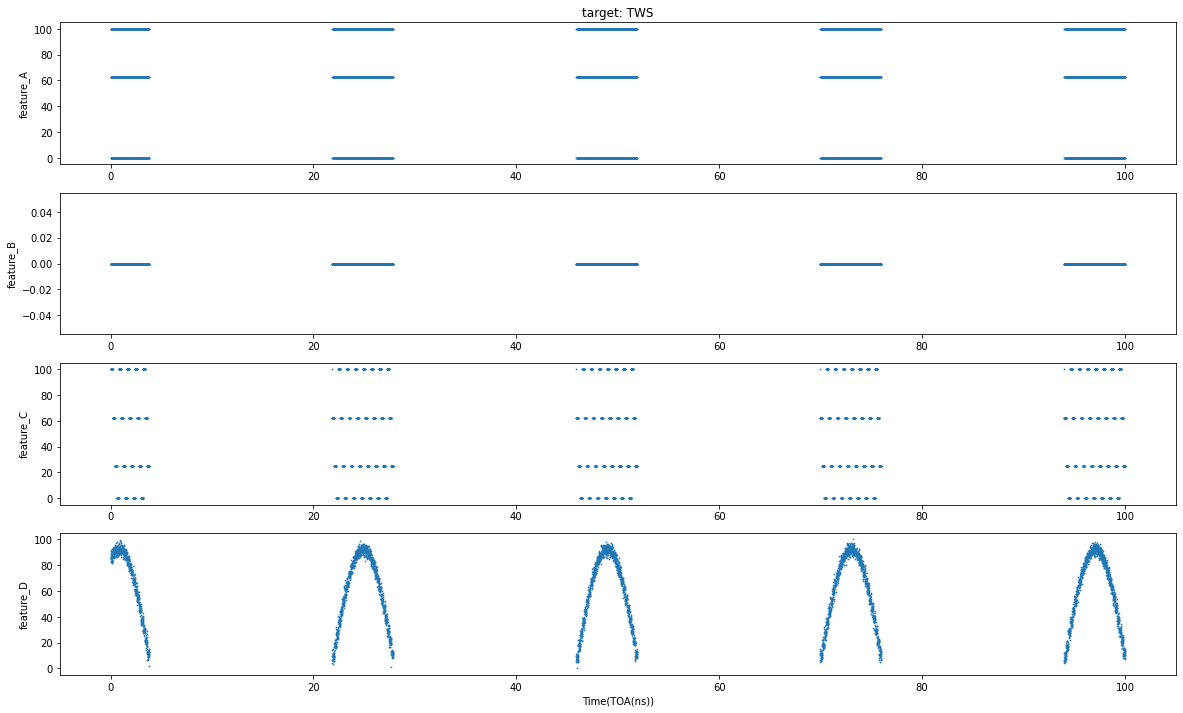

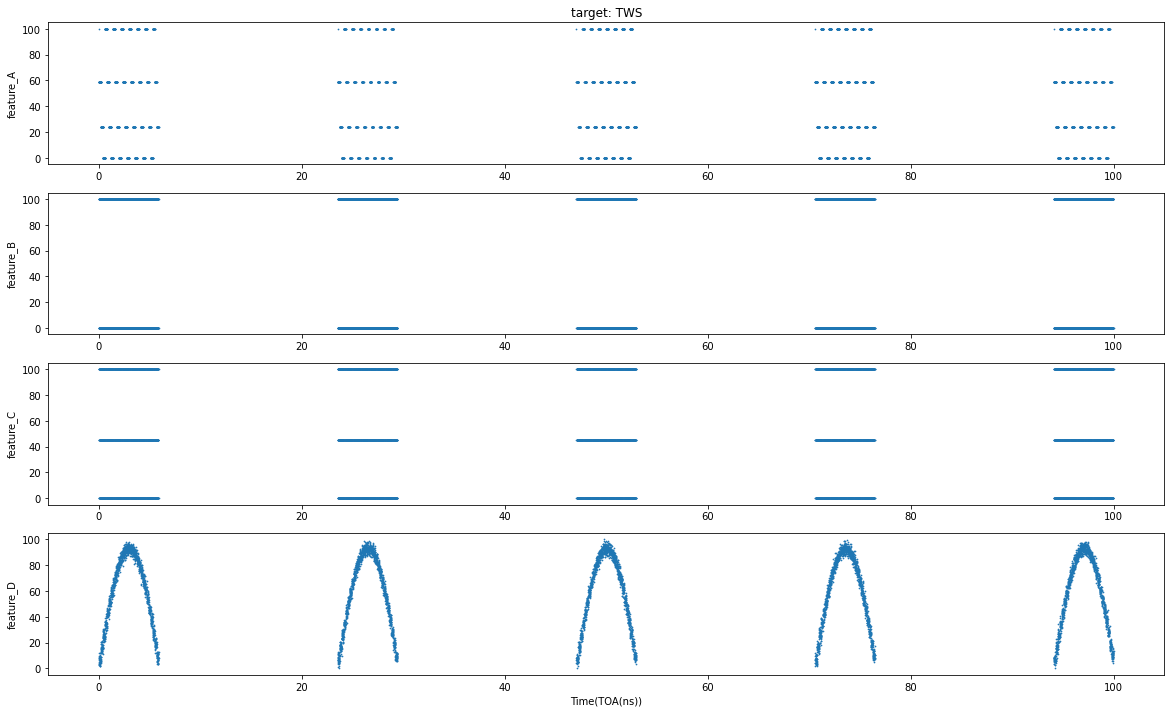

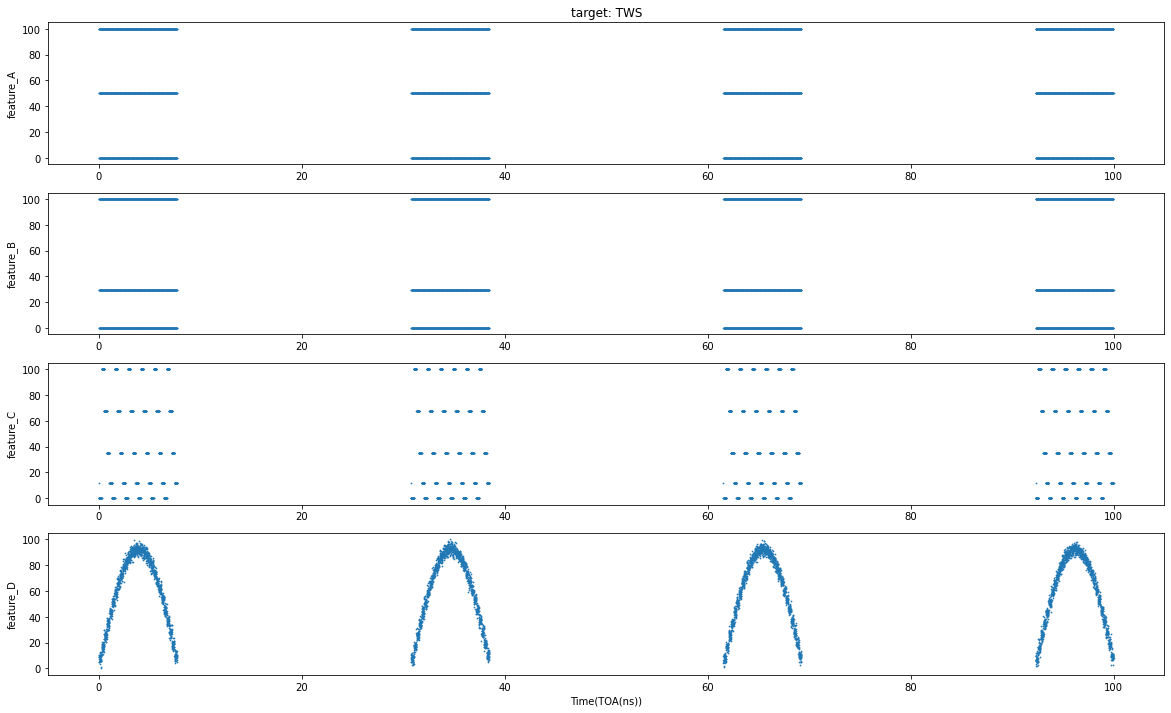

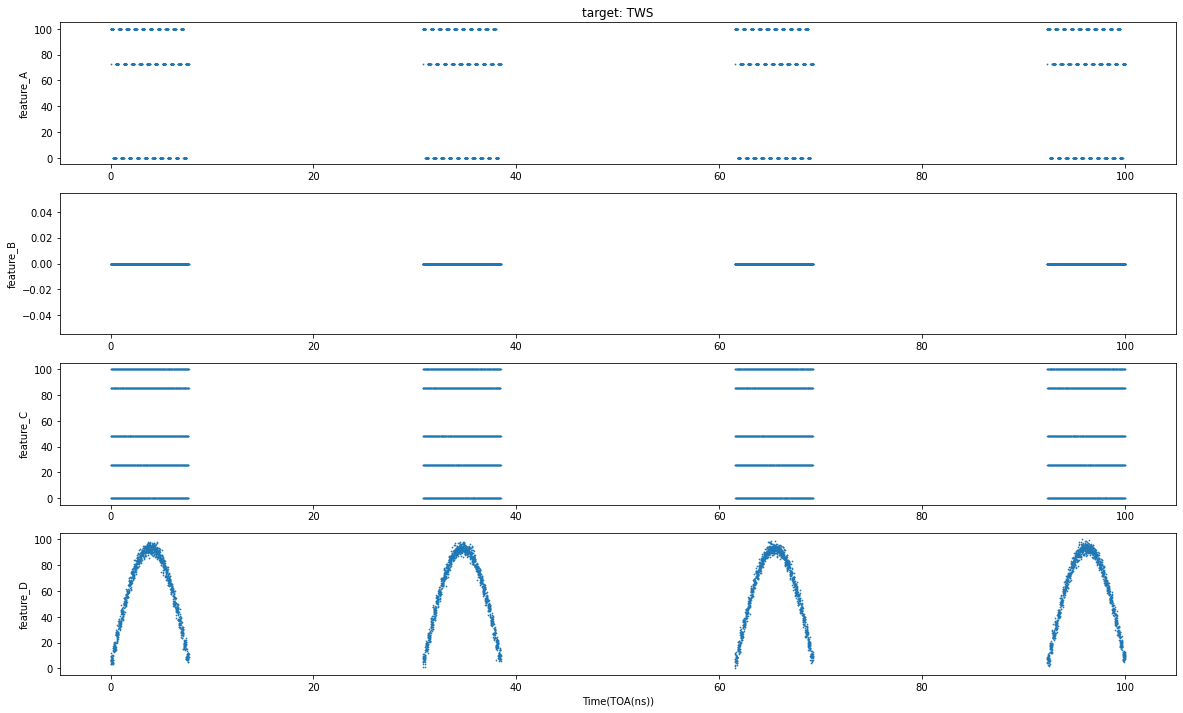

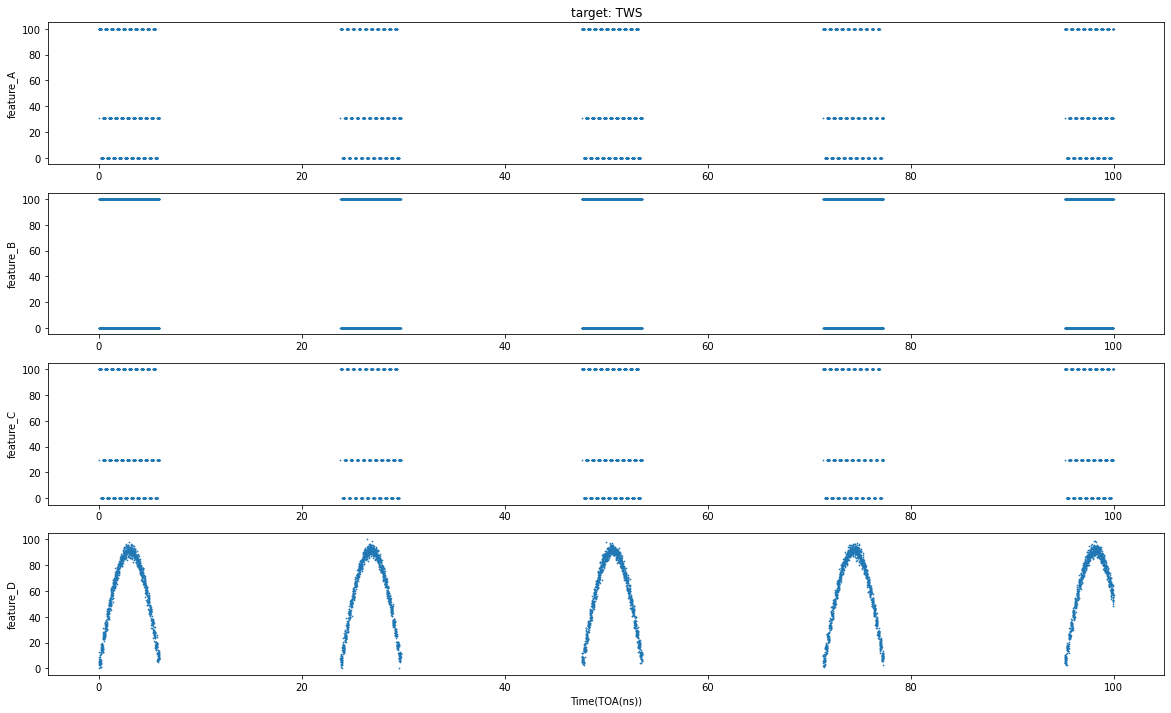

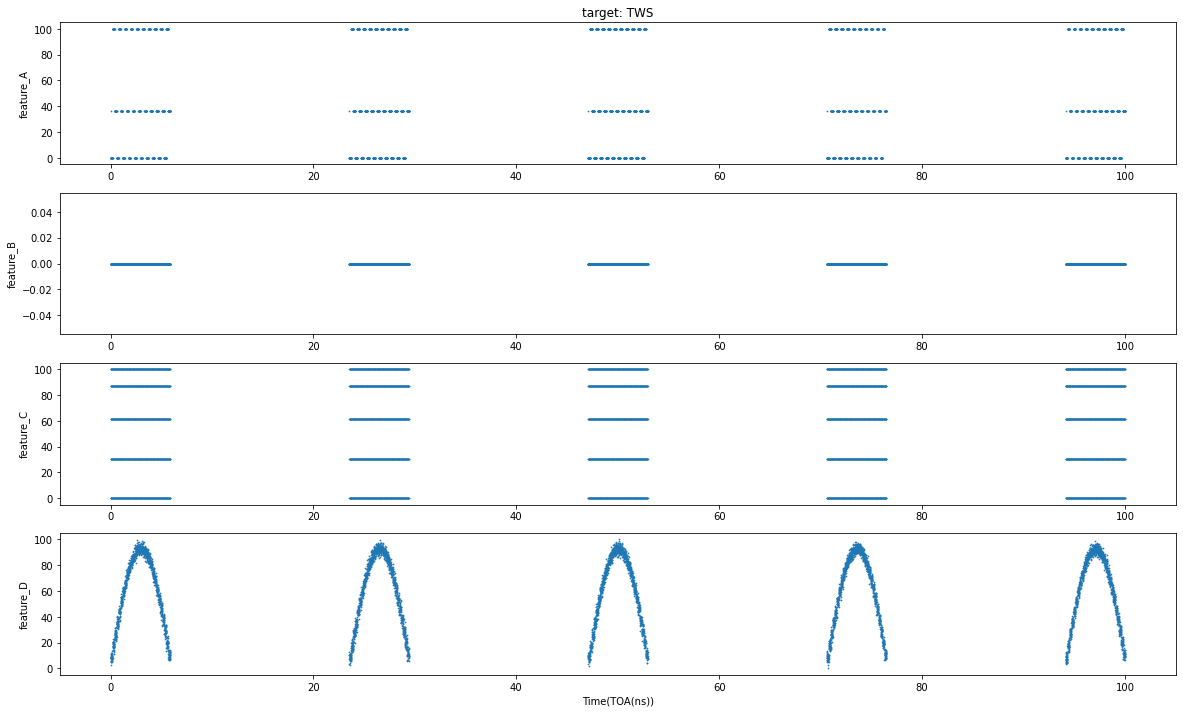

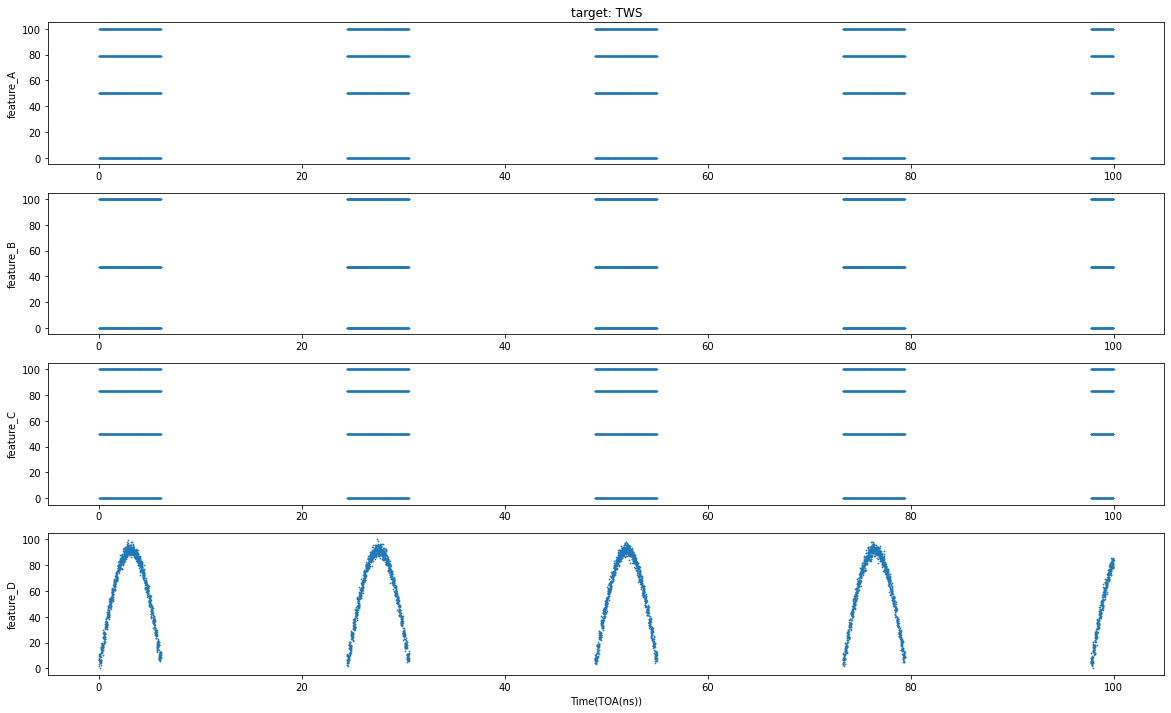

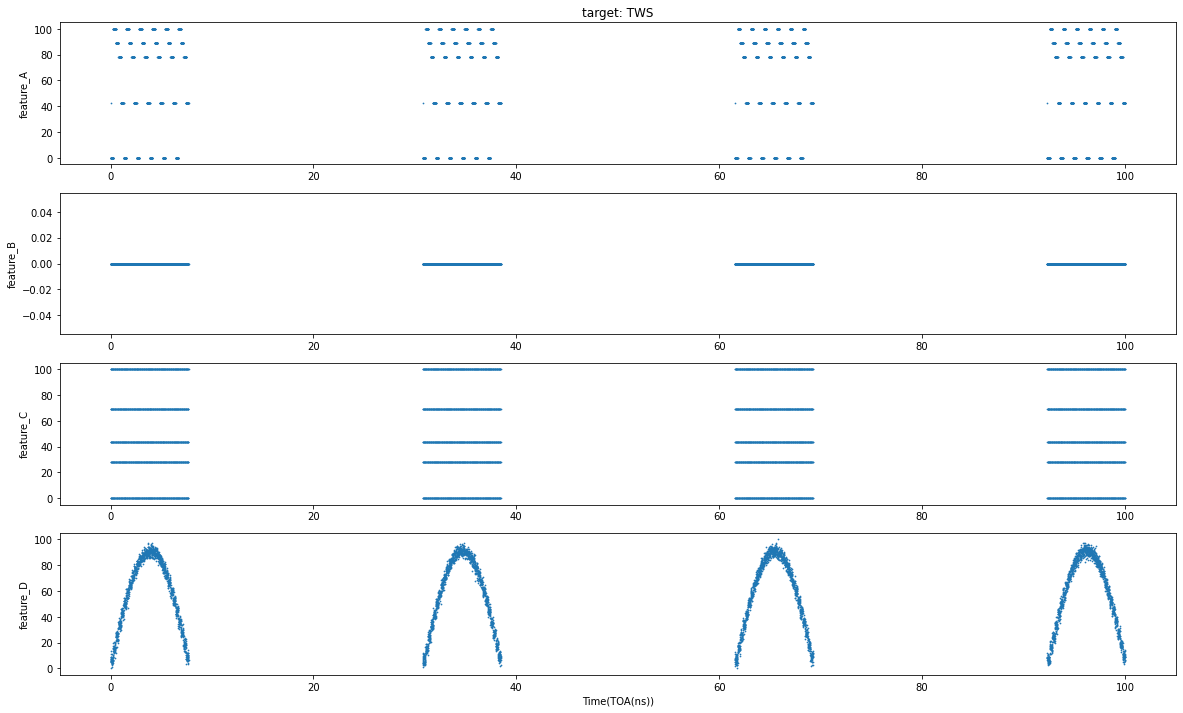

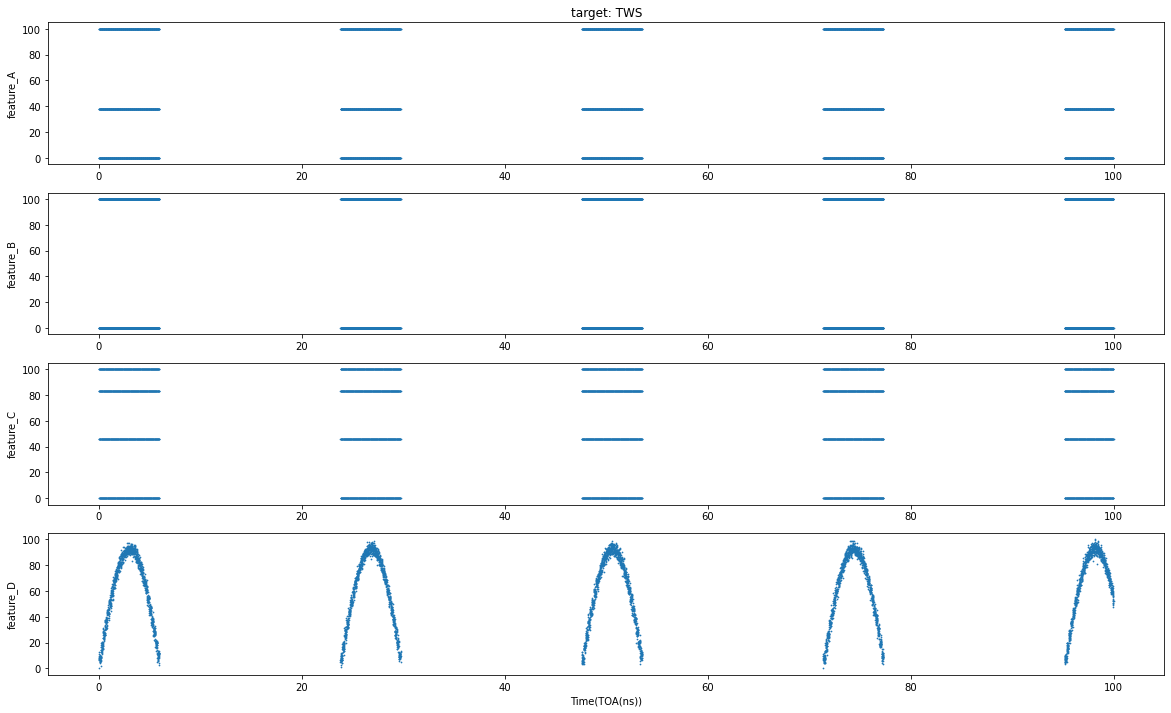

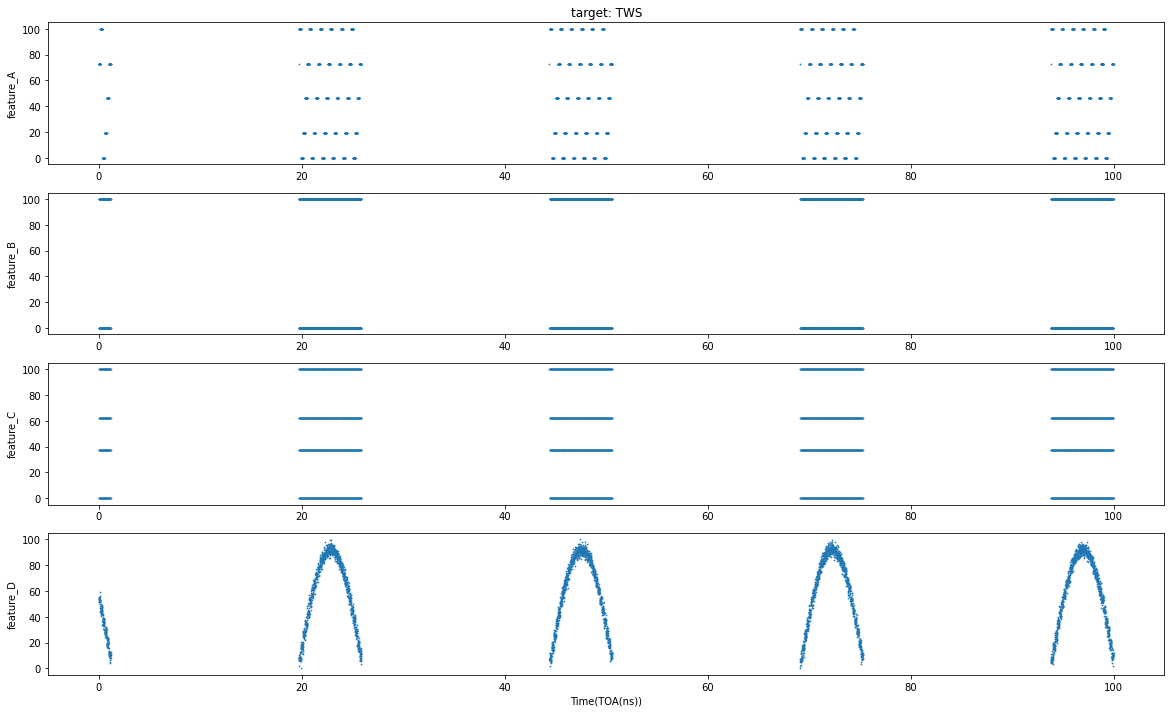

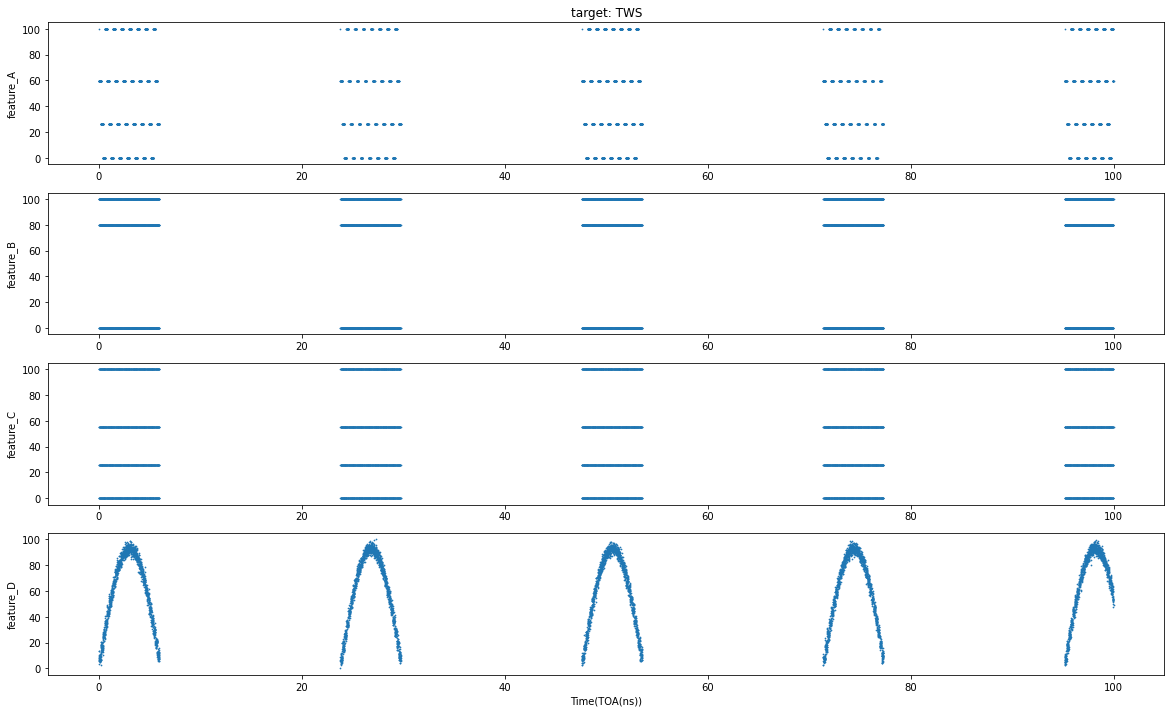

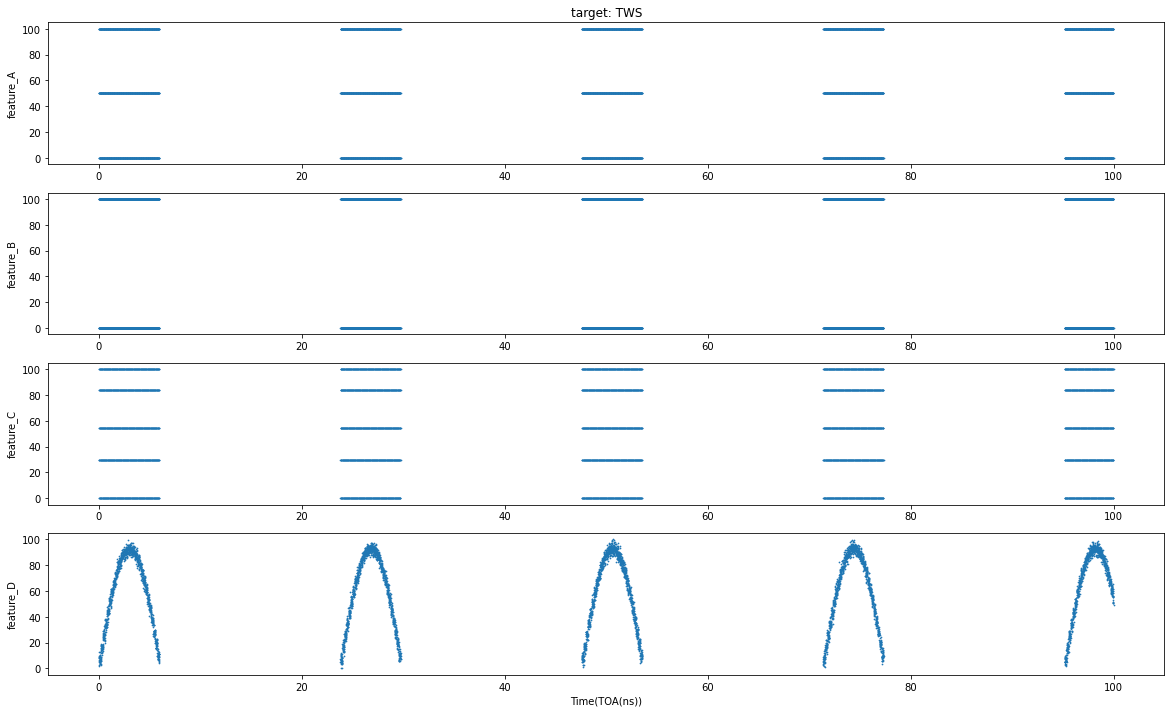

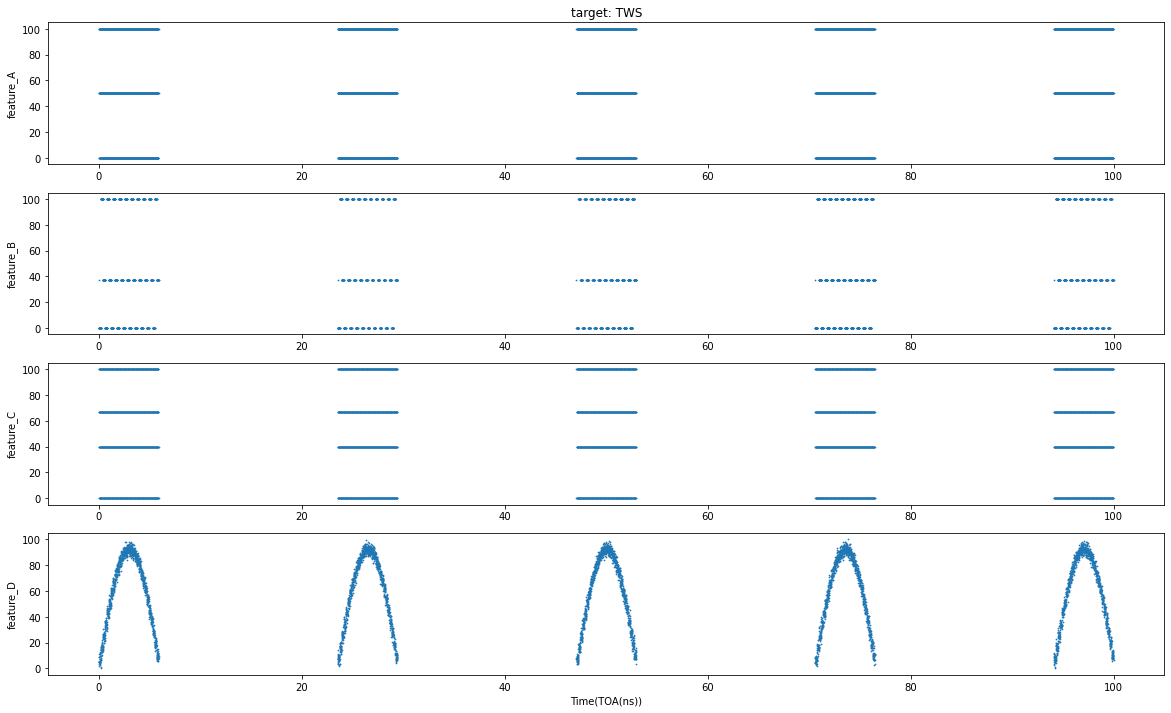

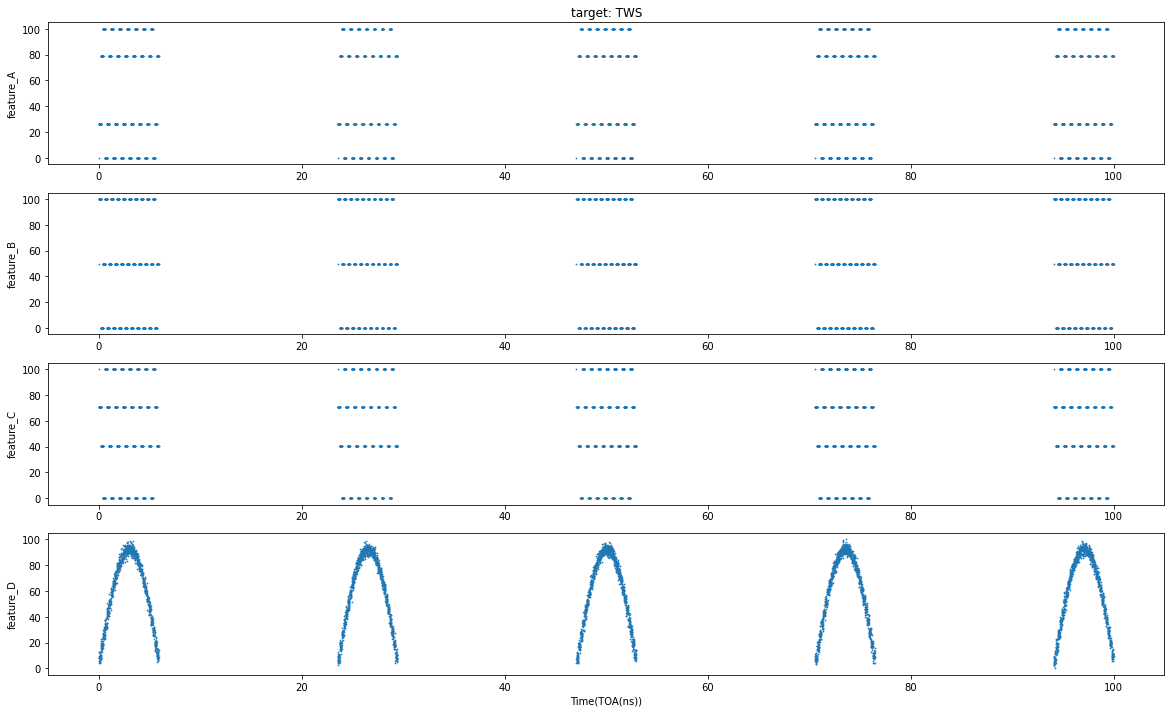

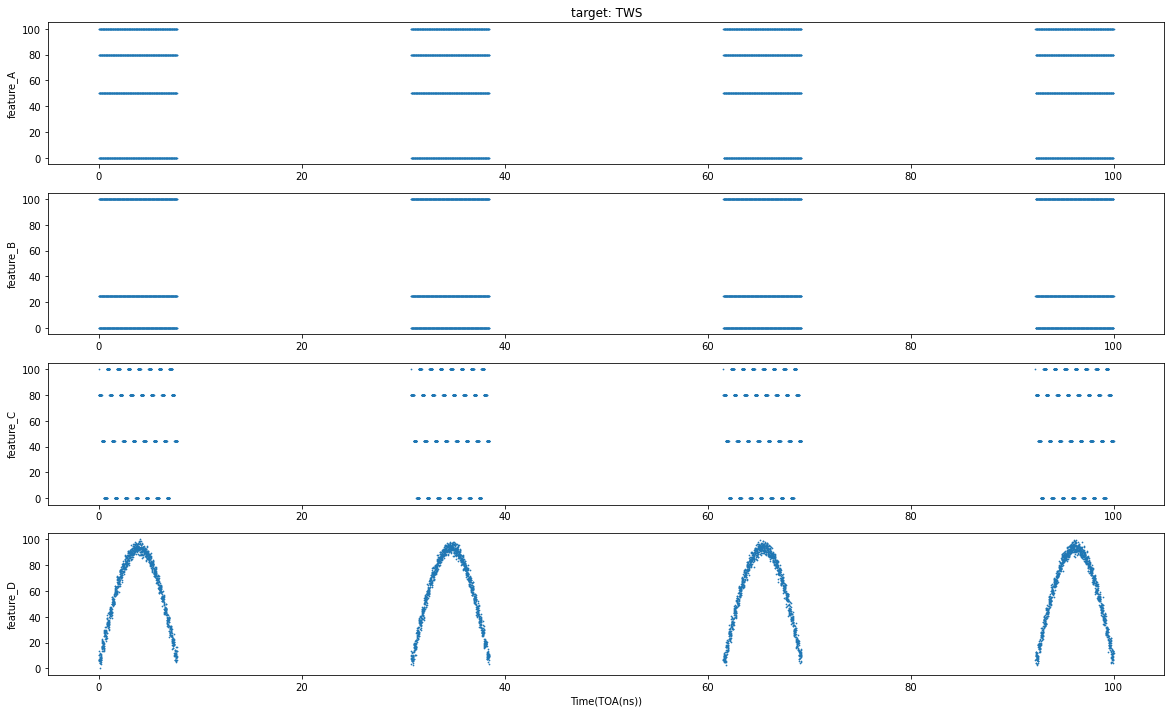

In [19]:
for idx, y_target in enumerate(list(df_val.y_targets)):
    plot_wave(df_val, idx, is_save=True)

target: MTT


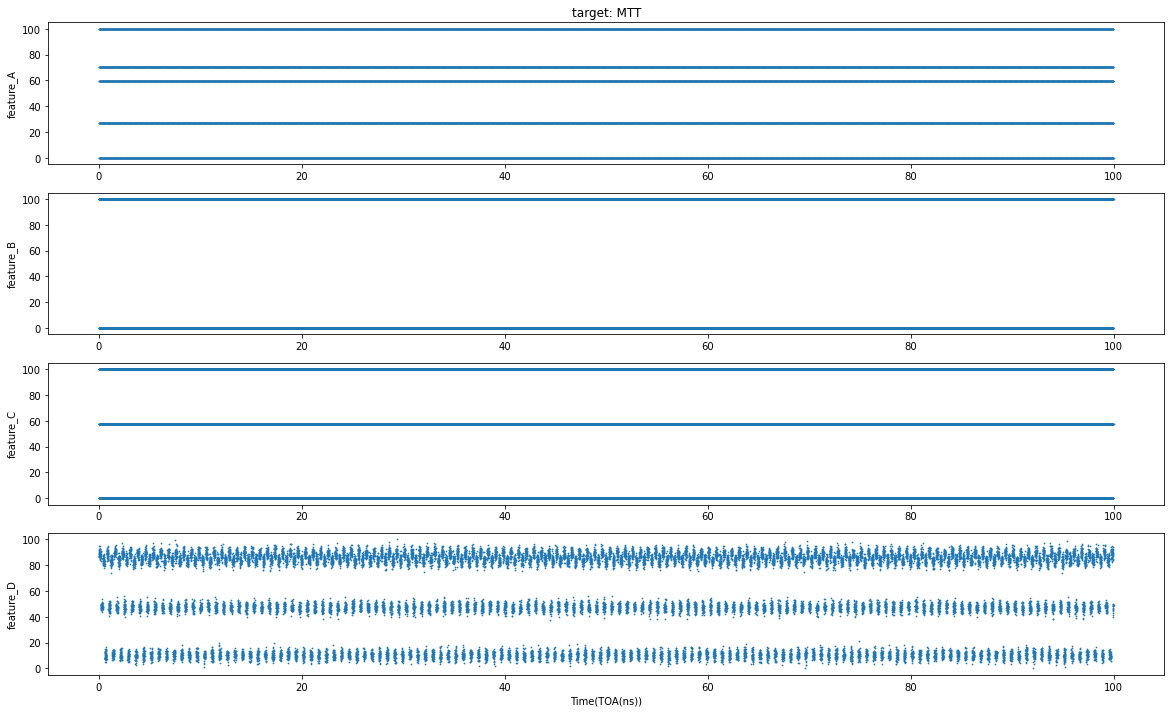

target: STT


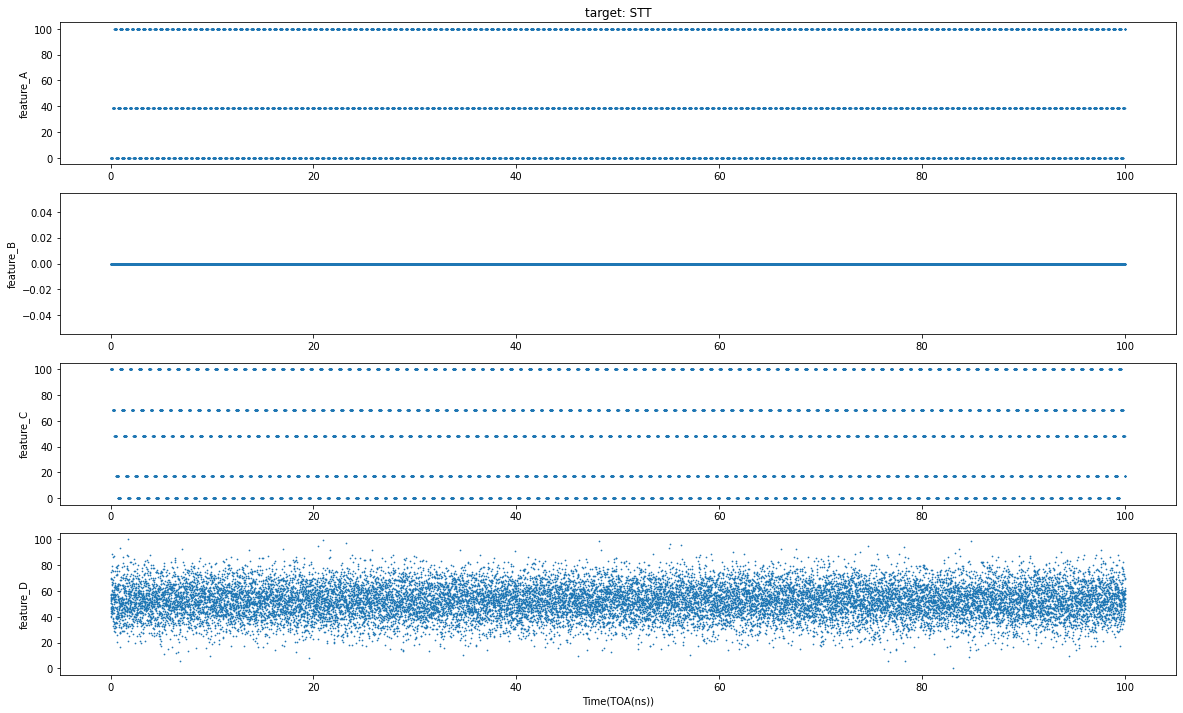

target: TWS


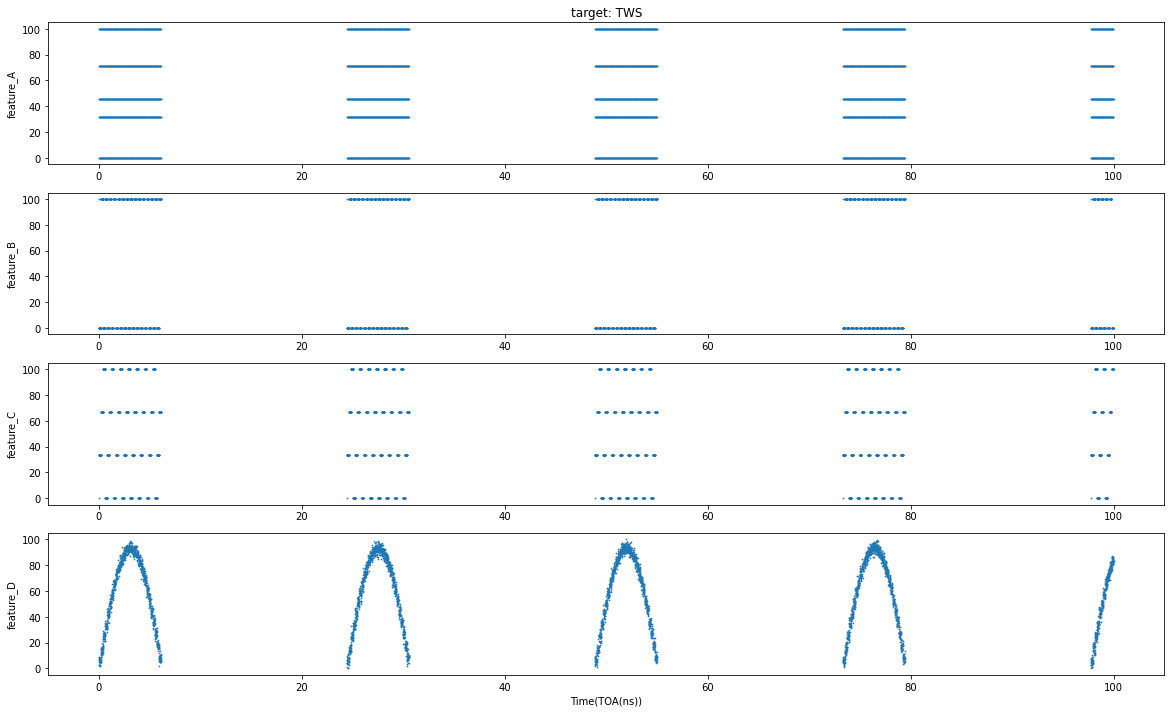

target: TWS


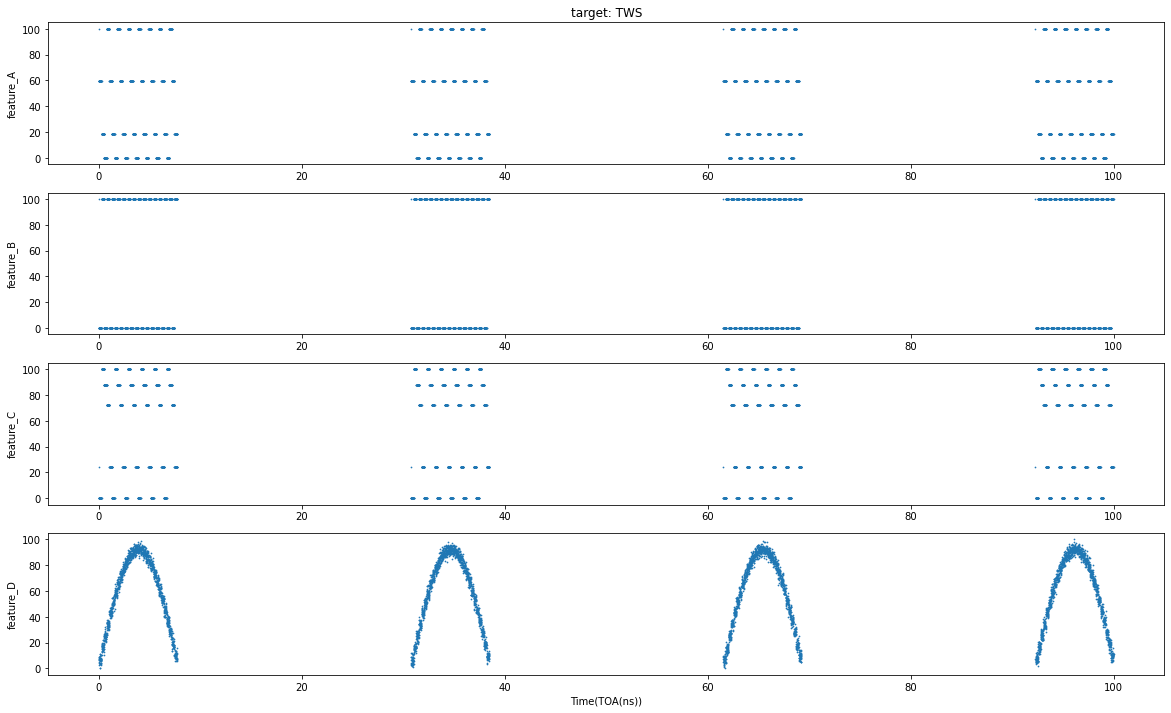

In [9]:
plot_wave(df_train, 5)
plot_wave(df_train, 17)
plot_wave(df_train, 57)
plot_wave(df_train, 99)